In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [281]:
#Just so I can see all the columns
pd.set_option("display.max_columns", None)

In [282]:
#This dataset is called "train" for training the moodual so I just named the df C(credit)train
Ctrain = pd.read_csv(r"C:\Users\ariel\OneDrive\מסמכים\Python\Projects_and_stuff\project_3\train.csv", low_memory=False)
Ctrain

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist      19114.12            1824.843333                  3   
1      Scientist      19114.12                    NaN                  3   
2      Scientist      19114.12                    NaN                  3   
3      Scientist      19114.12                    NaN                  3   
4      Scientist      19114.12            1824.843333                  3   
...          ...           ...                    ...                ...   
99995   Mechanic      39628.99            3359.415833                  4   
99996   Mechanic      39628.99            3359.415833                  4   
99997   Mechanic      39628.99            3359.415833                  4   
99998   Mechanic      39628.99            3359.415833                  4   
99999   Mechanic     39628.99_            3359.415833                  4   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                    4              3           4   
1                    4              3           4   
2                    4              3           4   
3                    4              3           4   
4                    4              3           4   
...                ...            ...         ...   
99995                6              7           2   
99996                6              7           2   
99997                6           5729           2   
99998                6              7           2   
99999                6              7           2   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                   23   
99996                        Auto Loan, and Student Loan                   18   
99997                        Auto Loan, and Student Loan                   27   
99998                        Auto Loan, and Student Loan                   20   
99999                        Auto Loan, and Student Loan                   18   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                          7                11.27                   4.0   
1                        NaN                11.27                   4.0   
2                          7                    _                   4.0   
3                          4                 6.27                   4.0   
4                        NaN                11.27                   4.0   
...                      ...                  ...                   ...   
99995                      7                 11.5                   3.0   


# Data Filtering

#I will now begin the filtering and cleaning of the data:

In [283]:
Ctrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [284]:
Ctrain.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [285]:
#Just want to check the Nulls
Ctrain[Ctrain["Name"].isna()]

ID Customer_ID     Month Name Age          SSN     Occupation  \
7       0x1609   CUS_0xd40    August  NaN  23    #F%$D@*&8      Scientist   
17      0x161b  CUS_0x2dbc  February  NaN  34  486-85-3974       Engineer   
22      0x1620  CUS_0x2dbc      July  NaN  34  486-85-3974       Engineer   
64      0x1662  CUS_0x4157   January  NaN  23  070-19-1622         Doctor   
80      0x167a  CUS_0xa66b   January  NaN  40  221-30-8554        Teacher   
...        ...         ...       ...  ...  ..          ...            ...   
99964  0x25fba  CUS_0x372c       May  NaN  18  340-85-7301         Lawyer   
99965  0x25fbb  CUS_0x372c      June  NaN  19  340-85-7301         Lawyer   
99969  0x25fc3   CUS_0xf16  February  NaN  45  868-70-2218  Media_Manager   
99973  0x25fc7   CUS_0xf16      June  NaN  45  868-70-2218  Media_Manager   
99986  0x25fdc  CUS_0x8600     March  NaN  28  031-35-0942      Architect   

      Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
7          19114.12            1824.843333                  3   
17        143162.64           12187.220000                  1   
22        143162.64           12187.220000                  1   
64        114838.41            9843.867500                  2   
80         33751.27            2948.605833                  5   
...             ...                    ...                ...   
99964      42903.79            3468.315833                  0   
99965      42903.79            3468.315833                  0   
99969      16680.35            1528.029167                  1   
99973      16680.35            1528.029167                  1   
99986      20002.88            1929.906667                 10   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
7                    4              3           4   
17                   5              8           3   
22                   5              8           3   
64                   5              7        -100   
80                   5             20          3_   
...                ...            ...         ...   
99964                4              6           1   
99965                4              6           1   
99969                1              5        -100   
99973                1              5           4   
99986                8             29           5   

                                            Type_of_Loan  Delay_from_due_date  \
7      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
17               Auto Loan, Auto Loan, and Not Specified                   13   
22               Auto Loan, Auto Loan, and Not Specified                    8   
64     Personal Loan, Debt Consolidation Loan, and Au...                   13   
80     Credit-Builder Loan, Personal Loan, and Auto Loan                   16   
...                                                  ...                  ...   
99964                                      Not Specified                   14   
99965                                      Not Specified                   14   
99969  Payday Loan, Student Loan, Mortgage Loan, and ...                    3   
99973  Payday Loan, Student Loan, Mortgage Loan, and ...                    1   
99986  Personal Loan, Auto Loan, Mortgage Loan, Stude...                   33   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
7                          6                11.27                   4.0   
17                         6                  7.1                   3.0   
22                         6                  7.1                   3.0   
64                        11                 8.24                   3.0   
80                        20                 11.0                   4.0   
...                      ...                  ...                   ...   
99964                      0                  5.1                   1.0   
99965                     -1                  5.1                   1.0   
99969                

In [287]:
columns = Ctrain.columns.to_frame(name='Column Names')
columns

Column Names
ID                                            ID
Customer_ID                          Customer_ID
Month                                      Month
Name                                        Name
Age                                          Age
...                                          ...
Total_EMI_per_month          Total_EMI_per_month
Amount_invested_monthly  Amount_invested_monthly
Payment_Behaviour              Payment_Behaviour
Monthly_Balance                  Monthly_Balance
Credit_Score                        Credit_Score

[28 rows x 1 columns]

In [288]:
Ctrain.drop(columns=['SSN', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit'], inplace=True)
#These columns are dropped becuse the SNN is just another form of ID, Monthly_Inhand_Salary 
# has 15% of its values as NaN and Changed_Credit_Limit may changes 
# throughout the months up and down per customer - I am looking to make more generalized conclusions 
# about the data and then deploy them on the 'Customer_ID',not look at each customer's financial movement 
# first and then make the desicion.
#I inted to work from the MACRO to the MICRO level, not the other way around.

In [289]:
Ctrain

ID Customer_ID     Month           Name   Age Occupation  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  Scientist   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  Scientist   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  Scientist   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  Scientist   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  Scientist   
...        ...         ...       ...            ...   ...        ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25   Mechanic   
99996  0x25fea  CUS_0x942c       May          Nicks    25   Mechanic   
99997  0x25feb  CUS_0x942c      June          Nicks    25   Mechanic   
99998  0x25fec  CUS_0x942c      July          Nicks    25   Mechanic   
99999  0x25fed  CUS_0x942c    August          Nicks    25   Mechanic   

      Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0          19114.12                  3                4              3   
1          19114.12                  3                4              3   
2          19114.12                  3                4              3   
3          19114.12                  3                4              3   
4          19114.12                  3                4              3   
...             ...                ...              ...            ...   
99995      39628.99                  4                6              7   
99996      39628.99                  4                6              7   
99997      39628.99                  4                6           5729   
99998      39628.99                  4                6              7   
99999     39628.99_                  4                6              7   

      Num_of_Loan                                       Type_of_Loan  \
0               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
1               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
2               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
3               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
4               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
...           ...                                                ...   
99995           2                        Auto Loan, and Student Loan   
99996           2                        Auto Loan, and Student Loan   
99997           2                        Auto Loan, and Student Loan   
99998           2                        Auto Loan, and Student Loan   
99999           2                        Auto Loan, and Student Loan   

       Delay_from_due_date Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                        3                      7                   4.0   
1                       -1                    NaN                   4.0   
2                        3                      7                   4.0   
3                        5                      4                   4.0   
4                        6                    NaN                   4.0   
...                    ...                    ...                   ...   
99995                   23                      7                   3.0   
99996                   18                      7                   3.0   
99997                   27                      6                   3.0   
99998                   20                    NaN                   3.0   
99999                   18                      6                   3.0   

      Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0              _           809.98                 26.822620   
1           Good           809.98                 31.944960   
2           Good           809.98                 28.609352   
3           Good           809.98                 31.377862   
4           Good           809.98                 24.797347   
...          ...              ...                       ...   
99995          _           502.38                 3

In [290]:
Ctrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  object 
 11  Type_of_Loan              88592 non-null   object 
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    92998 non-null   ob

In [291]:

# Clean the 'Age' column by removing invalid characters and converting to integers
Ctrain['Age'] = pd.to_numeric(Ctrain['Age'], errors='coerce').fillna(0).astype(int)

# Clean the 'Annual_Income' column by removing invalid characters and converting to floats
Ctrain['Annual_Income'] = pd.to_numeric(Ctrain['Annual_Income'], errors='coerce').fillna(0).astype(float)

# Clean the 'Num_of_Loan' column by removing invalid characters and converting to integers
Ctrain['Num_of_Loan'] = pd.to_numeric(Ctrain['Num_of_Loan'], errors='coerce').fillna(0).astype(int)

# Clean the 'Num_of_Delayed_Payment' column by removing invalid characters and converting to integers
Ctrain['Num_of_Delayed_Payment'] = pd.to_numeric(Ctrain['Num_of_Delayed_Payment'], errors='coerce').fillna(0).astype(int)

# Clean the 'Num_Credit_Inquiries' column by removing invalid characters and converting to integers
Ctrain['Num_Credit_Inquiries'] = pd.to_numeric(Ctrain['Num_Credit_Inquiries'], errors='coerce').fillna(0).astype(int)

# Clean the 'Outstanding_Debt' column by removing invalid characters and converting to floats
Ctrain['Outstanding_Debt'] = pd.to_numeric(Ctrain['Outstanding_Debt'], errors='coerce').fillna(0).astype(float)

# Clean the 'Amount_invested_monthly' column by removing invalid characters and converting to floats
Ctrain['Amount_invested_monthly'] = pd.to_numeric(Ctrain['Amount_invested_monthly'], errors='coerce').fillna(0).astype(float)

# Clean the 'Monthly_Balance' column by removing invalid characters and converting to floats
Ctrain['Monthly_Balance'] = pd.to_numeric(Ctrain['Monthly_Balance'], errors='coerce').fillna(0).astype(float)






Ctrain

ID Customer_ID     Month           Name  Age Occupation  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23  Scientist   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23  Scientist   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500  Scientist   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23  Scientist   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23  Scientist   
...        ...         ...       ...            ...  ...        ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25   Mechanic   
99996  0x25fea  CUS_0x942c       May          Nicks   25   Mechanic   
99997  0x25feb  CUS_0x942c      June          Nicks   25   Mechanic   
99998  0x25fec  CUS_0x942c      July          Nicks   25   Mechanic   
99999  0x25fed  CUS_0x942c    August          Nicks   25   Mechanic   

       Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0           19114.12                  3                4              3   
1           19114.12                  3                4              3   
2           19114.12                  3                4              3   
3           19114.12                  3                4              3   
4           19114.12                  3                4              3   
...              ...                ...              ...            ...   
99995       39628.99                  4                6              7   
99996       39628.99                  4                6              7   
99997       39628.99                  4                6           5729   
99998       39628.99                  4                6              7   
99999           0.00                  4                6              7   

       Num_of_Loan                                       Type_of_Loan  \
0                4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
1                4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
2                4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
3                4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
4                4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
...            ...                                                ...   
99995            2                        Auto Loan, and Student Loan   
99996            2                        Auto Loan, and Student Loan   
99997            2                        Auto Loan, and Student Loan   
99998            2                        Auto Loan, and Student Loan   
99999            2                        Auto Loan, and Student Loan   

       Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                        3                       7                     4   
1                       -1                       0                     4   
2                        3                       7                     4   
3                        5                       4                     4   
4                        6                       0                     4   
...                    ...                     ...                   ...   
99995                   23                       7                     3   
99996                   18                       7                     3   
99997                   27                       6                     3   
99998                   20                       0                     3   
99999                   18                       6                     3   

      Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0              _            809.98                 26.822620   
1           Good            809.98                 31.944960   
2           Good            809.98                 28.609352   
3           Good            809.98                 31.377862   
4           Good            809.98                 24.797347   
...          ...               ...                       ...   
99995          _    

In [292]:
Ctrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  int64  
 11  Type_of_Loan              88592 non-null   object 
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    100000 non-null  in

In [293]:
Ctrain.columns.to_frame()

0
ID                                            ID
Customer_ID                          Customer_ID
Month                                      Month
Name                                        Name
Age                                          Age
...                                          ...
Total_EMI_per_month          Total_EMI_per_month
Amount_invested_monthly  Amount_invested_monthly
Payment_Behaviour              Payment_Behaviour
Monthly_Balance                  Monthly_Balance
Credit_Score                        Credit_Score

[25 rows x 1 columns]

## Month

8


C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\462979458.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x='Month', data=Ctrain, palette='Set2')


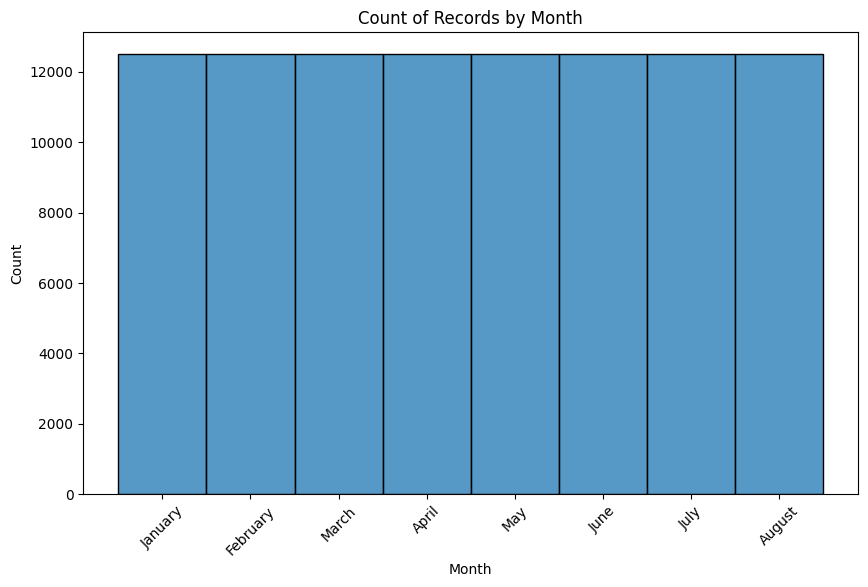

In [294]:
print(Ctrain['Month'].nunique())
Ctrain['Month'].unique()

plt.figure(figsize=(10, 6))
sb.histplot(x='Month', data=Ctrain, palette='Set2')
plt.title('Count of Records by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#from this I can understand that every customer has the same number of months of data, 
# I will keep this colonn as is for analysis of the customer thrughout time

In [295]:
Ctrain['Name'].nunique()

10139

## Age

In [296]:
print(Ctrain['Age'].nunique())
Ctrain['Age'].unique()

1662


array([  23, -500,    0, ..., 6476, 2263, 1342], shape=(1662,))

In [297]:
if 'Age' in Ctrain.columns:
    # Filtering out ages not in the range of 18-100
    Ctrain = Ctrain[(Ctrain['Age'] >= 18) & (Ctrain['Age'] <= 100)]

    # Step 2: Ensure consistency of 'Age' values for each 'Customer_ID'
    # Group by 'Customer_ID' and take the most common 'Age' value (mode)
    def resolve_age_consistency(group):
        # If there are multiple ages, take the most common one
        return group['Age'].mode()[0]




In [298]:
#The ages had been cleared
print(Ctrain['Age'].nunique())
Ctrain['Age'].unique()

42


array([ 23,  28,  34,  54,  55,  21,  31,  33,  30,  24,  44,  45,  40,
        41,  32,  35,  36,  39,  37,  20,  46,  26,  42,  19,  48,  38,
        43,  22,  18,  27,  25,  47,  53,  56,  29,  49,  51,  50,  52,
        99, 100,  95])

In [299]:
print(Ctrain['Age'].min())
print(Ctrain['Age'].max())
print(Ctrain['Age'].mean())
print(Ctrain['Age'].median())

18
100
34.42636621921621
34.0


In [300]:
age_counts = Ctrain['Age'].value_counts()
age_counts = age_counts.sort_index()
age_counts

Age
18     2270
19     2650
20     2603
21     2594
22     2641
       ... 
55     1299
56      348
95        3
99        1
100       1
Name: count, Length: 42, dtype: int64

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\366385612.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x='Age', data=Ctrain, bins=42 ,palette='Set2', kde=True)


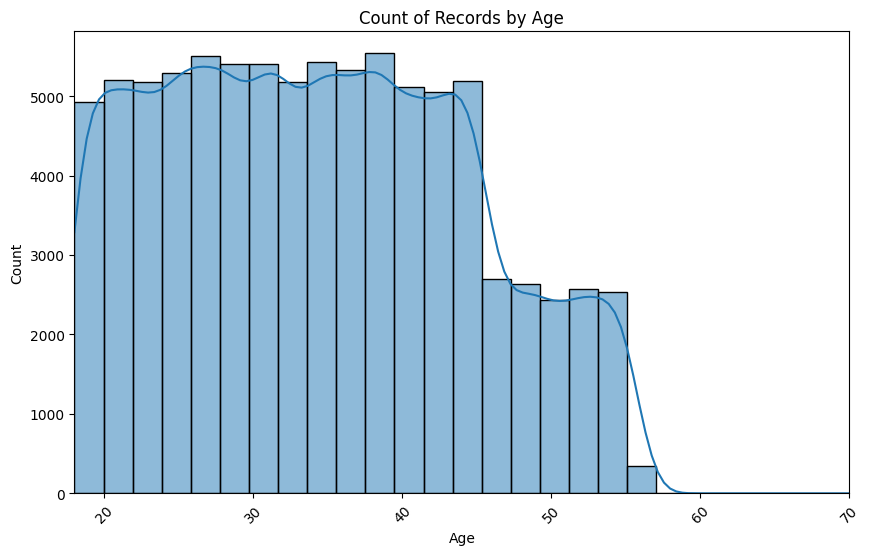

In [301]:
plt.figure(figsize=(10, 6))
sb.histplot(x='Age', data=Ctrain, bins=42 ,palette='Set2', kde=True)
plt.title('Count of Records by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.xlim(18, 70)
plt.show()

#now we can clearly see the distribution of ages.


## Occupation

In [302]:
print(Ctrain['Occupation'].nunique())
Ctrain['Occupation'].unique()
Ctrain['Occupation'].value_counts()


16


Occupation
_______          6161
Lawyer           5718
Architect        5557
Engineer         5542
Accountant       5467
Mechanic         5462
Scientist        5445
Media_Manager    5415
Developer        5411
Journalist       5347
Teacher          5339
Entrepreneur     5338
Doctor           5281
Musician         5189
Manager          5165
Writer           5100
Name: count, dtype: int64

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3809747057.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x='Occupation', data=Ctrain, bins=42 ,palette='Set2', kde=True)


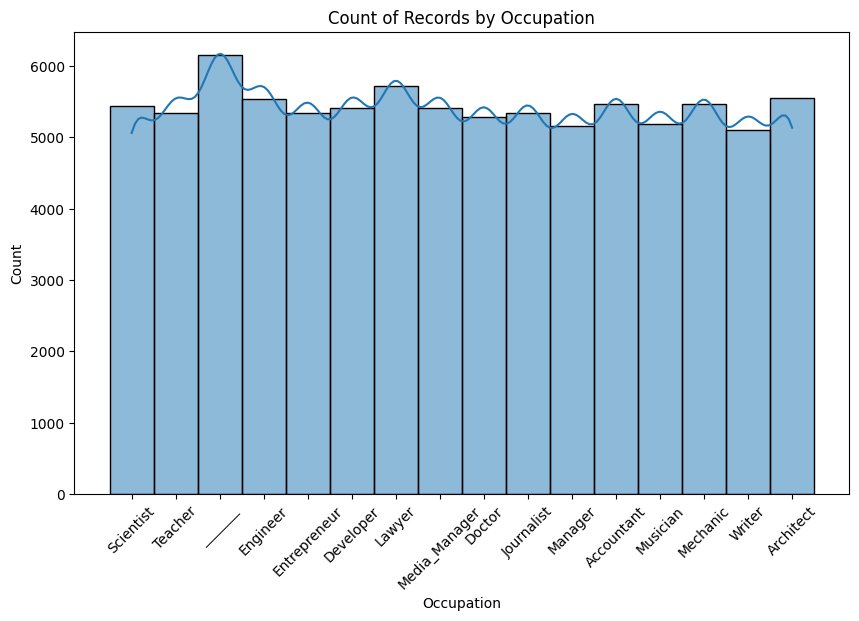

In [303]:
plt.figure(figsize=(10, 6))
sb.histplot(x='Occupation', data=Ctrain, bins=42 ,palette='Set2', kde=True)
plt.title('Count of Records by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

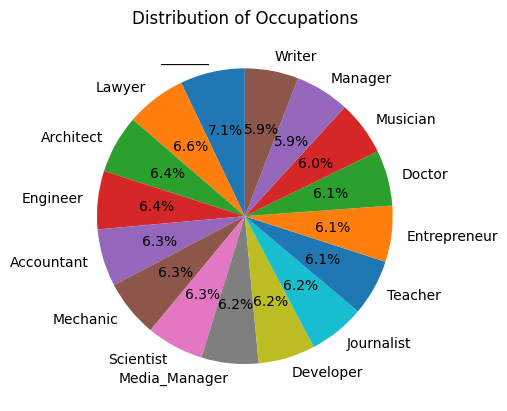

In [304]:

occupation_counts = Ctrain['Occupation'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Occupations")
plt.show()

In [305]:
#The '______' occupation is only 7.1% of the data - I will drop it because it is not a valid occupation
Ctrain = Ctrain[Ctrain['Occupation'] != '_______']

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3809747057.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x='Occupation', data=Ctrain, bins=42 ,palette='Set2', kde=True)


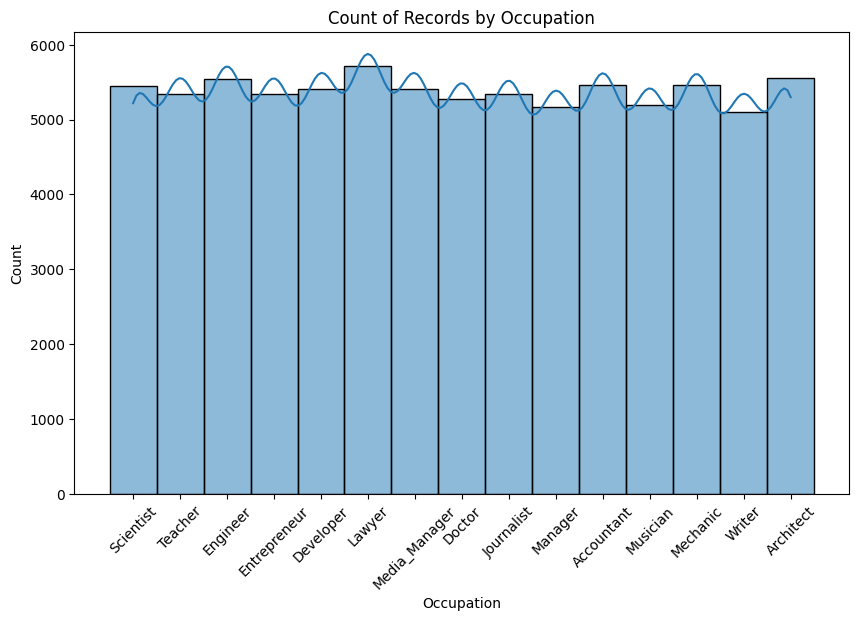

In [306]:
plt.figure(figsize=(10, 6))
sb.histplot(x='Occupation', data=Ctrain, bins=42 ,palette='Set2', kde=True)
plt.title('Count of Records by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

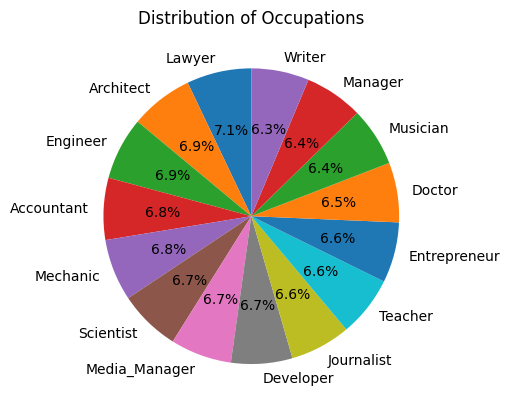

In [307]:

occupation_counts = Ctrain['Occupation'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Occupations")
plt.show()

In [308]:
Occupation_df = Ctrain['Occupation'].value_counts().reset_index()
Occupation_df.columns = ['Occupation', 'Count']
Occupation_df = Occupation_df.sort_values(by='Count', ascending=False)
Occupation_df

Occupation  Count
0          Lawyer   5718
1       Architect   5557
2        Engineer   5542
3      Accountant   5467
4        Mechanic   5462
5       Scientist   5445
6   Media_Manager   5415
7       Developer   5411
8      Journalist   5347
9         Teacher   5339
10   Entrepreneur   5338
11         Doctor   5281
12       Musician   5189
13        Manager   5165
14         Writer   5100

## Annual_Income

In [309]:
print(Ctrain['Annual_Income'].nunique())
print(Ctrain['Annual_Income'].unique())
print(Ctrain['Annual_Income'].value_counts())
Ctrain['Annual_Income'].describe()



12564
[19114.12 34847.84     0.   ... 37188.1  20002.88 39628.99]
Annual_Income
0.00           5709
36585.12         15
17273.83         14
17816.75         14
9141.63          14
               ... 
864701.00         1
19706755.00       1
436443.00         1
9524035.00        1
3485700.00        1
Name: count, Length: 12564, dtype: int64


count    8.077600e+04
mean     1.686806e+05
std      1.410077e+06
min      0.000000e+00
25%      1.758529e+04
50%      3.520820e+04
75%      7.129702e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [310]:
Annual_Income_filter = Ctrain.groupby('Customer_ID')['Annual_Income'].mean()
Annual_Income_filter 


Customer_ID
CUS_0x1000     30625.940000
CUS_0x1009     44839.440000
CUS_0x100b    113781.390000
CUS_0x1011     58918.470000
CUS_0x1013     98620.980000
                  ...      
CUS_0xff3      17032.785000
CUS_0xff4      21896.794286
CUS_0xff6     117639.920000
CUS_0xffc      60877.170000
CUS_0xffd      41398.440000
Name: Annual_Income, Length: 11810, dtype: float64

In [311]:
Annual_Income_filter2 = Annual_Income_filter.to_frame()
Annual_Income_filter

Customer_ID
CUS_0x1000     30625.940000
CUS_0x1009     44839.440000
CUS_0x100b    113781.390000
CUS_0x1011     58918.470000
CUS_0x1013     98620.980000
                  ...      
CUS_0xff3      17032.785000
CUS_0xff4      21896.794286
CUS_0xff6     117639.920000
CUS_0xffc      60877.170000
CUS_0xffd      41398.440000
Name: Annual_Income, Length: 11810, dtype: float64

## Num_Bank_Accounts

In [312]:
print(Ctrain['Num_Bank_Accounts'].min())
print(Ctrain['Num_Bank_Accounts'].max())
print(Ctrain['Num_Bank_Accounts'].mean())
print(Ctrain['Num_Bank_Accounts'].median())

-1
1798
17.218455977022877
5.0


In [313]:
print(Ctrain['Num_Bank_Accounts'].nunique())
print(Ctrain['Num_Bank_Accounts'].unique())
print(Ctrain['Num_Bank_Accounts'].value_counts())
print(Ctrain['Num_Bank_Accounts'].describe())

811
[   3    2    1    7    4    0    8    5    6    9   10 1414   67 1488
   91  528 1696  649  889 1668  685  857  975 1496 1534 1620   37 1388
 1429 1332 1588 1777 1096  494 1139  831 1613  741 1748 1644  823 1356
 1651   87  711  450  210 1671 1722  648  672 1662 1495  510  666  429
 1131 1026  526  718 1300 1315  501 1566  480 1042 1016  333 1265  563
 1190 1036 1611  555  280 1201  812 1487  222  212 1019 1222  610 1308
 1158 1115 1616  754 1601  797  521  703  933  959  809 1656 1113  964
  871  434 1295  565 1724  603  677  120  541  698 1101 1539 1462 1011
 1727   45 1266  897  675  826  946 1675  105 1327  845  473  710  527
  908   68 1628 1168  868  687  455 1003   26 1526  618 1342 1783  791
  683 1557  416 1747  137 1475 1257  338  942  170  973 1605 1478  386
 1033 1225 1731 1214 1481 1105 1231  347  108  148 1001 1467 1114  632
  246 1032 1394  689  482 1303  720  574  588 1358  650  708  179  844
   60  732 1494 1436  820 1576  818  794  534  556  691 1197 1155 1255
 1

In [314]:
pd.set_option( "display.max_rows", 20)
Ctrain['Num_Bank_Accounts'].value_counts().sort_values()
Num_Bank_Accounts_filter = Ctrain['Num_Bank_Accounts'].value_counts().to_frame()
Num_Bank_Accounts_filter
#You can see that the there are a lot of wierd values that damage the ability to find trends - i will erase
# all of the niche values and the 0 value is a mistake, I will drop it from the dataset as well. 


count
Num_Bank_Accounts       
6                  10208
7                  10136
4                  10087
8                  10021
5                   9937
...                  ...
1778                   1
652                    1
396                    1
1416                   1
577                    1

[811 rows x 1 columns]

In [315]:
Ctrain = Ctrain[Ctrain['Num_Bank_Accounts'] <= 11]
Ctrain

ID Customer_ID     Month           Name  Age Occupation  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23  Scientist   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23  Scientist   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23  Scientist   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23  Scientist   
5       0x1607   CUS_0xd40      June  Aaron Maashoh   23  Scientist   
...        ...         ...       ...            ...  ...        ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25   Mechanic   
99996  0x25fea  CUS_0x942c       May          Nicks   25   Mechanic   
99997  0x25feb  CUS_0x942c      June          Nicks   25   Mechanic   
99998  0x25fec  CUS_0x942c      July          Nicks   25   Mechanic   
99999  0x25fed  CUS_0x942c    August          Nicks   25   Mechanic   

       Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0           19114.12                  3                4              3   
1           19114.12                  3                4              3   
3           19114.12                  3                4              3   
4           19114.12                  3                4              3   
5           19114.12                  3                4              3   
...              ...                ...              ...            ...   
99995       39628.99                  4                6              7   
99996       39628.99                  4                6              7   
99997       39628.99                  4                6           5729   
99998       39628.99                  4                6              7   
99999           0.00                  4                6              7   

       Num_of_Loan                                       Type_of_Loan  \
0                4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
1                4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
3                4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
4                4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
5                4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
...            ...                                                ...   
99995            2                        Auto Loan, and Student Loan   
99996            2                        Auto Loan, and Student Loan   
99997            2                        Auto Loan, and Student Loan   
99998            2                        Auto Loan, and Student Loan   
99999            2                        Auto Loan, and Student Loan   

       Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                        3                       7                     4   
1                       -1                       0                     4   
3                        5                       4                     4   
4                        6                       0                     4   
5                        8                       4                     4   
...                    ...                     ...                   ...   
99995                   23                       7                     3   
99996                   18                       7                     3   
99997                   27                       6                     3   
99998                   20                       0                     3   
99999                   18                       6                     3   

      Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0              _            809.98                 26.822620   
1           Good            809.98                 31.944960   
3           Good            809.98                 31.377862   
4           Good            809.98                 24.797347   
5           Good            809.98                 27.262259   
...          ...               ...                       ...   
99995          _    

In [316]:

# Replace all values greater than 11 in the 'Num_Bank_Accounts' column with NaN
Ctrain.loc[Ctrain['Num_Bank_Accounts'] > 11, 'Num_Bank_Accounts'] = np.nan
Ctrain.loc[Ctrain['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = np.nan

# Verify the changes
print(Ctrain['Num_Bank_Accounts'].value_counts(dropna=False))

Num_Bank_Accounts
6.0     10208
7.0     10136
4.0     10087
8.0     10021
5.0      9937
3.0      9830
9.0      4187
10.0     4045
1.0      3820
0.0      3704
2.0      3703
NaN        20
11.0        7
Name: count, dtype: int64


In [317]:
Ctrain['Num_Bank_Accounts'].value_counts().sort_values()
Num_Bank_Accounts_filter = Ctrain['Num_Bank_Accounts'].value_counts().to_frame()
Num_Bank_Accounts_filter

count
Num_Bank_Accounts       
6.0                10208
7.0                10136
4.0                10087
8.0                10021
5.0                 9937
3.0                 9830
9.0                 4187
10.0                4045
1.0                 3820
0.0                 3704
2.0                 3703
11.0                   7

In [318]:
Num_Bank_Accounts_filter.sort_index()
Num_Bank_Accounts_filter = Num_Bank_Accounts_filter.drop(0.0)
Num_Bank_Accounts_filter = Num_Bank_Accounts_filter.drop(11.0)
#there can't be 0 bank accounts and 11.0 is to small, I will drop it from the dataset as well.

In [319]:
# Doing the same for Ctrain
# Remove rows where 'Num_Bank_Accounts' is 11.0 or 0.0
Ctrain = Ctrain[(Ctrain['Num_Bank_Accounts'] != 11.0) & (Ctrain['Num_Bank_Accounts'] != 0.0)]

# Verify the changes
print(Ctrain['Num_Bank_Accounts'].value_counts())

Num_Bank_Accounts
6.0     10208
7.0     10136
4.0     10087
8.0     10021
5.0      9937
3.0      9830
9.0      4187
10.0     4045
1.0      3820
2.0      3703
Name: count, dtype: int64


In [320]:
Num_Bank_Accounts_filter.sort_index()

count
Num_Bank_Accounts       
1.0                 3820
2.0                 3703
3.0                 9830
4.0                10087
5.0                 9937
6.0                10208
7.0                10136
8.0                10021
9.0                 4187
10.0                4045

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3198147624.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Num_Bank_Accounts_filter.index, y=Num_Bank_Accounts_filter['count'], palette='Set2')


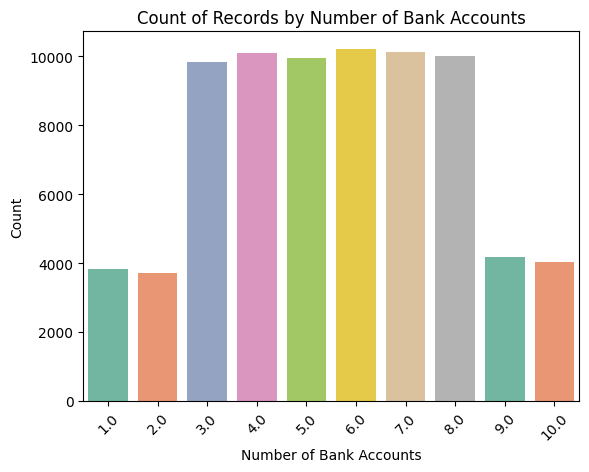

In [321]:
sb.barplot(x=Num_Bank_Accounts_filter.index, y=Num_Bank_Accounts_filter['count'], palette='Set2')
plt.title('Count of Records by Number of Bank Accounts')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

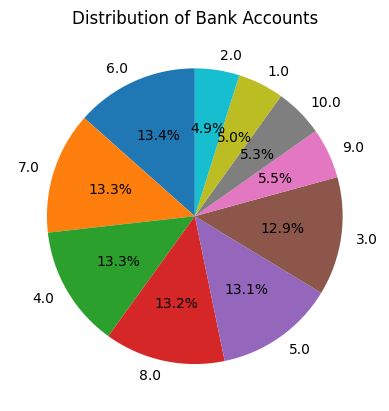

In [322]:
# Use the Num_Bank_Accounts_filter DataFrame for the counts of Num_Bank_Accounts
bankaccount_counts = Num_Bank_Accounts_filter['count']

plt.pie(bankaccount_counts, labels=Num_Bank_Accounts_filter.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Bank Accounts")
plt.show()

## Num_Credit_Card

In [331]:
print(Ctrain['Num_Credit_Card'].nunique())
print(Ctrain['Num_Credit_Card'].unique())
print(Ctrain['Num_Credit_Card'].value_counts())
print(Ctrain['Num_Credit_Card'].describe())

12
[ 4. nan  5.  7.  6.  8.  3.  9.  2. 10.  1. 11.  0.]
Num_Credit_Card
5.0     13855
6.0     12840
7.0     12695
4.0     10720
3.0     10200
8.0      3831
10.0     3573
9.0      3474
2.0      1530
1.0      1516
11.0       26
0.0         7
Name: count, dtype: int64
count    74267.000000
mean         5.536322
std          2.050656
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64


In [332]:

# Replace all values greater than 11 in the 'Num_Credit_Card' column with NaN
Ctrain.loc[Ctrain['Num_Credit_Card'] > 11, 'Num_Credit_Card'] = np.nan
Ctrain.loc[Ctrain['Num_Credit_Card'] < 0, 'Num_Credit_Card'] = np.nan

# Verify the changes
print(Ctrain['Num_Credit_Card'].value_counts(dropna=False))

Num_Credit_Card
5.0     13855
6.0     12840
7.0     12695
4.0     10720
3.0     10200
8.0      3831
10.0     3573
9.0      3474
NaN      1727
2.0      1530
1.0      1516
11.0       26
0.0         7
Name: count, dtype: int64


In [333]:
pd.set_option( "display.max_rows", 20)
Ctrain['Num_Credit_Card'].value_counts().sort_values()
Num_Credit_Card_filter = Ctrain['Num_Credit_Card'].value_counts().to_frame()
Num_Credit_Card_filter


count
Num_Credit_Card       
5.0              13855
6.0              12840
7.0              12695
4.0              10720
3.0              10200
8.0               3831
10.0              3573
9.0               3474
2.0               1530
1.0               1516
11.0                26
0.0                  7

In [334]:
Ctrain['Num_Credit_Card'].value_counts().sort_values().to_frame()

count
Num_Credit_Card       
0.0                  7
11.0                26
1.0               1516
2.0               1530
9.0               3474
10.0              3573
8.0               3831
3.0              10200
4.0              10720
7.0              12695
6.0              12840
5.0              13855

In [335]:
Num_Credit_Card_filter.rename(columns={'Num_Credit_Card': 'count'}, inplace=True)

In [336]:
Num_Credit_Card_filter

count
Num_Credit_Card       
5.0              13855
6.0              12840
7.0              12695
4.0              10720
3.0              10200
8.0               3831
10.0              3573
9.0               3474
2.0               1530
1.0               1516
11.0                26
0.0                  7

In [337]:
Num_Credit_Card_filter.sort_index()

count
Num_Credit_Card       
0.0                  7
1.0               1516
2.0               1530
3.0              10200
4.0              10720
5.0              13855
6.0              12840
7.0              12695
8.0               3831
9.0               3474
10.0              3573
11.0                26

In [338]:
Num_Credit_Card_filter = Num_Credit_Card_filter.drop(0.0)
Num_Credit_Card_filter = Num_Credit_Card_filter.drop(11.0)
#there can't be 0 bank accounts and 11.0 is to small in value size, I will drop it from the dataset as well.
Num_Credit_Card_filter

count
Num_Credit_Card       
5.0              13855
6.0              12840
7.0              12695
4.0              10720
3.0              10200
8.0               3831
10.0              3573
9.0               3474
2.0               1530
1.0               1516

In [339]:
# Doing the same for Ctrain
# Remove rows where 'Num_Credit_Card' is 11.0 or 0.0
Ctrain = Ctrain[(Ctrain['Num_Credit_Card'] != 11.0) & (Ctrain['Num_Credit_Card'] != 0.0)]

# Verify the changes
print(Ctrain['Num_Credit_Card'].value_counts())

Num_Credit_Card
5.0     13855
6.0     12840
7.0     12695
4.0     10720
3.0     10200
8.0      3831
10.0     3573
9.0      3474
2.0      1530
1.0      1516
Name: count, dtype: int64


In [340]:
Num_Credit_Card_filter.sort_index()

count
Num_Credit_Card       
1.0               1516
2.0               1530
3.0              10200
4.0              10720
5.0              13855
6.0              12840
7.0              12695
8.0               3831
9.0               3474
10.0              3573

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\643083979.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Num_Credit_Card_filter.index, y=Num_Credit_Card_filter['count'], palette='Set2')


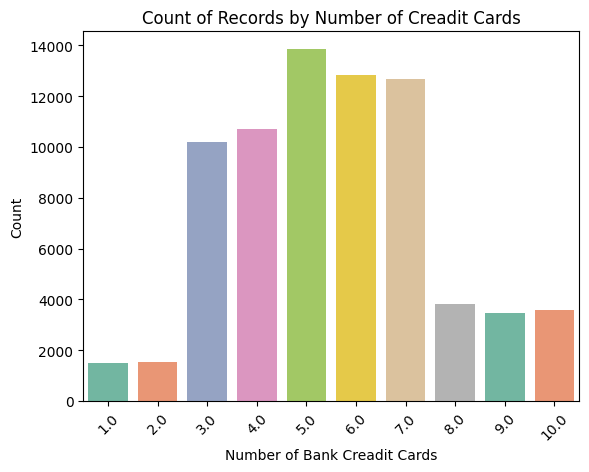

In [341]:
sb.barplot(x=Num_Credit_Card_filter.index, y=Num_Credit_Card_filter['count'], palette='Set2')
plt.title('Count of Records by Number of Creadit Cards')
plt.xlabel('Number of Bank Creadit Cards')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

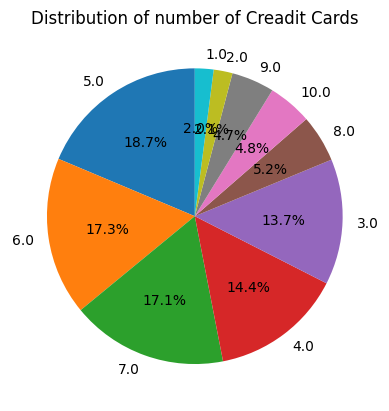

In [342]:
creaditcard_counts = Num_Credit_Card_filter['count']

plt.pie(creaditcard_counts, labels=Num_Credit_Card_filter.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of number of Creadit Cards")
plt.show()

## Interest_Rate

In [343]:
print(Ctrain['Interest_Rate'].nunique())
print(Ctrain['Interest_Rate'].unique())
print(Ctrain['Interest_Rate'].value_counts())
print(Ctrain['Interest_Rate'].describe())

1395
[   3    6    8 ... 4017 1347 5729]
Interest_Rate
8       3748
5       3710
6       3590
9       3463
7       3461
        ... 
1426       1
4287       1
3667       1
4104       1
219        1
Name: count, Length: 1395, dtype: int64
count    75961.000000
mean        73.474336
std        470.710807
min          1.000000
25%          8.000000
50%         14.000000
75%         20.000000
max       5797.000000
Name: Interest_Rate, dtype: float64


In [344]:
Interest_Rate_filter = Ctrain['Interest_Rate'].value_counts().to_frame()
Interest_Rate_filter

count
Interest_Rate       
8               3748
5               3710
6               3590
9               3463
7               3461
...              ...
1426               1
4287               1
3667               1
4104               1
219                1

[1395 rows x 1 columns]

In [345]:
pd.set_option( "display.max_rows", 20)
Interest_Rate_filter.sort_index()
#The vlaues up to 34.0 are ok, but more then 35.0 is irrelevant, I will drop it from the dataset as well.


count
Interest_Rate       
1               1953
2               1754
3               2006
4               1862
5               3710
...              ...
5774               1
5775               1
5776               1
5789               1
5797               1

[1395 rows x 1 columns]

In [346]:
Ctrain.loc[Ctrain['Interest_Rate'] > 34, 'Interest_Rate'] = np.nan

# Verify the changes
print(Ctrain['Interest_Rate'].value_counts(dropna=False))

Interest_Rate
8.0     3748
5.0     3710
6.0     3590
9.0     3463
7.0     3461
        ... 
25.0    1175
26.0    1154
34.0    1114
33.0    1067
31.0    1065
Name: count, Length: 35, dtype: int64


In [347]:
pd.set_option( "display.max_rows", 20)
Interest_Rate_filter = Ctrain['Interest_Rate'].value_counts().to_frame()
Interest_Rate_filter

count
Interest_Rate       
8.0             3748
5.0             3710
6.0             3590
9.0             3463
7.0             3461
...              ...
25.0            1175
26.0            1154
34.0            1114
33.0            1067
31.0            1065

[34 rows x 1 columns]

In [348]:
Interest_Rate_filter.sort_index()

count
Interest_Rate       
1.0             1953
2.0             1754
3.0             2006
4.0             1862
5.0             3710
...              ...
30.0            1267
31.0            1065
32.0            1286
33.0            1067
34.0            1114

[34 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\964532849.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Interest_Rate_filter.index, y=Interest_Rate_filter['count'], palette='Set2')


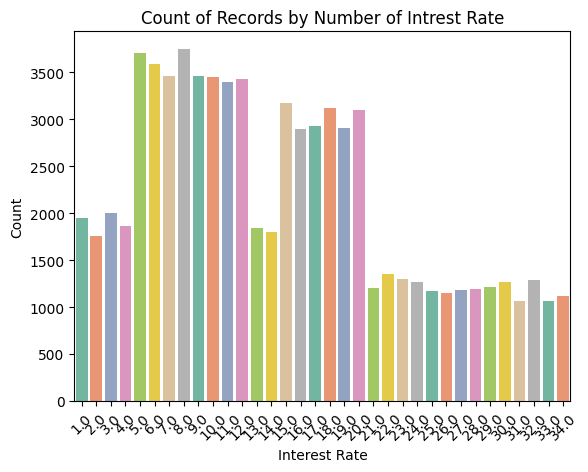

In [349]:

sb.barplot(x=Interest_Rate_filter.index, y=Interest_Rate_filter['count'], palette='Set2')
plt.title('Count of Records by Number of Intrest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

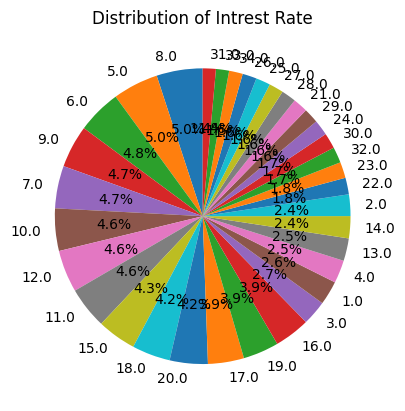

In [350]:
intrest_counts = Interest_Rate_filter['count']

plt.pie(intrest_counts, labels=Interest_Rate_filter.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Intrest Rate")
plt.show()

## Num_of_Loan

In [351]:
print(Ctrain['Num_of_Loan'].nunique())
print(Ctrain['Num_of_Loan'].unique())
print(Ctrain['Num_of_Loan'].value_counts())
print(Ctrain['Num_of_Loan'].describe())

310
[   4    1    3  967 -100    0    2    7    5    6    8    9 1464  622
  352 1017  146  563  341  720   49  737 1106  466  728  313  119  663
  640 1019  501 1302   39  716  848  931  424 1110 1152  457 1433 1187
   52 1480 1047 1035  193  699  329 1451  484  649  995  545  684 1135
 1094  654  348  614  323 1406  430 1461  905 1312 1424   95 1353 1228
  819 1006  359 1209  590  696 1465  911   70 1369  143 1416 1096 1474
  420  904   89 1259  527 1241  449  418   23  238  638  138  280 1070
 1484  494  404 1354 1495 1391  601 1319  898  231  752  174  961 1046
  834  284  438  288 1463 1151  198 1015  855 1444  103  745  252  241
   31  405 1217 1257  172  137  157 1088 1048  330  321   58  952  939
  562 1202  302  943  955  781  100 1365  860  217  191   32  282  351
 1387  416  833  292 1227  639  243  267  510  332  597  311  492  820
  336  123 1441   50  940  935  596   29 1182 1014  251  365 1447  742
 1085  148  462  832  881 1225 1412 1127  910  999  733  101  237  659
  

In [352]:
pd.set_option( "display.max_rows", 20)
Num_of_Loan_filter = Ctrain['Num_of_Loan'].value_counts().to_frame()
Num_of_Loan_filter

count
Num_of_Loan       
0            11489
3            10899
2            10882
4            10880
1             7782
...            ...
497              1
927              1
653              1
662              1
529              1

[310 rows x 1 columns]

In [353]:
Ctrain.loc[Ctrain['Num_of_Loan'] > 8, 'Num_of_Loan'] = np.nan

# Verify the changes
print(Ctrain['Num_of_Loan'].value_counts(dropna=False))

Num_of_Loan
 0.0      11489
 3.0      10899
 2.0      10882
 4.0      10880
 1.0       7782
 6.0       5515
 7.0       5197
 5.0       5105
 NaN       2980
-100.0     2948
 8.0       2284
Name: count, dtype: int64


In [354]:
pd.set_option( "display.max_rows", 20)
Num_of_Loan_filter = Ctrain['Num_of_Loan'].value_counts().to_frame()
Num_of_Loan_filter

count
Num_of_Loan       
 0.0         11489
 3.0         10899
 2.0         10882
 4.0         10880
 1.0          7782
 6.0          5515
 7.0          5197
 5.0          5105
-100.0        2948
 8.0          2284

In [355]:
Num_of_Loan_filter.sort_index()
Num_of_Loan_filter = Num_of_Loan_filter.drop(-100.0)


In [356]:
# Doing the same for Ctrain
# Remove rows where 'Num_of_Loan' is 8.0 or -100.0
Ctrain = Ctrain[(Ctrain['Num_of_Loan'] != -100.0)]

# Verify the changes
print(Ctrain['Num_of_Loan'].value_counts())

Num_of_Loan
0.0    11489
3.0    10899
2.0    10882
4.0    10880
1.0     7782
6.0     5515
7.0     5197
5.0     5105
8.0     2284
Name: count, dtype: int64


In [357]:
Num_of_Loan_filter

count
Num_of_Loan       
0.0          11489
3.0          10899
2.0          10882
4.0          10880
1.0           7782
6.0           5515
7.0           5197
5.0           5105
8.0           2284

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\4044719035.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Num_of_Loan_filter.index, y=Num_of_Loan_filter['count'], palette='Set2')


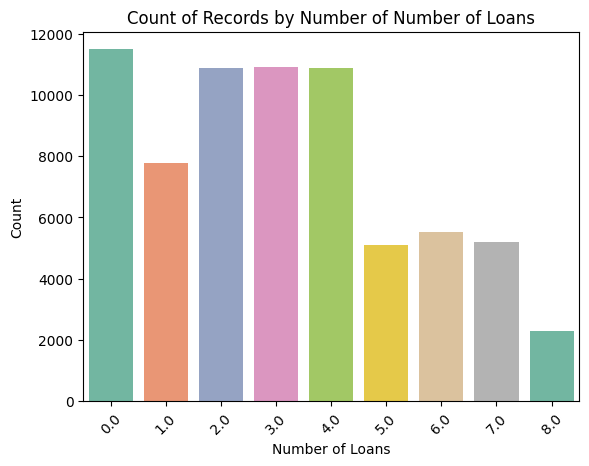

In [358]:
sb.barplot(x=Num_of_Loan_filter.index, y=Num_of_Loan_filter['count'], palette='Set2')
plt.title('Count of Records by Number of Number of Loans')
plt.xlabel('Number of Loans')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

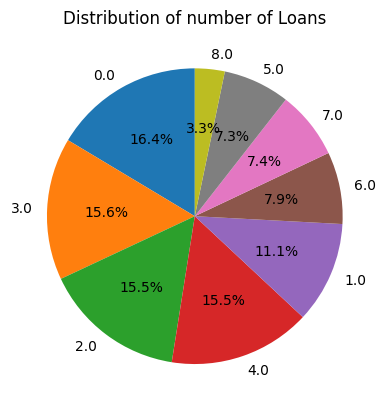

In [359]:
Loan_counts = Num_of_Loan_filter['count']

plt.pie(Loan_counts, labels=Num_of_Loan_filter.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of number of Loans")
plt.show()

## Type_of_Loan

In [360]:
print(Ctrain['Type_of_Loan'].nunique())
print(Ctrain['Type_of_Loan'].unique())
print(Ctrain['Type_of_Loan'].value_counts())
print(Ctrain['Type_of_Loan'].describe())

5710
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']
Type_of_Loan
Not Specified                                                                                                                1011
Personal Loan                                                                                                                 987
Credit-Builder Loan                                                                                                           970
Debt Consolidation Loan                                                                                                       932
Student Loan                                                                                                                  

In [361]:
print(Ctrain['Type_of_Loan'].unique())

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']


In [362]:
Type_of_Loan_filter = Ctrain['Type_of_Loan'].value_counts().to_frame()
Type_of_Loan_filter
#Now this is diffrent - we can have several types of Loans so i will have to sepearate them into diffrent columns


count
Type_of_Loan                                             
Not Specified                                        1011
Personal Loan                                         987
Credit-Builder Loan                                   970
Debt Consolidation Loan                               932
Student Loan                                          910
...                                                   ...
Auto Loan, Student Loan, Debt Consolidation Loa...      1
Payday Loan, Student Loan, Debt Consolidation L...      1
Auto Loan, Credit-Builder Loan, Home Equity Loa...      1
Personal Loan, Student Loan, Debt Consolidation...      1
Not Specified, Mortgage Loan, Credit-Builder Lo...      1

[5710 rows x 1 columns]

In [363]:
Type_of_Loan_df = Ctrain.groupby('Customer_ID')['Type_of_Loan'].apply(lambda x: ','.join(x.dropna())).str.get_dummies(sep=',')
Type_of_Loan_df
#Now I can see the different types of loans separately

Auto Loan   Credit-Builder Loan   Debt Consolidation Loan  \
Customer_ID                                                               
CUS_0x1000            0                     0                         0   
CUS_0x1009            0                     1                         0   
CUS_0x100b            0                     0                         0   
CUS_0x1011            0                     1                         0   
CUS_0x1013            0                     0                         1   
...                 ...                   ...                       ...   
CUS_0xfea             0                     0                         0   
CUS_0xff4             0                     1                         0   
CUS_0xff6             0                     0                         0   
CUS_0xffc             0                     0                         0   
CUS_0xffd             0                     0                         0   

              Home Equity Loan   Mortgage Loan   Not Specified   Payday Loan  \
Customer_ID                                                                    
CUS_0x1000                   0               0               0             0   
CUS_0x1009                   1               0               0             0   
CUS_0x100b                   0               0               0             0   
CUS_0x1011                   0               0               0             0   
CUS_0x1013                   0               0               0             0   
...                        ...             ...             ...           ...   
CUS_0xfea                    0               0               0             0   
CUS_0xff4                    0               0               0             0   
CUS_0xff6                    0               0               0             0   
CUS_0xffc                    1               0               1             1   
CUS_0xffd                    0               1               0             1   

              Personal Loan   Student Loan   and Auto Loan  \
Customer_ID                                                  
CUS_0x1000                0              0               0   
CUS_0x1009                0              0               0   
CUS_0x100b                0              0               0   
CUS_0x1011                0              0               0   
CUS_0x1013                0              0               0   
...                     ...            ...             ...   
CUS_0xfea                 0              0               0   
CUS_0xff4                 0              1               1   
CUS_0xff6                 0              0               1   
CUS_0xffc                 0              1               0   
CUS_0xffd                 0              0               0   

              and Credit-Builder Loan   and Debt Consolidation Loan  \
Customer_ID                                                           
CUS_0x1000                          0                             0   
CUS_0x1009                          0                             0   
CUS_0x100b                          0                             0   
CUS_0x1011                          0                             1   
CUS_0x1013                          0                             0   
...                               ...                           ...   
CUS_0xfea                           0                             0   
CUS_0xff4                           0                             0   
CUS_0xff6                           0                             0   
CUS_0xffc                           0                             0   
CUS_0xffd                           0                             0   

              and Home Equity Loan   and Mortgage Loan   and Not Specified  \
Customer_ID                                                                  
CUS_0x1000                       1                   0                   0   
CUS_0x1009                      

In [364]:
pd.set_option( "display.max_rows", 100)
Type_of_Loan_df.loc['CUS_0x1000']

 Auto Loan                      0
 Credit-Builder Loan            0
 Debt Consolidation Loan        0
 Home Equity Loan               0
 Mortgage Loan                  0
 Not Specified                  0
 Payday Loan                    0
 Personal Loan                  0
 Student Loan                   0
 and Auto Loan                  0
 and Credit-Builder Loan        0
 and Debt Consolidation Loan    0
 and Home Equity Loan           1
 and Mortgage Loan              0
 and Not Specified              0
 and Payday Loan                0
 and Personal Loan              0
 and Student Loan               0
Auto Loan                       0
Credit-Builder Loan             1
Debt Consolidation Loan         0
Home Equity Loan                0
Mortgage Loan                   0
Not Specified                   0
Payday Loan                     0
Personal Loan                   0
Student Loan                    0
Name: CUS_0x1000, dtype: int64

In [365]:
Type_of_Loan_df['sum of all loans'] = Type_of_Loan_df.sum(axis=1)
Type_of_Loan_df

Auto Loan   Credit-Builder Loan   Debt Consolidation Loan  \
Customer_ID                                                               
CUS_0x1000            0                     0                         0   
CUS_0x1009            0                     1                         0   
CUS_0x100b            0                     0                         0   
CUS_0x1011            0                     1                         0   
CUS_0x1013            0                     0                         1   
...                 ...                   ...                       ...   
CUS_0xfea             0                     0                         0   
CUS_0xff4             0                     1                         0   
CUS_0xff6             0                     0                         0   
CUS_0xffc             0                     0                         0   
CUS_0xffd             0                     0                         0   

              Home Equity Loan   Mortgage Loan   Not Specified   Payday Loan  \
Customer_ID                                                                    
CUS_0x1000                   0               0               0             0   
CUS_0x1009                   1               0               0             0   
CUS_0x100b                   0               0               0             0   
CUS_0x1011                   0               0               0             0   
CUS_0x1013                   0               0               0             0   
...                        ...             ...             ...           ...   
CUS_0xfea                    0               0               0             0   
CUS_0xff4                    0               0               0             0   
CUS_0xff6                    0               0               0             0   
CUS_0xffc                    1               0               1             1   
CUS_0xffd                    0               1               0             1   

              Personal Loan   Student Loan   and Auto Loan  \
Customer_ID                                                  
CUS_0x1000                0              0               0   
CUS_0x1009                0              0               0   
CUS_0x100b                0              0               0   
CUS_0x1011                0              0               0   
CUS_0x1013                0              0               0   
...                     ...            ...             ...   
CUS_0xfea                 0              0               0   
CUS_0xff4                 0              1               1   
CUS_0xff6                 0              0               1   
CUS_0xffc                 0              1               0   
CUS_0xffd                 0              0               0   

              and Credit-Builder Loan   and Debt Consolidation Loan  \
Customer_ID                                                           
CUS_0x1000                          0                             0   
CUS_0x1009                          0                             0   
CUS_0x100b                          0                             0   
CUS_0x1011                          0                             1   
CUS_0x1013                          0                             0   
...                               ...                           ...   
CUS_0xfea                           0                             0   
CUS_0xff4                           0                             0   
CUS_0xff6                           0                             0   
CUS_0xffc                           0                             0   
CUS_0xffd                           0                             0   

              and Home Equity Loan   and Mortgage Loan   and Not Specified  \
Customer_ID                                                                  
CUS_0x1000                       1                   0                   0   
CUS_0x1009                      

In [366]:
Ctrain['sum of all loans'] = Ctrain['Type_of_Loan']

In [367]:
Type_of_Loan_df.loc['CUS_0x21b1']

 Auto Loan                      0
 Credit-Builder Loan            0
 Debt Consolidation Loan        0
 Home Equity Loan               0
 Mortgage Loan                  0
 Not Specified                  0
 Payday Loan                    0
 Personal Loan                  0
 Student Loan                   0
 and Auto Loan                  0
 and Credit-Builder Loan        0
 and Debt Consolidation Loan    0
 and Home Equity Loan           0
 and Mortgage Loan              0
 and Not Specified              0
 and Payday Loan                0
 and Personal Loan              0
 and Student Loan               0
Auto Loan                       0
Credit-Builder Loan             1
Debt Consolidation Loan         0
Home Equity Loan                0
Mortgage Loan                   0
Not Specified                   0
Payday Loan                     0
Personal Loan                   0
Student Loan                    0
sum of all loans                1
Name: CUS_0x21b1, dtype: int64

In [368]:
# Merge the 'sum of loans' column into Ctrain with custom suffixes to avoid duplicate column names
Ctrain = Ctrain.merge(Type_of_Loan_df[['sum of all loans']], left_on='Customer_ID', right_index=True, how='left', suffixes=('', '_new'))

# Verify the changes
Ctrain.head(10)

ID Customer_ID     Month             Name  Age Occupation  \
0   0x1602   CUS_0xd40   January    Aaron Maashoh   23  Scientist   
1   0x1603   CUS_0xd40  February    Aaron Maashoh   23  Scientist   
3   0x1605   CUS_0xd40     April    Aaron Maashoh   23  Scientist   
4   0x1606   CUS_0xd40       May    Aaron Maashoh   23  Scientist   
5   0x1607   CUS_0xd40      June    Aaron Maashoh   23  Scientist   
6   0x1608   CUS_0xd40      July    Aaron Maashoh   23  Scientist   
7   0x1609   CUS_0xd40    August              NaN   23  Scientist   
9   0x160f  CUS_0x21b1  February  Rick Rothackerj   28    Teacher   
10  0x1610  CUS_0x21b1     March  Rick Rothackerj   28    Teacher   
11  0x1611  CUS_0x21b1     April  Rick Rothackerj   28    Teacher   

    Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0        19114.12                3.0              4.0            3.0   
1        19114.12                3.0              4.0            3.0   
3        19114.12                3.0              4.0            3.0   
4        19114.12                3.0              4.0            3.0   
5        19114.12                3.0              4.0            3.0   
6        19114.12                3.0              4.0            3.0   
7        19114.12                3.0              4.0            3.0   
9        34847.84                2.0              4.0            6.0   
10           0.00                2.0              NaN            6.0   
11       34847.84                2.0              4.0            6.0   

    Num_of_Loan                                       Type_of_Loan  \
0           4.0  Auto Loan, Credit-Builder Loan, Personal Loan,...   
1           4.0  Auto Loan, Credit-Builder Loan, Personal Loan,...   
3           4.0  Auto Loan, Credit-Builder Loan, Personal Loan,...   
4           4.0  Auto Loan, Credit-Builder Loan, Personal Loan,...   
5           4.0  Auto Loan, Credit-Builder Loan, Personal Loan,...   
6           4.0  Auto Loan, Credit-Builder Loan, Personal Loan,...   
7           4.0  Auto Loan, Credit-Builder Loan, Personal Loan,...   
9           1.0                                Credit-Builder Loan   
10          1.0                                Credit-Builder Loan   
11          1.0                                Credit-Builder Loan   

    Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                     3                       7                     4   
1                    -1                       0                     4   
3                     5                       4                     4   
4                     6                       0                     4   
5                     8                       4                     4   
6                     3                       0                     4   
7                     3                       6                     4   
9                     7                       1                     2   
10                    3                      -1                     2   
11                    3                       0                     2   

   Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0           _            809.98                 26.822620   
1        Good            809.98                 31.944960   
3        Good            809.98                 31.377862   
4        Good            809.98                 24.797347   
5        Good            809.98                 27.262259   
6        Good            809.98                 22.537593   
7        Good            809.98                 23.933795   
9        Good            605.03                 38.550848   
10          _            605.03                 33.224951   
11       Good            605.03                 39.182656   

        Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0    22 Years and 1 Months                    No            49.574949   
1                      NaN                    No            49

## Delay_from_due_date

In [369]:
print(Ctrain['Delay_from_due_date'].nunique())
print(Ctrain['Delay_from_due_date'].unique())
print(Ctrain['Delay_from_due_date'].value_counts())
print(Ctrain['Delay_from_due_date'].describe())

73
[ 3 -1  5  6  8  7 13  0  9  1 10 12 11 30 14  2 -2 16 17  4 15 23 22 21
 18 19 52 51 48 53 26 43 25 20 47 46 49 61 31 29 28 45 59 55 56 27 62 65
 64 54 50 36 41 57 24 39 44 33 35 34 38 63 42 40 32 60 37 -3 -5 58 -4 66
 67]
Delay_from_due_date
 15    2598
 13    2479
 8     2472
 14    2421
 11    2371
 10    2351
 9     2324
 12    2313
 7     2298
 5     2221
 6     2220
 18    1982
 19    1969
 27    1965
 17    1910
 24    1904
 20    1878
 16    1877
 28    1853
 25    1837
 21    1809
 23    1793
 29    1784
 26    1764
 22    1716
 30    1700
 4     1170
 3     1168
 1      932
 2      932
 0      823
 33     620
 31     618
 32     568
 47     509
 34     477
 52     468
 54     452
 48     446
 42     430
 58     426
 44     423
 36     421
 35     420
 41     417
 40     417
 50     408
 38     407
 62     406
 55     406
 53     404
 45     398
 57     397
 51     394
 56     392
 49     390
 59     373
 60     371
 43     369
 61     366
 39     354
 46     338
 37     3

In [370]:
pd.set_option( "display.max_rows", 20)
Delay_from_due_date_filter = Ctrain['Delay_from_due_date'].value_counts().to_frame()
Delay_from_due_date_filter

count
Delay_from_due_date       
 15                   2598
 13                   2479
 8                    2472
 14                   2421
 11                   2371
...                    ...
 64                     40
 65                     40
-5                      22
 66                     20
 67                     13

[73 rows x 1 columns]

In [371]:
Delay_from_due_date_filter.sort_index()
Delay_from_due_date_filter = Delay_from_due_date_filter.drop(-1)
Delay_from_due_date_filter = Delay_from_due_date_filter.drop(-2)
Delay_from_due_date_filter = Delay_from_due_date_filter.drop(-3)
Delay_from_due_date_filter = Delay_from_due_date_filter.drop(-4)
Delay_from_due_date_filter = Delay_from_due_date_filter.drop(-5)
#I dropped all the negative values because they are not possible

In [372]:
#Doing the same for Ctrain
# Remove rows where 'Delay_from_due_date' has negative values
Ctrain = Ctrain[Ctrain['Delay_from_due_date'] >= 0]

# Verify the changes
print(Ctrain['Delay_from_due_date'].value_counts())

Delay_from_due_date
15    2598
13    2479
8     2472
14    2421
11    2371
      ... 
63      45
65      40
64      40
66      20
67      13
Name: count, Length: 68, dtype: int64


C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1778065296.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x='Delay_from_due_date', data=Ctrain, bins=42 ,palette='Set2', kde=True)


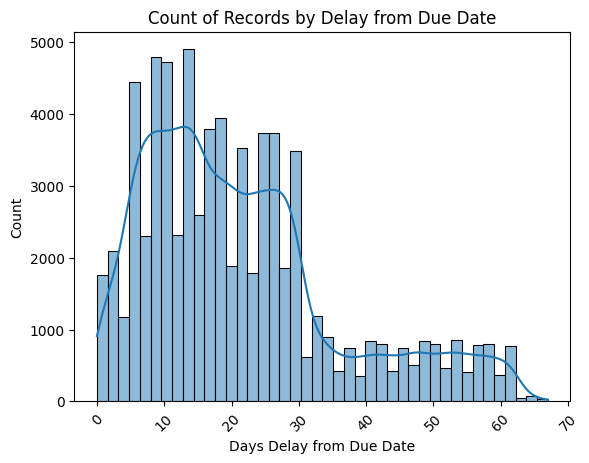

In [373]:
sb.histplot(x='Delay_from_due_date', data=Ctrain, bins=42 ,palette='Set2', kde=True)
plt.title('Count of Records by Delay from Due Date')
plt.xlabel('Days Delay from Due Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Num_of_Delayed_Payment

In [374]:
print(Ctrain['Num_of_Delayed_Payment'].nunique())
print(Ctrain['Num_of_Delayed_Payment'].unique())
print(Ctrain['Num_of_Delayed_Payment'].value_counts())
print(Ctrain['Num_of_Delayed_Payment'].describe())

539
[   7    4    0    6    1   -1    5    3    9   15   17   10   14   11
    8   20   22    2   13   16   12   18   19   23   21   24 3318 3083
 1338   25 1106   26 2672 2008  538 3478 2420  707  708 3815   28   27
   -2 1867 2250 1463 1941   -3 2628 3069  306 3539 4128 1946  827 2297
 2566  904  182 3568 2503 1552 2812 1697  851 3905  923 3253 2689 3858
  642 3457 1732 3154 3037 2204 3103 1063 2056  211  793 3484 3491 2072
 3050 1049 2162 1718 1014 3260 3855   84 3251 1832 4069 3010  733 4241
  166 2461 1749 3200 2185 4161 3009  359 2015 1523  594  186  281  559
 2165 1509  779 2323 1471 1538 3529 3040 2697 3179 1332 3175 3112  829
 4022 4023  531 3092 3191 2400 3621  544 1864  142 2300   72  497  398
 3960 3043 4216 2903 2658  921 1328 3404 2438  809 1996 4164 1370 1204
 2167 4011 2594 2533 1663 2919 3316 2801 3355 2529 2488 4266 1243  739
  845 4107 1884 2660  290  674 2450 3738 1792 2823  775  960 1706 2493
  192 1849 3559 4096 1953 2657 4384 1647 2694 3533 2677 2413 4139 4326
 4

In [375]:
pd.set_option( "display.max_rows", 20)
Num_of_Delayed_Payment_filter = Ctrain['Num_of_Delayed_Payment'].value_counts().to_frame()
Num_of_Delayed_Payment_filter

count
Num_of_Delayed_Payment       
0                        8107
19                       4060
17                       3937
16                       3822
18                       3791
...                       ...
2689                        1
3253                        1
923                         1
3905                        1
851                         1

[539 rows x 1 columns]

In [376]:
pd.set_option( "display.max_rows", 20)
Num_of_Delayed_Payment_filter.sort_index()
#above 28

count
Num_of_Delayed_Payment       
-3                         58
-2                        154
-1                        205
 0                       8107
 1                       1083
...                       ...
 4344                       1
 4360                       1
 4384                       1
 4388                       1
 4397                       1

[539 rows x 1 columns]

In [377]:
Ctrain.loc[Ctrain['Num_of_Delayed_Payment'] > 28, 'Num_of_Delayed_Payment'] = np.nan

In [378]:
print(Ctrain['Num_of_Delayed_Payment'].value_counts(dropna=False)) 

Num_of_Delayed_Payment
 0.0     8107
 19.0    4060
 17.0    3937
 16.0    3822
 18.0    3791
         ... 
-1.0      205
 27.0     163
-2.0      154
 28.0      80
-3.0       58
Name: count, Length: 33, dtype: int64


In [379]:
pd.set_option( "display.max_rows", 20)
Num_of_Delayed_Payment_filter = Ctrain['Num_of_Delayed_Payment'].value_counts().to_frame()
Num_of_Delayed_Payment_filter

count
Num_of_Delayed_Payment       
 0.0                     8107
 19.0                    4060
 17.0                    3937
 16.0                    3822
 18.0                    3791
...                       ...
-1.0                      205
 27.0                     163
-2.0                      154
 28.0                      80
-3.0                       58

[32 rows x 1 columns]

In [380]:
Num_of_Delayed_Payment_filter.sort_index()
Num_of_Delayed_Payment_filter = Num_of_Delayed_Payment_filter.drop(-1.0)
Num_of_Delayed_Payment_filter = Num_of_Delayed_Payment_filter.drop(-2.0)
Num_of_Delayed_Payment_filter = Num_of_Delayed_Payment_filter.drop(-3.0)
#bellow 0 does not make sense so I will drop it as well

In [381]:
# Remove rows where 'Num_of_Delayed_Payment' has negative values
Ctrain = Ctrain[Ctrain['Num_of_Delayed_Payment'] >= 0]

# Verify the changes
print(Ctrain['Num_of_Delayed_Payment'].value_counts())

Num_of_Delayed_Payment
0.0     8107
19.0    4060
17.0    3937
16.0    3822
18.0    3791
        ... 
25.0    1109
1.0     1083
26.0     218
27.0     163
28.0      80
Name: count, Length: 29, dtype: int64


In [382]:
Num_of_Delayed_Payment_filter.sort_index()

count
Num_of_Delayed_Payment       
0.0                      8107
1.0                      1083
2.0                      1177
3.0                      1184
4.0                      1196
...                       ...
24.0                     1179
25.0                     1109
26.0                      218
27.0                      163
28.0                       80

[29 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\4087949224.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Num_of_Delayed_Payment_filter.index, y=Num_of_Delayed_Payment_filter['count'], palette='Set2')


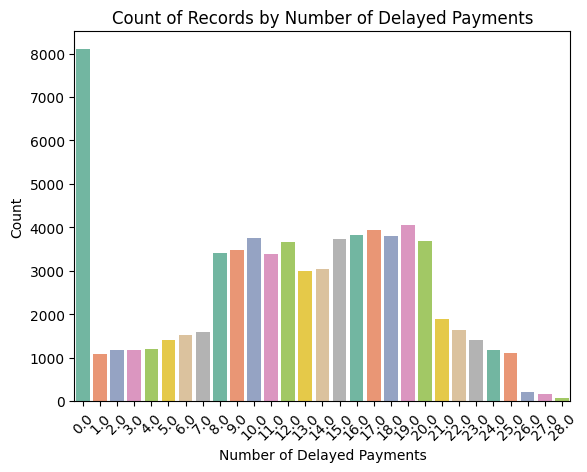

In [383]:
sb.barplot(x=Num_of_Delayed_Payment_filter.index, y=Num_of_Delayed_Payment_filter['count'], palette='Set2')
plt.title('Count of Records by Number of Delayed Payments')
plt.xlabel('Number of Delayed Payments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Num_Credit_Inquiries

In [384]:
print(Ctrain['Num_Credit_Inquiries'].nunique())
print(Ctrain['Num_Credit_Inquiries'].unique())
print(Ctrain['Num_Credit_Inquiries'].value_counts())
print(Ctrain['Num_Credit_Inquiries'].describe())

977
[   4    2    3    0    5    9    8    7    6    1   10   11   12 1044
   17 1936   13  568 1618  525 1251   14   16   15   76  285  119 1241
 1265 2473 2271 1085 1194 2006 2238  996   89  829  821 1760   46 1332
 1673  546   33  602 1122 2134 1151  103  168 1386 1985  794 1189  977
 2158 1279 1683  304  486   86 1347 2161 1529 1615 2187  206   57  197
 1864  458 1114  321 1992 2572 1479  205 1890 2081  946 1393 1672 1244
 1015  574  364 1498 1562  203 2297   34 2043 2128 1425  536 2056 1078
 1247 2131  221 1903 2328 1826 2548  391  301 2580 2245 1173  589  101
 2326 1278 2003 2372 1999 2308 1050  492 2167 1029 1390  171  982 1439
 1561 2568 2461 1805  336  737 1302 2357 2203  909 1319 1771  605  654
 2334  272  125 2211 2564  163 2542 1419 1437  309  693 1073  316 1132
 1166 1830  464 1804  207 1634  831 1068  556  112  363 1866 1599  371
 1453  919 2370 2150  540 1243 1216 1090  807 1370  881 2144 1675 2199
  594  725 1908 2055 1232  620 2212  951 1744 2402  635  190  757  295
 1

In [385]:
pd.set_option( "display.max_rows", 20)
Num_Credit_Inquiries_filter = Ctrain['Num_Credit_Inquiries'].value_counts().to_frame()
Num_Credit_Inquiries_filter

count
Num_Credit_Inquiries       
4                      8125
0                      6439
3                      6360
2                      5832
6                      5787
...                     ...
987                       1
1156                      1
975                       1
1361                      1
2448                      1

[977 rows x 1 columns]

In [386]:
pd.set_option( "display.max_rows", 20)
Num_Credit_Inquiries_filter.sort_index()
#above 17 

count
Num_Credit_Inquiries       
0                      6439
1                      5442
2                      5832
3                      6360
4                      8125
...                     ...
2586                      1
2589                      2
2592                      1
2594                      1
2597                      1

[977 rows x 1 columns]

In [387]:
Ctrain.loc[Ctrain['Num_Credit_Inquiries'] > 17, 'Num_Credit_Inquiries'] = np.nan

In [388]:
pd.set_option( "display.max_rows", 20)
Num_Credit_Inquiries_filter = Ctrain['Num_Credit_Inquiries'].value_counts().to_frame()
Num_Credit_Inquiries_filter

count
Num_Credit_Inquiries       
4.0                    8125
0.0                    6439
3.0                    6360
2.0                    5832
6.0                    5787
7.0                    5729
8.0                    5563
1.0                    5442
5.0                    4089
9.0                    3757
11.0                   3660
10.0                   3532
12.0                   3281
13.0                   1041
14.0                    735
15.0                    567
16.0                    331
17.0                    199

In [389]:
Num_Credit_Inquiries_filter.sort_index()

count
Num_Credit_Inquiries       
0.0                    6439
1.0                    5442
2.0                    5832
3.0                    6360
4.0                    8125
5.0                    4089
6.0                    5787
7.0                    5729
8.0                    5563
9.0                    3757
10.0                   3532
11.0                   3660
12.0                   3281
13.0                   1041
14.0                    735
15.0                    567
16.0                    331
17.0                    199

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2398839694.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x='Num_Credit_Inquiries', data=Ctrain, bins=42 ,palette='Set2', kde=True)


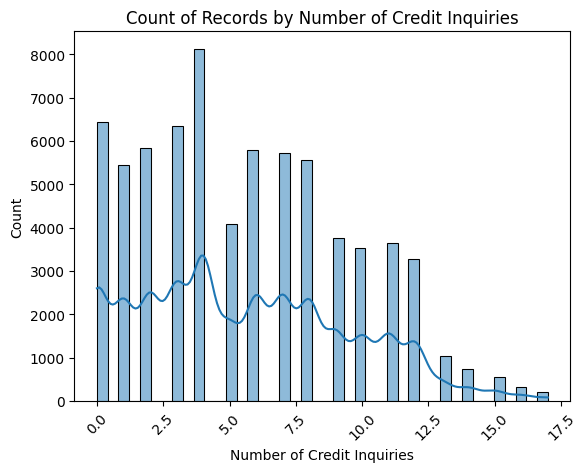

In [390]:
sb.histplot(x='Num_Credit_Inquiries', data=Ctrain, bins=42 ,palette='Set2', kde=True)
plt.title('Count of Records by Number of Credit Inquiries')
plt.xlabel('Number of Credit Inquiries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\154850740.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Num_Credit_Inquiries_filter.index, y=Num_Credit_Inquiries_filter['count'], palette='Set2')


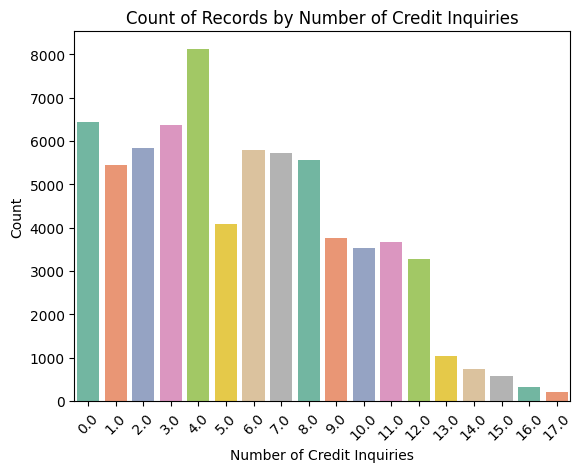

In [391]:
sb.barplot(x=Num_Credit_Inquiries_filter.index, y=Num_Credit_Inquiries_filter['count'], palette='Set2')
plt.title('Count of Records by Number of Credit Inquiries')
plt.xlabel('Number of Credit Inquiries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Credit_Mix

In [392]:
print(Ctrain['Credit_Mix'].nunique())
print(Ctrain['Credit_Mix'].unique())
print(Ctrain['Credit_Mix'].value_counts())
print(Ctrain['Credit_Mix'].describe())
#similar to the Type_of_Loan, this is a categorical variable that can be separated into different columns



4
['_' 'Good' 'Standard' 'Bad']
Credit_Mix
Standard    27395
Good        16148
_           14532
Bad         13583
Name: count, dtype: int64
count        71658
unique           4
top       Standard
freq         27395
Name: Credit_Mix, dtype: object


In [393]:
Credit_Mix_df = Ctrain.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: ','.join(x.dropna())).str.get_dummies(sep=',')
Credit_Mix_df
#Now I can see the different types of Credit Mix separately


Bad  Good  Standard  _
Customer_ID                        
CUS_0x1000     1     0         0  0
CUS_0x1009     0     0         1  1
CUS_0x100b     0     1         0  1
CUS_0x1011     0     0         1  0
CUS_0x1013     0     1         0  1
...          ...   ...       ... ..
CUS_0xfea      0     1         0  1
CUS_0xff4      0     0         1  1
CUS_0xff6      0     1         0  1
CUS_0xffc      0     0         0  1
CUS_0xffd      0     0         1  1

[11266 rows x 4 columns]

## Outstanding_Debt

In [394]:
print(Ctrain['Outstanding_Debt'].nunique())
print(Ctrain['Outstanding_Debt'].unique())
print(Ctrain['Outstanding_Debt'].value_counts())
print(Ctrain['Outstanding_Debt'].describe())


11025
[ 809.98  605.03 1303.01 ...  620.64 3571.7   502.38]
Outstanding_Debt
0.00       719
1360.45     19
1151.70     18
1109.03     17
768.69      16
          ... 
3360.92      1
969.94       1
380.52       1
1340.31      1
209.02       1
Name: count, Length: 11025, dtype: int64
count    71658.000000
mean      1412.145411
std       1161.810518
min          0.000000
25%        549.950000
50%       1151.700000
75%       1934.420000
max       4998.070000
Name: Outstanding_Debt, dtype: float64


In [395]:
pd.set_option( "display.max_rows", 20)
Outstanding_Debt_filter = Ctrain['Outstanding_Debt'].value_counts().to_frame()
Outstanding_Debt_filter

count
Outstanding_Debt       
0.00                719
1360.45              19
1151.70              18
1109.03              17
768.69               16
...                 ...
3360.92               1
969.94                1
380.52                1
1340.31               1
209.02                1

[11025 rows x 1 columns]

In [396]:
pd.set_option( "display.max_rows", 20)
Outstanding_Debt_filter.sort_index()

count
Outstanding_Debt       
0.00                719
0.34                  7
0.54                  7
0.56                  5
0.77                  7
...                 ...
4990.91               8
4992.25               7
4997.05               6
4997.10               5
4998.07               7

[11025 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\868840535.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x='Outstanding_Debt', data=Ctrain, bins=42 ,palette='Set2', kde=True)


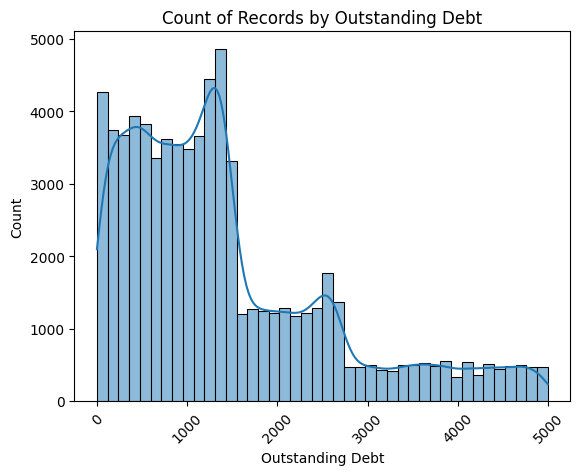

In [397]:
sb.histplot(x='Outstanding_Debt', data=Ctrain, bins=42 ,palette='Set2', kde=True)
plt.title('Count of Records by Outstanding Debt')
plt.xlabel('Outstanding Debt')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Credit_Utilization_Ratio

In [398]:
print(Ctrain['Credit_Utilization_Ratio'].nunique())
print(Ctrain['Credit_Utilization_Ratio'].unique())
print(Ctrain['Credit_Utilization_Ratio'].value_counts())
print(Ctrain['Credit_Utilization_Ratio'].describe())



71658
[26.82261962 31.37786187 24.79734691 ... 41.25552226 33.63820798
 34.19246265]
Credit_Utilization_Ratio
34.192463    1
26.822620    1
31.377862    1
24.797347    1
27.262259    1
            ..
39.783993    1
39.501648    1
41.702573    1
32.933856    1
31.131702    1
Name: count, Length: 71658, dtype: int64
count    71658.000000
mean        32.285606
std          5.113563
min         20.000000
25%         28.055806
50%         32.300789
75%         36.512315
max         49.564519
Name: Credit_Utilization_Ratio, dtype: float64


In [399]:
pd.set_option( "display.max_rows", 20)
Credit_Utilization_Ratio_filter = Ctrain['Credit_Utilization_Ratio'].value_counts().to_frame()
Credit_Utilization_Ratio_filter

count
Credit_Utilization_Ratio       
34.192463                     1
26.822620                     1
31.377862                     1
24.797347                     1
27.262259                     1
...                         ...
39.783993                     1
39.501648                     1
41.702573                     1
32.933856                     1
31.131702                     1

[71658 rows x 1 columns]

In [400]:
pd.set_option( "display.max_rows", 20)
Credit_Utilization_Ratio_filter.sort_index()

count
Credit_Utilization_Ratio       
20.000000                     1
20.100770                     1
20.244130                     1
20.257073                     1
20.719745                     1
...                         ...
48.199824                     1
48.247003                     1
48.337291                     1
49.522324                     1
49.564519                     1

[71658 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\277022160.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x='Credit_Utilization_Ratio', data=Credit_Utilization_Ratio_filter, bins=42 ,palette='Set2', kde=True)


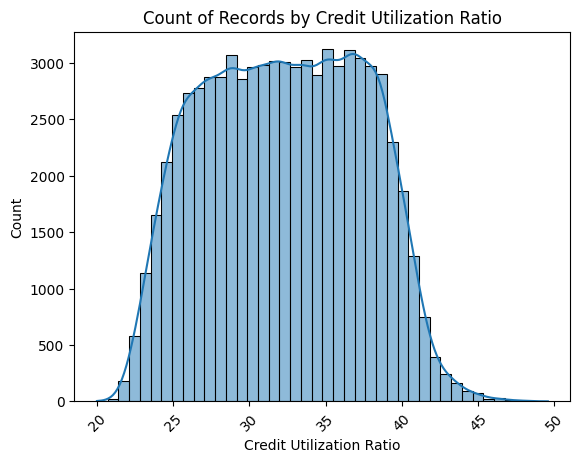

In [401]:
sb.histplot(x='Credit_Utilization_Ratio', data=Credit_Utilization_Ratio_filter, bins=42 ,palette='Set2', kde=True)
plt.title('Count of Records by Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [402]:
pd.set_option( "display.max_rows", 20)
Credit_Utilization_Ratio_filter = Ctrain['Credit_Utilization_Ratio'].value_counts().to_frame()
Credit_Utilization_Ratio_filter

count
Credit_Utilization_Ratio       
34.192463                     1
26.822620                     1
31.377862                     1
24.797347                     1
27.262259                     1
...                         ...
39.783993                     1
39.501648                     1
41.702573                     1
32.933856                     1
31.131702                     1

[71658 rows x 1 columns]

In [403]:
Credit_Utilization_Ratio_filter.sort_index()

count
Credit_Utilization_Ratio       
20.000000                     1
20.100770                     1
20.244130                     1
20.257073                     1
20.719745                     1
...                         ...
48.199824                     1
48.247003                     1
48.337291                     1
49.522324                     1
49.564519                     1

[71658 rows x 1 columns]

In [404]:
Customer_Credit = Ctrain[['Customer_ID','Month' ,'Credit_Utilization_Ratio']]
Customer_Credit

Customer_ID    Month  Credit_Utilization_Ratio
0       CUS_0xd40  January                 26.822620
3       CUS_0xd40    April                 31.377862
4       CUS_0xd40      May                 24.797347
5       CUS_0xd40     June                 27.262259
6       CUS_0xd40     July                 22.537593
...           ...      ...                       ...
99995  CUS_0x942c    April                 34.663572
99996  CUS_0x942c      May                 40.565631
99997  CUS_0x942c     June                 41.255522
99998  CUS_0x942c     July                 33.638208
99999  CUS_0x942c   August                 34.192463

[71658 rows x 3 columns]

In [405]:
Customer_Credit = Customer_Credit.groupby('Customer_ID')['Credit_Utilization_Ratio'].mean().reset_index()
Customer_Credit



Customer_ID  Credit_Utilization_Ratio
0      CUS_0x1000                 36.103001
1      CUS_0x1009                 30.738558
2      CUS_0x100b                 34.841449
3      CUS_0x1011                 27.613969
4      CUS_0x1013                 30.971679
...           ...                       ...
11261   CUS_0xfea                 33.505051
11262   CUS_0xff4                 33.010668
11263   CUS_0xff6                 32.933032
11264   CUS_0xffc                 28.961633
11265   CUS_0xffd                 31.737341

[11266 rows x 2 columns]

## Credit_History_Age

In [406]:

print(Ctrain['Credit_History_Age'].nunique())
print(Ctrain['Credit_History_Age'].unique())
print(Ctrain['Credit_History_Age'].value_counts())
print(Ctrain['Credit_History_Age'].describe())


404
['22 Years and 1 Months' '22 Years and 4 Months' '22 Years and 5 Months'
 '22 Years and 6 Months' '22 Years and 7 Months' nan
 '26 Years and 8 Months' '26 Years and 10 Months' '26 Years and 11 Months'
 '27 Years and 0 Months' '27 Years and 1 Months' '27 Years and 2 Months'
 '17 Years and 10 Months' '18 Years and 2 Months' '18 Years and 3 Months'
 '18 Years and 4 Months' '17 Years and 3 Months' '17 Years and 4 Months'
 '17 Years and 5 Months' '17 Years and 6 Months' '17 Years and 7 Months'
 '17 Years and 9 Months' '30 Years and 8 Months' '30 Years and 9 Months'
 '30 Years and 11 Months' '31 Years and 0 Months' '31 Years and 1 Months'
 '31 Years and 2 Months' '32 Years and 2 Months' '32 Years and 3 Months'
 '32 Years and 5 Months' '32 Years and 6 Months' '14 Years and 8 Months'
 '15 Years and 1 Months' '15 Years and 2 Months' '21 Years and 5 Months'
 '21 Years and 6 Months' '21 Years and 7 Months' '21 Years and 8 Months'
 '21 Years and 9 Months' '21 Years and 10 Months' '26 Years and

In [407]:
Ctrain['credit history age by year'] = Ctrain['Credit_History_Age'].str[:2]
Ctrain['credit history age by year']

0        22
3        22
4        22
5        22
6        22
         ..
99995    31
99996    31
99997    31
99998    31
99999    31
Name: credit history age by year, Length: 71658, dtype: object

In [408]:
Ctrain = Ctrain[Ctrain['credit history age by year'].notna()]

# Verify the changes
print(Ctrain['credit history age by year'])

0        22
3        22
4        22
5        22
6        22
         ..
99995    31
99996    31
99997    31
99998    31
99999    31
Name: credit history age by year, Length: 65163, dtype: object


## Payment_of_Min_Amount

In [409]:
Ctrain['Payment_of_Min_Amount'].astype('object')

0        No
3        No
4        No
5        No
6        No
         ..
99995    No
99996    No
99997    No
99998    No
99999    No
Name: Payment_of_Min_Amount, Length: 65163, dtype: object

In [410]:

print(Ctrain['Payment_of_Min_Amount'].nunique())
print(Ctrain['Payment_of_Min_Amount'].unique())
print(Ctrain['Payment_of_Min_Amount'].value_counts())
print(Ctrain['Payment_of_Min_Amount'].describe())


3
['No' 'NM' 'Yes']
Payment_of_Min_Amount
Yes    34602
No     22722
NM      7839
Name: count, dtype: int64
count     65163
unique        3
top         Yes
freq      34602
Name: Payment_of_Min_Amount, dtype: object


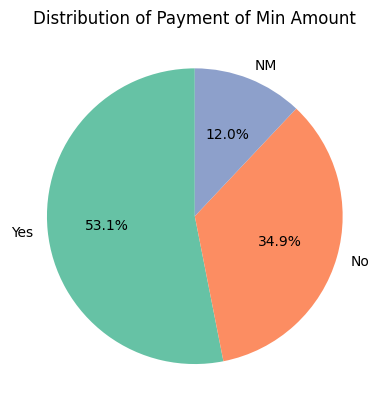

In [411]:
payment_counts = Ctrain['Payment_of_Min_Amount'].value_counts()

plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors)
plt.title('Distribution of Payment of Min Amount')
plt.show()

## Total_EMI_per_month

In [412]:

print(Ctrain['Total_EMI_per_month'].nunique())
print(Ctrain['Total_EMI_per_month'].unique())
print(Ctrain['Total_EMI_per_month'].value_counts())
print(Ctrain['Total_EMI_per_month'].describe())


12615
[4.95749492e+01 1.88162146e+01 2.46992319e+02 ... 1.21120000e+04
 3.51040226e+01 5.86380000e+04]
Total_EMI_per_month
0.000000        6868
37.993229          8
103.037560         8
70.065018          8
24.949591          8
                ... 
34782.000000       1
1468.000000        1
21494.000000       1
75011.000000       1
20563.000000       1
Name: count, Length: 12615, dtype: int64
count    65163.000000
mean      1388.001110
std       8248.056344
min          0.000000
25%         30.359208
50%         68.934383
75%        160.473304
max      82331.000000
Name: Total_EMI_per_month, dtype: float64


In [413]:
# Group by 'Customer_ID' and calculate the mean of 'Total_EMI_per_month'
Total_EMI_per_month_filter = Ctrain.groupby('Customer_ID')['Total_EMI_per_month'].mean().to_frame()
Total_EMI_per_month_filter

Total_EMI_per_month
Customer_ID                     
CUS_0x1000             42.941090
CUS_0x1009            108.366467
CUS_0x100b              0.000000
CUS_0x1011            123.434939
CUS_0x1013           8279.681736
...                          ...
CUS_0xfea              40.482424
CUS_0xff4             101.328637
CUS_0xff6             126.638453
CUS_0xffc             272.809169
CUS_0xffd             182.976649

[11265 rows x 1 columns]

In [418]:
pd.set_option( "display.max_rows", 20)
Total_EMI_per_month_filter.sort_index()
#this will be usufull for the score - I will keep it as is

Total_EMI_per_month
Customer_ID                     
CUS_0x1000             42.941090
CUS_0x1009            108.366467
CUS_0x100b              0.000000
CUS_0x1011            123.434939
CUS_0x1013           8279.681736
...                          ...
CUS_0xfea              40.482424
CUS_0xff4             101.328637
CUS_0xff6             126.638453
CUS_0xffc             272.809169
CUS_0xffd             182.976649

[11265 rows x 1 columns]

## Amount_invested_monthly

In [419]:

print(Ctrain['Amount_invested_monthly'].nunique())
print(Ctrain['Amount_invested_monthly'].unique())
print(Ctrain['Amount_invested_monthly'].value_counts())
print(Ctrain['Amount_invested_monthly'].describe())



59397
[ 80.41529544 199.45807439  41.42015309 ...  24.02847745 251.6725822
 167.16386516]
Amount_invested_monthly
0.000000      5767
62.430172        1
178.344067       1
91.321664        1
276.725394       1
              ... 
60.971333        1
54.185950        1
24.028477        1
251.672582       1
41.420153        1
Name: count, Length: 59397, dtype: int64
count    65163.000000
mean       178.151730
std        198.037216
min          0.000000
25%         58.301846
50%        116.241334
75%        219.189259
max       1977.326102
Name: Amount_invested_monthly, dtype: float64


In [420]:
Amount_invested_monthly_filter = Ctrain['Amount_invested_monthly'].to_frame()
Amount_invested_monthly_filter

Amount_invested_monthly
0                    80.415295
3                   199.458074
4                    41.420153
5                    62.430172
6                   178.344067
...                        ...
99995                60.971333
99996                54.185950
99997                24.028477
99998               251.672582
99999               167.163865

[65163 rows x 1 columns]

In [421]:
Amount_invested_monthly_filter = Ctrain.groupby('Customer_ID')['Amount_invested_monthly'].mean().to_frame()
Amount_invested_monthly_filter

Amount_invested_monthly
Customer_ID                         
CUS_0x1000                152.904612
CUS_0x1009                117.995533
CUS_0x100b                338.670730
CUS_0x1011                338.605474
CUS_0x1013                323.814764
...                              ...
CUS_0xfea                 304.740674
CUS_0xff4                 143.358590
CUS_0xff6                 566.213448
CUS_0xffc                 152.923588
CUS_0xffd                 150.721190

[11265 rows x 1 columns]

## Payment_Behaviour

In [422]:

print(Ctrain['Payment_Behaviour'].nunique())
print(Ctrain['Payment_Behaviour'].unique())
print(Ctrain['Payment_Behaviour'].value_counts())
print(Ctrain['Payment_Behaviour'].describe())


7
['High_spent_Small_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments' 'Low_spent_Medium_value_payments'
 'Low_spent_Large_value_payments']
Payment_Behaviour
Low_spent_Small_value_payments      16678
High_spent_Medium_value_payments    11454
Low_spent_Medium_value_payments      9013
High_spent_Large_value_payments      8884
High_spent_Small_value_payments      7402
Low_spent_Large_value_payments       6781
!@9#%8                               4951
Name: count, dtype: int64
count                              65163
unique                                 7
top       Low_spent_Small_value_payments
freq                               16678
Name: Payment_Behaviour, dtype: object


In [423]:
# Count the occurrences of each unique value in the 'Payment_Behaviour' column
Payment_Behaviour_filter = Ctrain['Payment_Behaviour'].value_counts().to_frame(name='count')
Payment_Behaviour_filter

count
Payment_Behaviour                      
Low_spent_Small_value_payments    16678
High_spent_Medium_value_payments  11454
Low_spent_Medium_value_payments    9013
High_spent_Large_value_payments    8884
High_spent_Small_value_payments    7402
Low_spent_Large_value_payments     6781
!@9#%8                             4951

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2066127555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Payment_Behaviour_filter.index, y=Payment_Behaviour_filter['count'], palette='Set2')


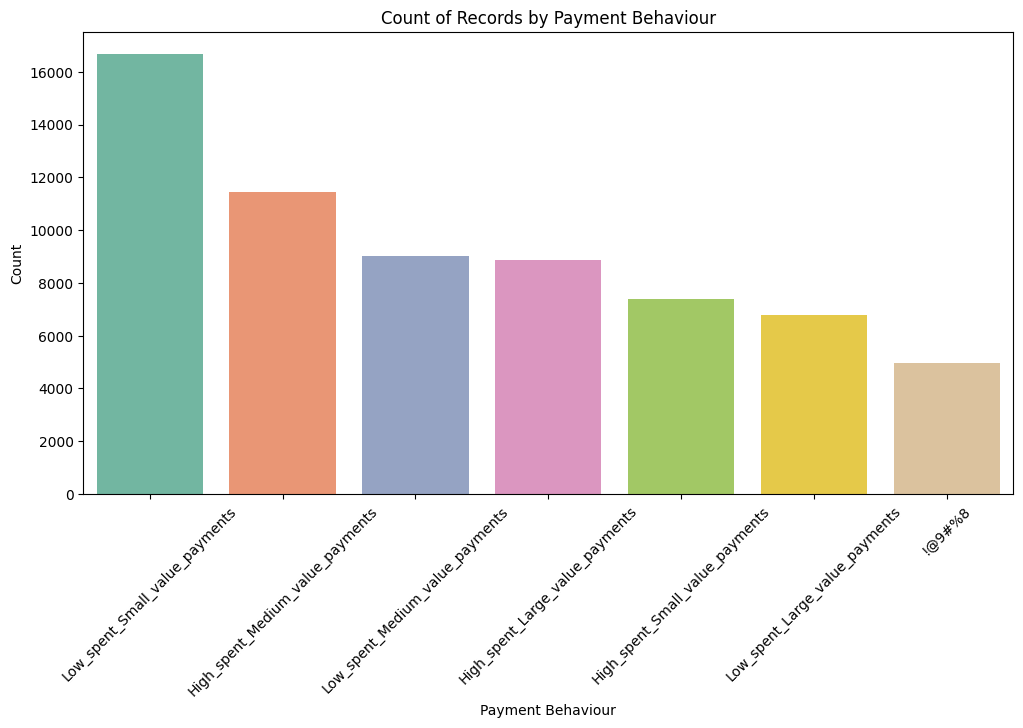

In [424]:
plt.figure(figsize=(12, 6))
sb.barplot(x=Payment_Behaviour_filter.index, y=Payment_Behaviour_filter['count'], palette='Set2')
plt.title('Count of Records by Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\760159119.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Payment_Behaviour_filter.index, y=Payment_Behaviour_filter['count'], palette='Set2')


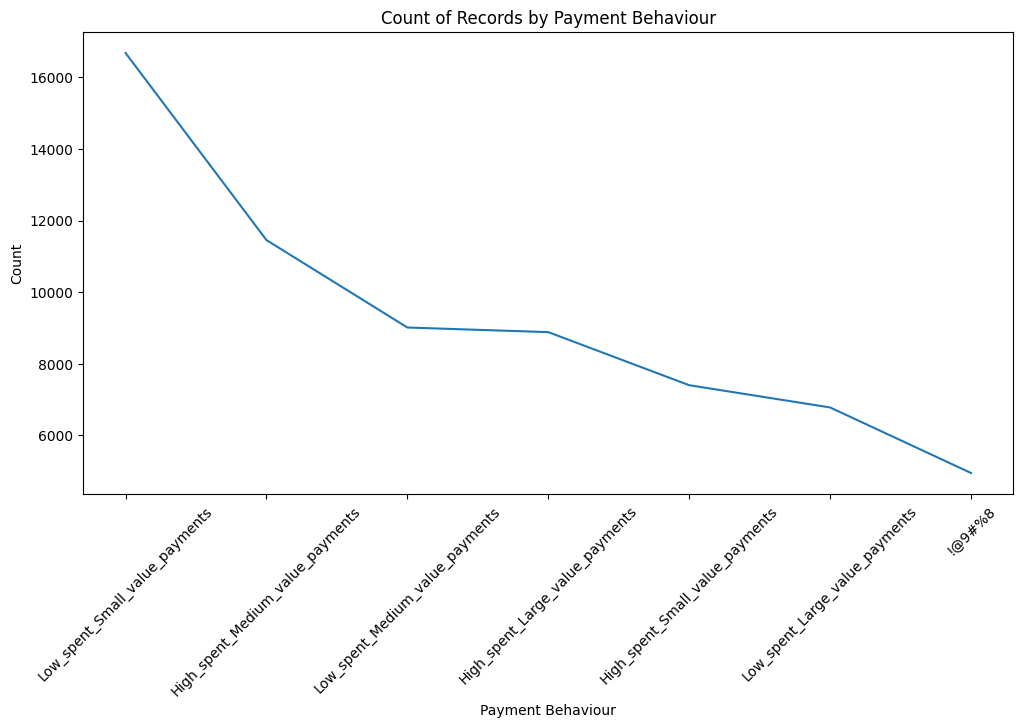

In [425]:

plt.figure(figsize=(12, 6))
sb.lineplot(x=Payment_Behaviour_filter.index, y=Payment_Behaviour_filter['count'], palette='Set2')
plt.title('Count of Records by Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [426]:
#The vlaue of !@9#%8 is the smallest among the values, I will drop it from the dataset
Ctrain = Ctrain[Ctrain['Payment_Behaviour'] != '!@9#%8']
Payment_Behaviour_filter = Ctrain['Payment_Behaviour'].value_counts().to_frame(name='count')
Payment_Behaviour_filter

count
Payment_Behaviour                      
Low_spent_Small_value_payments    16678
High_spent_Medium_value_payments  11454
Low_spent_Medium_value_payments    9013
High_spent_Large_value_payments    8884
High_spent_Small_value_payments    7402
Low_spent_Large_value_payments     6781

## Monthly_Balance

In [427]:
Monthly_Balance_df = Ctrain.groupby('Customer_ID')['Monthly_Balance'].mean().to_frame()
Monthly_Balance_df

Monthly_Balance
Customer_ID                 
CUS_0x1000        341.437131
CUS_0x1009        448.677000
CUS_0x100b        812.354858
CUS_0x1011        253.671939
CUS_0x1013        498.331325
...                      ...
CUS_0xfea         310.346985
CUS_0xff4         268.564939
CUS_0xff6         446.735753
CUS_0xffc         346.076993
CUS_0xffd         309.289160

[11264 rows x 1 columns]

In [428]:
#The last colunm is Credit_Score - I will not touch it because I intend to create a diffrent and
# more detaild vrsion of it.

# Crossing the Data

I intend to use Num_of_Delayed_Payment and Delay_from_due_date as indicators for failure and inability to pay. I will cross them with different columns to draw conclusions regarding the potential score of each customer.   

I will now begin crossing the different data to make conclusions:


## Age

In [429]:
#First with age:
Delay_age_df = Ctrain.groupby('Customer_ID')[['Age', 'Num_of_Delayed_Payment']].mean()
Delay_age_df

Age  Num_of_Delayed_Payment
Customer_ID                                   
CUS_0x1000   18.000000               24.666667
CUS_0x1009   25.800000               17.800000
CUS_0x100b   18.571429                7.142857
CUS_0x1011   44.000000                9.666667
CUS_0x1013   43.600000                6.800000
...                ...                     ...
CUS_0xfea    33.000000                1.666667
CUS_0xff4    36.833333               10.166667
CUS_0xff6    18.600000                2.600000
CUS_0xffc    18.000000               19.000000
CUS_0xffd    29.200000               11.200000

[11264 rows x 2 columns]

In [430]:
Delay_age_df.info()

Delay_age_df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 11264 entries, CUS_0x1000 to CUS_0xffd
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     11264 non-null  float64
 1   Num_of_Delayed_Payment  11264 non-null  float64
dtypes: float64(2)
memory usage: 264.0+ KB


Age  Num_of_Delayed_Payment
count  11264.000000            11264.000000
mean      34.204945               12.159732
std       10.068265                5.838732
min       18.000000                0.000000
25%       25.833333                8.000000
50%       34.000000               12.000000
75%       42.000000               16.571429
max       56.000000               27.000000

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2083950220.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Delay_age_df['Age'], y=Delay_age_df['Num_of_Delayed_Payment'], palette='Set2')


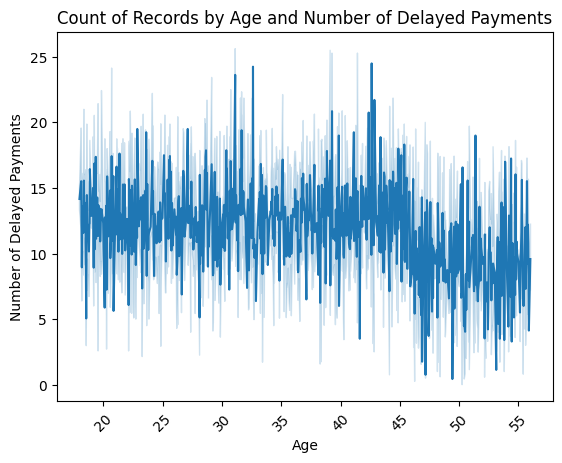

In [431]:
sb.lineplot(x=Delay_age_df['Age'], y=Delay_age_df['Num_of_Delayed_Payment'], palette='Set2')
plt.title('Count of Records by Age and Number of Delayed Payments')
plt.xlabel('Age')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

In [432]:
#I believe the plot looks like this because I added in the info from all 8 months per customer.
due_date_age = Ctrain.groupby('Customer_ID')[['Age', 'Delay_from_due_date']].mean()
due_date_age

Age  Delay_from_due_date
Customer_ID                                
CUS_0x1000   18.000000            60.333333
CUS_0x1009   25.800000             7.400000
CUS_0x100b   18.571429            13.428571
CUS_0x1011   44.000000            27.333333
CUS_0x1013   43.600000            12.000000
...                ...                  ...
CUS_0xfea    33.000000            11.333333
CUS_0xff4    36.833333            15.833333
CUS_0xff6    18.600000             1.000000
CUS_0xffc    18.000000            46.000000
CUS_0xffd    29.200000            23.800000

[11264 rows x 2 columns]

In [433]:
due_date_age = Ctrain.groupby('Age')[['Delay_from_due_date']].mean()
due_date_age

Delay_from_due_date
Age                     
18             24.145410
19             23.454401
20             21.853591
21             22.022841
22             21.910143
..                   ...
53             13.740291
54             13.867485
55             14.157834
56             14.405405
95             27.500000

[40 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3387595208.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x='Age', y='Delay_from_due_date', data=due_date_age, bins=42 ,palette='Set2', kde=True)


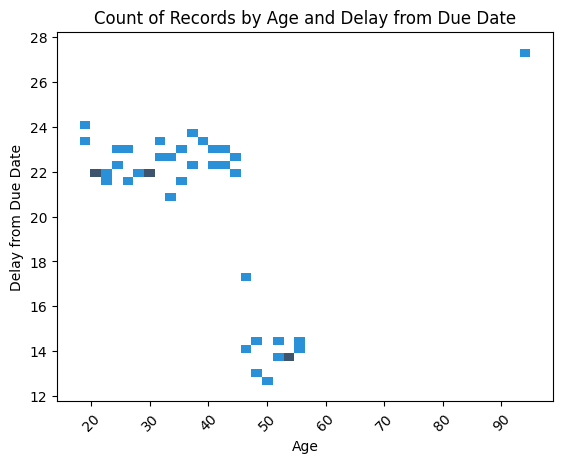

In [434]:
sb.histplot(x='Age', y='Delay_from_due_date', data=due_date_age, bins=42 ,palette='Set2', kde=True)
plt.title('Count of Records by Age and Delay from Due Date')
plt.xlabel('Age')
plt.ylabel('Delay from Due Date')
plt.xticks(rotation=45)
plt.show()


In [435]:
# I reset the index to make 'Age' a column
due_date_age_reset = due_date_age.reset_index()

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3637570522.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=due_date_age_reset['Age'], y=due_date_age_reset['Delay_from_due_date'], palette='Set2')


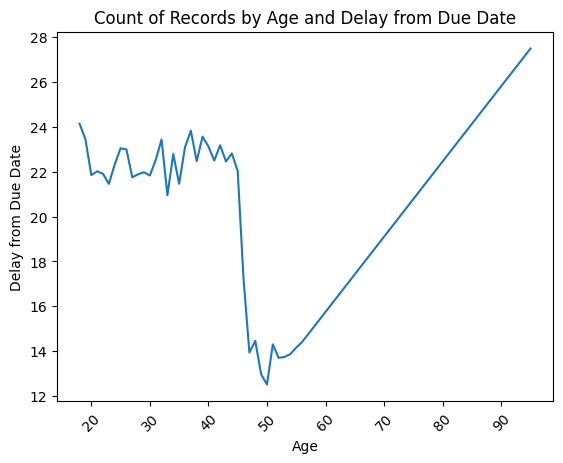

In [436]:
sb.lineplot(x=due_date_age_reset['Age'], y=due_date_age_reset['Delay_from_due_date'], palette='Set2')
plt.title('Count of Records by Age and Delay from Due Date')
plt.xlabel('Age')
plt.ylabel('Delay from Due Date')
plt.xticks(rotation=45)
plt.show()

In [437]:
due_date_age_reset

Age  Delay_from_due_date
0    18            24.145410
1    19            23.454401
2    20            21.853591
3    21            22.022841
4    22            21.910143
..  ...                  ...
35   53            13.740291
36   54            13.867485
37   55            14.157834
38   56            14.405405
39   95            27.500000

[40 rows x 2 columns]

In [439]:
Age_Num_df = Ctrain.groupby('Age')[['Num_of_Delayed_Payment']].mean()
Age_Num_df

Num_of_Delayed_Payment
Age                        
18                13.373999
19                12.777306
20                12.547514
21                12.347075
22                12.831312
..                      ...
53                 8.911408
54                 9.600000
55                 9.608295
56                 9.576577
95                19.500000

[40 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2946572482.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Age_Num_df.index, y=Age_Num_df['Num_of_Delayed_Payment'], palette='Set2')


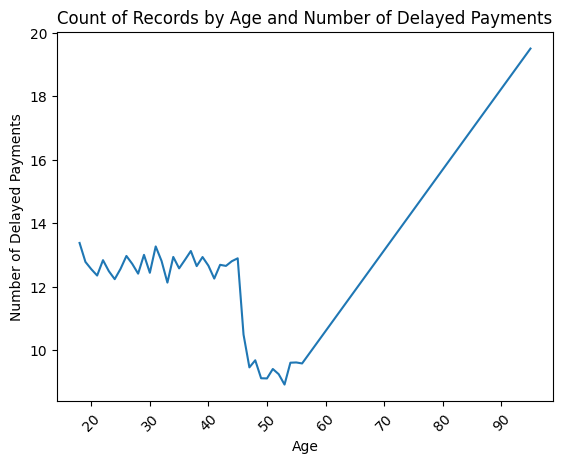

In [440]:
sb.lineplot(x=Age_Num_df.index, y=Age_Num_df['Num_of_Delayed_Payment'], palette='Set2')
plt.title('Count of Records by Age and Number of Delayed Payments')
plt.xlabel('Age')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

## Occupation

In [444]:
Occupation_Num = Ctrain.groupby('Occupation')['Num_of_Delayed_Payment'].mean()
Occupation_Num

Occupation
Accountant       12.178001
Architect        12.087209
Developer        12.445868
Doctor           12.262316
Engineer         12.499875
Entrepreneur     12.122811
Journalist       12.353888
Lawyer           12.142144
Manager          12.273266
Mechanic         12.239787
Media_Manager    11.939220
Musician         12.099495
Scientist        12.471414
Teacher          12.068295
Writer           12.493935
Name: Num_of_Delayed_Payment, dtype: float64

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1033155158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Occupation_Num.index, y=Occupation_Num.values, palette='Set2')


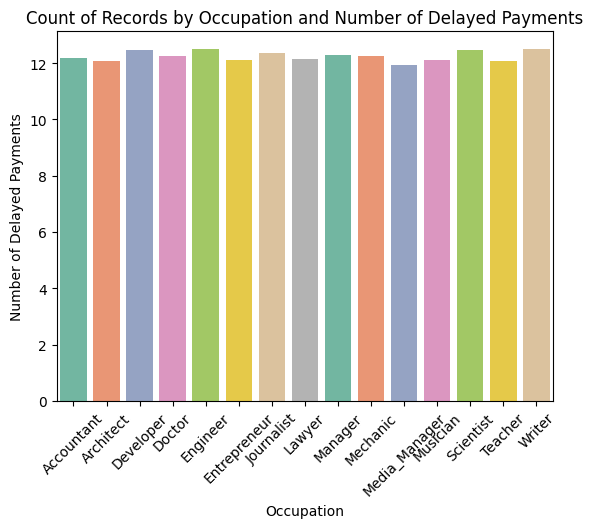

In [445]:
figsize=(12, 8)
sb.barplot(x=Occupation_Num.index, y=Occupation_Num.values, palette='Set2')
plt.title('Count of Records by Occupation and Number of Delayed Payments')
plt.xlabel('Occupation')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

In [446]:
Occupation_delay = Ctrain.groupby('Occupation')['Delay_from_due_date'].mean()
Occupation_delay

Occupation
Accountant       21.073656
Architect        20.595688
Developer        21.537805
Doctor           21.043931
Engineer         22.362073
Entrepreneur     21.396198
Journalist       20.589648
Lawyer           21.245305
Manager          21.727765
Mechanic         21.363790
Media_Manager    21.207104
Musician         21.284091
Scientist        21.352883
Teacher          21.570289
Writer           21.593091
Name: Delay_from_due_date, dtype: float64

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\934281820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Occupation_delay.index, y=Occupation_delay.values, palette='Set2')


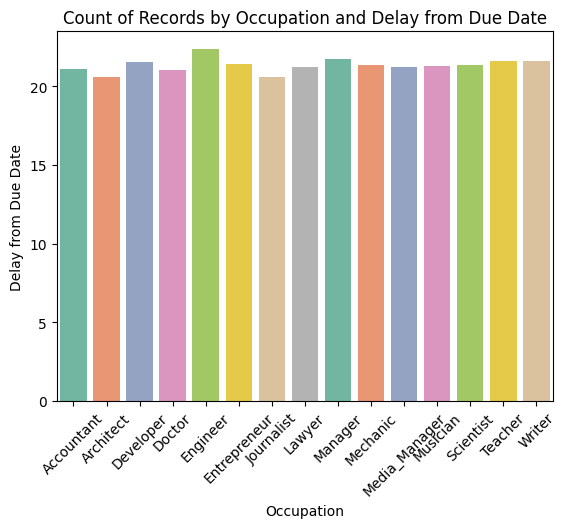

In [447]:
figsize=(12, 8)
sb.barplot(x=Occupation_delay.index, y=Occupation_delay.values, palette='Set2')
plt.title('Count of Records by Occupation and Delay from Due Date')
plt.xlabel('Occupation')
plt.ylabel('Delay from Due Date')
plt.xticks(rotation=45)
plt.show()

## Annual_Income

## Num_Bank_Accounts

In [448]:
NumBank_Num = Ctrain.groupby('Num_Bank_Accounts')['Num_of_Delayed_Payment'].mean()
NumBank_Num

Num_Bank_Accounts
1.0      5.458333
2.0      5.409059
3.0      9.953139
4.0     10.384120
5.0     10.037454
6.0     14.561763
7.0     14.626568
8.0     14.348860
9.0     17.428145
10.0    17.428041
Name: Num_of_Delayed_Payment, dtype: float64

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\721591154.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=NumBank_Num.index, y=NumBank_Num.values, palette='Set2')


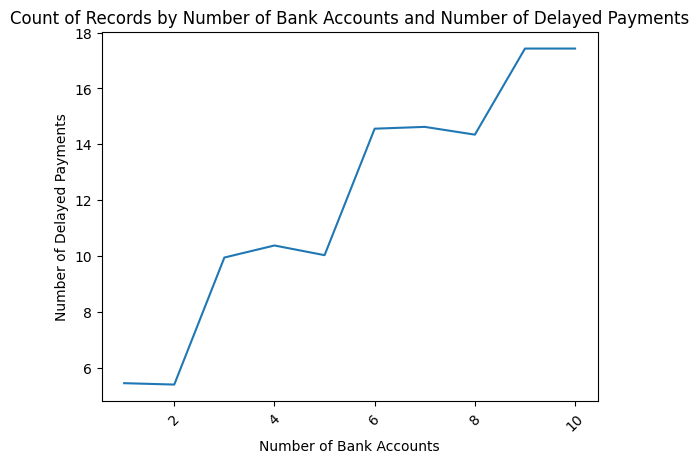

In [449]:
sb.lineplot(x=NumBank_Num.index, y=NumBank_Num.values, palette='Set2')
plt.title('Count of Records by Number of Bank Accounts and Number of Delayed Payments')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

In [450]:
NumBank_Delay = Ctrain.groupby('Num_Bank_Accounts')['Delay_from_due_date'].mean()
NumBank_Delay

Num_Bank_Accounts
1.0      9.088154
2.0      9.258188
3.0     14.128643
4.0     14.348144
5.0     15.077592
6.0     26.242755
7.0     26.328290
8.0     25.866359
9.0     38.458557
10.0    38.619003
Name: Delay_from_due_date, dtype: float64

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2369467882.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=NumBank_Delay.index, y=NumBank_Delay.values, palette='Set2')


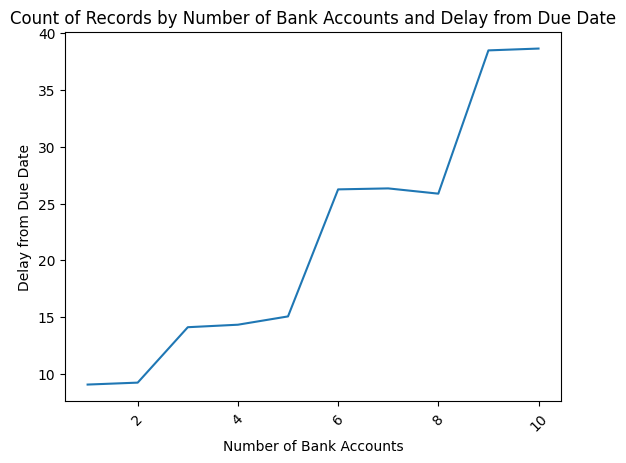

In [451]:
sb.lineplot(x=NumBank_Delay.index, y=NumBank_Delay.values, palette='Set2')
plt.title('Count of Records by Number of Bank Accounts and Delay from Due Date')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Delay from Due Date')
plt.xticks(rotation=45)
plt.show()


## Num_Credit_Card

In [452]:
CreditNum_Num = Ctrain.groupby('Num_Credit_Card')['Num_of_Delayed_Payment'].mean()
CreditNum_Num	

Num_Credit_Card
1.0      5.381533
2.0      5.871708
3.0     10.320446
4.0     10.434445
5.0     11.931034
6.0     12.646098
7.0     12.746202
8.0     17.036172
9.0     16.991642
10.0    16.659847
Name: Num_of_Delayed_Payment, dtype: float64

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2104409728.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=CreditNum_Num.index, y=CreditNum_Num.values, palette='Set2')


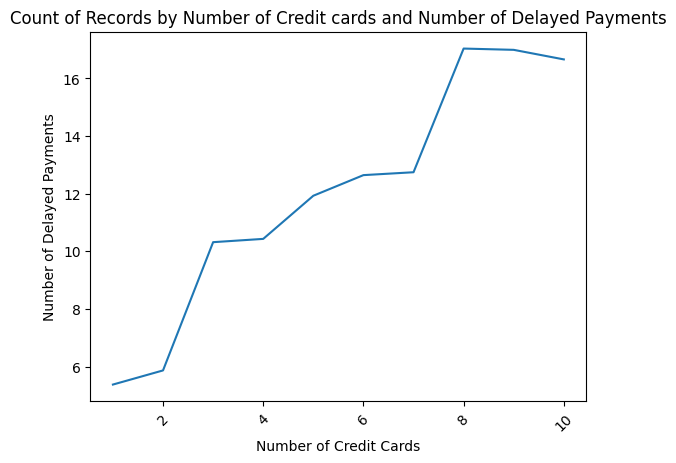

In [453]:
sb.lineplot(x=CreditNum_Num.index, y=CreditNum_Num.values, palette='Set2')
plt.title('Count of Records by Number of Credit cards and Number of Delayed Payments')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Num_of_Delayed_Payment'>

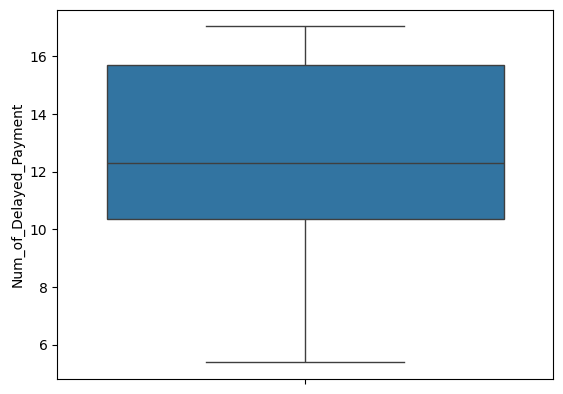

In [454]:
sb.boxplot(CreditNum_Num)

In [455]:
CreditNum_Days = Ctrain.groupby('Num_Credit_Card')['Delay_from_due_date'].mean()
CreditNum_Days

Num_Credit_Card
1.0      7.568815
2.0      8.123195
3.0     14.722057
4.0     14.919779
5.0     20.473271
6.0     21.733620
7.0     22.301261
8.0     36.506084
9.0     36.015625
10.0    37.761442
Name: Delay_from_due_date, dtype: float64

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3193980874.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=CreditNum_Days.index, y=CreditNum_Days.values, palette='Set2')


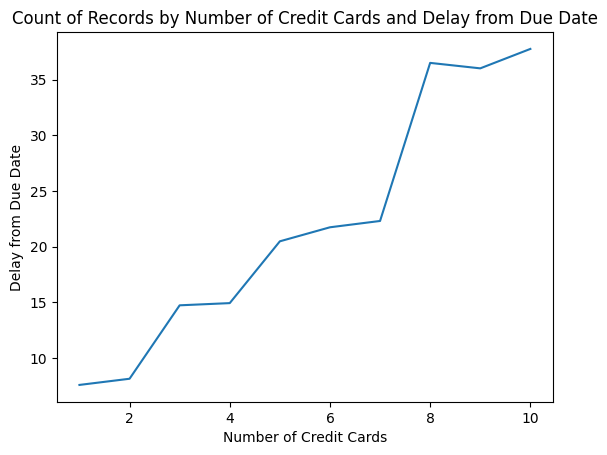

In [456]:
sb.lineplot(x=CreditNum_Days.index, y=CreditNum_Days.values, palette='Set2')
plt.title('Count of Records by Number of Credit Cards and Delay from Due Date')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Delay from Due Date')
plt.show()

Not much to learn from

<Axes: ylabel='Delay_from_due_date'>

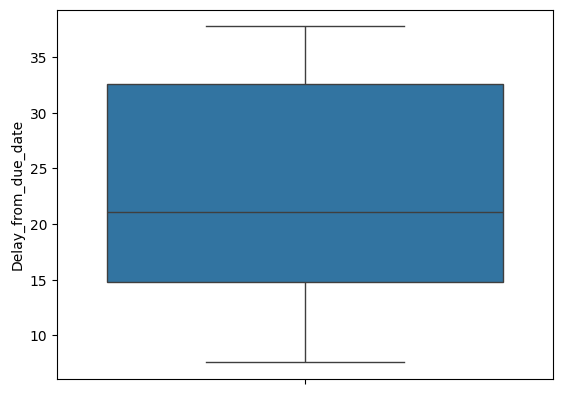

In [457]:
sb.boxplot(CreditNum_Days)

## Interest_Rate 

In [458]:
Ctrain['Interest_Rate'].value_counts()

Interest_Rate
5.0     2930
8.0     2930
6.0     2788
7.0     2721
12.0    2711
        ... 
25.0     932
26.0     906
34.0     896
31.0     860
33.0     842
Name: count, Length: 34, dtype: int64

In [459]:
Intrest_Num = Ctrain.groupby('Interest_Rate')['Num_of_Delayed_Payment'].mean()
Intrest_Num.sort_values

<bound method Series.sort_values of Interest_Rate
1.0      6.813438
2.0      6.786567
3.0      6.560976
4.0      7.186739
5.0      9.631399
          ...    
30.0    16.714008
31.0    16.255814
32.0    16.103514
33.0    16.296912
34.0    16.575893
Name: Num_of_Delayed_Payment, Length: 34, dtype: float64>

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1956812029.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Intrest_Num.index, y=Intrest_Num.values, palette='Set2')


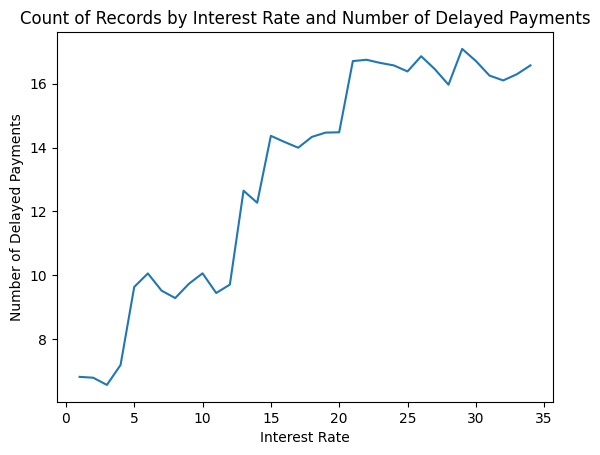

In [460]:
sb.lineplot(x=Intrest_Num.index, y=Intrest_Num.values, palette='Set2')
plt.title('Count of Records by Interest Rate and Number of Delayed Payments')
plt.xlabel('Interest Rate')
plt.ylabel('Number of Delayed Payments')
plt.show()

In [461]:
Intrest_Days = Ctrain.groupby('Interest_Rate')['Delay_from_due_date'].mean()
Intrest_Days.sort_values

<bound method Series.sort_values of Interest_Rate
1.0      9.826484
2.0     11.158955
3.0     10.872272
4.0     10.569012
5.0     14.183618
          ...    
30.0    35.627432
31.0    36.393023
32.0    35.299145
33.0    36.022565
34.0    36.222098
Name: Delay_from_due_date, Length: 34, dtype: float64>

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\878655316.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Intrest_Days.index, y=Intrest_Days.values, palette='Set2')


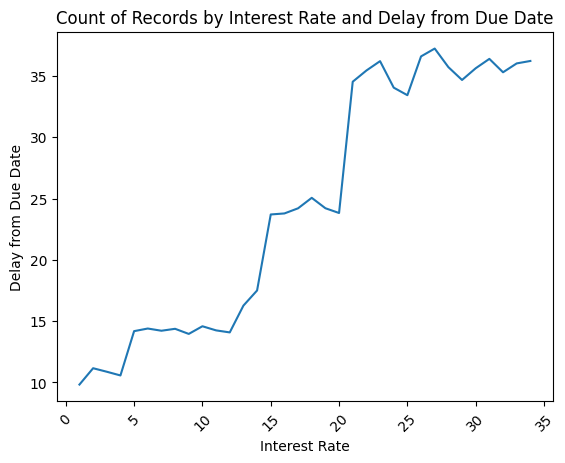

In [462]:
sb.lineplot(x=Intrest_Days.index, y=Intrest_Days.values, palette='Set2')
plt.title('Count of Records by Interest Rate and Delay from Due Date')
plt.title('Count of Records by Interest Rate and Delay from Due Date')
plt.xlabel('Interest Rate')
plt.ylabel('Delay from Due Date')
plt.xticks(rotation=45)
plt.show()

## Num_of_Loan

In [463]:
Loan_Num = Ctrain.groupby('Num_of_Loan')['Num_of_Delayed_Payment'].mean()
Loan_Num.sort_values

<bound method Series.sort_values of Num_of_Loan
0.0    10.427229
1.0     9.677181
2.0    10.855411
3.0    10.702826
4.0    11.014864
5.0    16.098722
6.0    15.667246
7.0    15.613657
8.0    17.827951
Name: Num_of_Delayed_Payment, dtype: float64>

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3008589574.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Loan_Num.index, y=Loan_Num.values, palette='Set2')


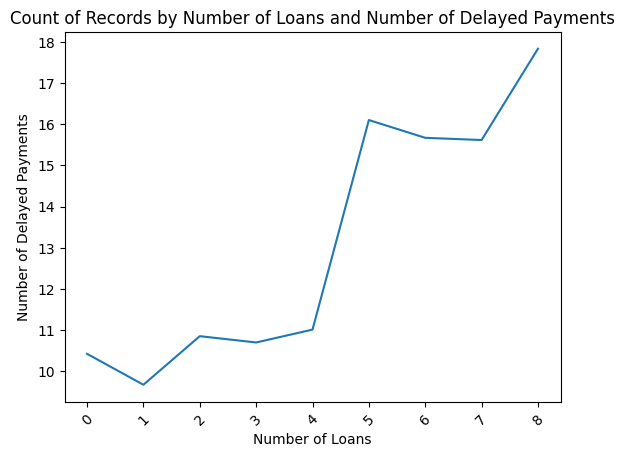

In [464]:
sb.lineplot(x=Loan_Num.index, y=Loan_Num.values, palette='Set2')
plt.title('Count of Records by Number of Loans and Number of Delayed Payments')
plt.xlabel('Number of Loans')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

In [465]:
Loan_Days = Ctrain.groupby('Num_of_Loan')['Delay_from_due_date'].mean()
Loan_Days.sort_values

<bound method Series.sort_values of Num_of_Loan
0.0    16.546289
1.0    13.944758
2.0    17.498054
3.0    17.412356
4.0    16.931940
5.0    30.678978
6.0    30.698761
7.0    31.612500
8.0    38.821069
Name: Delay_from_due_date, dtype: float64>

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3263876426.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Loan_Days.index, y=Loan_Days.values, palette='Set2')


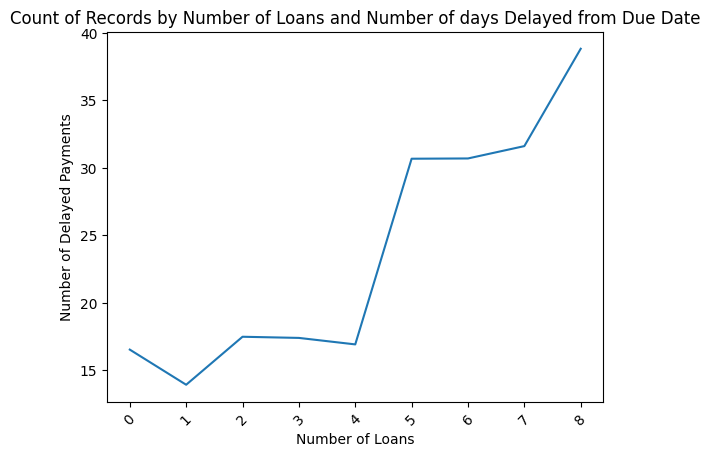

In [466]:
sb.lineplot(x=Loan_Days.index, y=Loan_Days.values, palette='Set2')
plt.title('Count of Records by Number of Loans and Number of days Delayed from Due Date')
plt.xlabel('Number of Loans')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

## Num_Credit_Inquiries

In [467]:
Inquiries_Num = Ctrain.groupby('Num_Credit_Inquiries')['Num_of_Delayed_Payment'].mean()
Inquiries_Num.sort_values

<bound method Series.sort_values of Num_Credit_Inquiries
0.0      9.973471
1.0      9.057093
2.0      9.013260
3.0      9.230542
4.0     10.239608
5.0     11.286792
6.0     13.290943
7.0     13.601831
8.0     14.225471
9.0     15.205640
10.0    16.460943
11.0    16.044567
12.0    16.172894
13.0    16.679201
14.0    16.894822
15.0    16.577551
16.0    17.186380
17.0    15.830303
Name: Num_of_Delayed_Payment, dtype: float64>

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1827801000.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Inquiries_Num.index, y=Inquiries_Num.values, palette='Set2')


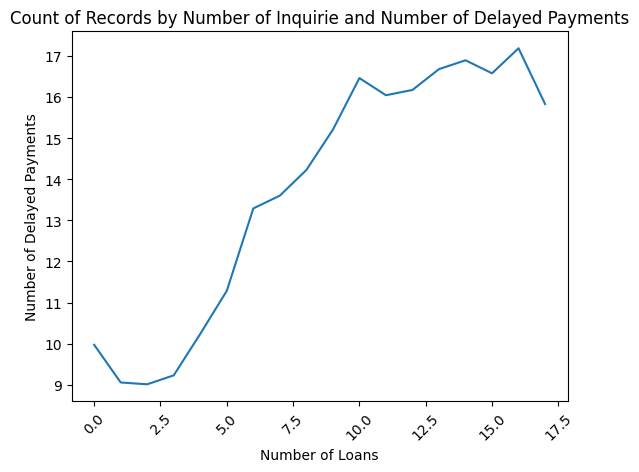

In [468]:
sb.lineplot(x=Inquiries_Num.index, y=Inquiries_Num.values, palette='Set2')
plt.title('Count of Records by Number of Inquirie and Number of Delayed Payments')
plt.xlabel('Number of Loans')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

In [469]:
Inquiries_Days = Ctrain.groupby('Num_Credit_Inquiries')['Delay_from_due_date'].mean()
Inquiries_Days.sort_values

<bound method Series.sort_values of Num_Credit_Inquiries
0.0     15.070376
1.0     13.227492
2.0     13.871685
3.0     13.520799
4.0     14.721604
5.0     15.786357
6.0     23.109793
7.0     23.917828
8.0     25.559671
9.0     29.502535
10.0    33.440404
11.0    34.373780
12.0    34.908425
13.0    34.672150
14.0    36.144013
15.0    35.087755
16.0    38.111111
17.0    36.278788
Name: Delay_from_due_date, dtype: float64>

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3632810689.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Inquiries_Days.index, y=Inquiries_Days.values, palette='Set2')


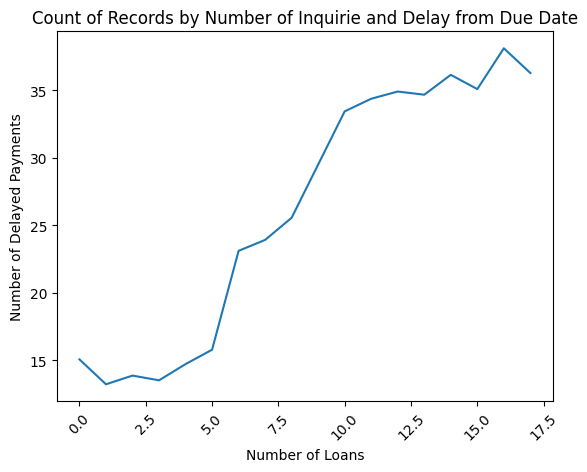

In [470]:
sb.lineplot(x=Inquiries_Days.index, y=Inquiries_Days.values, palette='Set2')
plt.title('Count of Records by Number of Inquirie and Delay from Due Date')
plt.xlabel('Number of Loans')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

## Outstanding_Debt

In [471]:
Outstanding_Num = Ctrain.groupby('Outstanding_Debt')['Num_of_Delayed_Payment'].mean()
Outstanding_Num.sort_values

<bound method Series.sort_values of Outstanding_Debt
0.00       11.948387
0.34       17.000000
0.54        2.000000
0.56        8.750000
0.77        2.857143
             ...    
4990.91    17.750000
4992.25    23.000000
4997.05    23.500000
4997.10    19.800000
4998.07    18.250000
Name: Num_of_Delayed_Payment, Length: 11023, dtype: float64>

In [472]:
Outstanding_Num.sort_index().to_frame()

Num_of_Delayed_Payment
Outstanding_Debt                        
0.00                           11.948387
0.34                           17.000000
0.54                            2.000000
0.56                            8.750000
0.77                            2.857143
...                                  ...
4990.91                        17.750000
4992.25                        23.000000
4997.05                        23.500000
4997.10                        19.800000
4998.07                        18.250000

[11023 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3897559996.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x=Outstanding_Num.index, y=Outstanding_Num.values, palette='Set2')


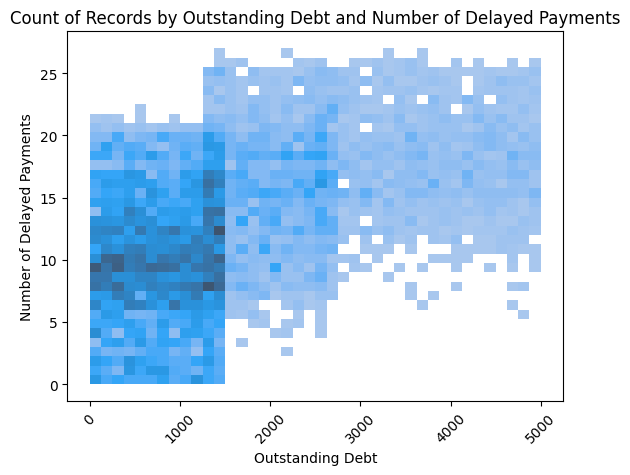

In [473]:
sb.histplot(x=Outstanding_Num.index, y=Outstanding_Num.values, palette='Set2')
plt.title('Count of Records by Outstanding Debt and Number of Delayed Payments')
plt.xlabel('Outstanding Debt')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

In [474]:
Outstanding_Days = Ctrain.groupby('Outstanding_Debt')['Delay_from_due_date'].mean()
Outstanding_Days.sort_values

<bound method Series.sort_values of Outstanding_Debt
0.00       20.280645
0.34       12.166667
0.54       23.857143
0.56       24.750000
0.77        4.714286
             ...    
4990.91    57.500000
4992.25    32.142857
4997.05    38.000000
4997.10    42.800000
4998.07    19.750000
Name: Delay_from_due_date, Length: 11023, dtype: float64>

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\685489474.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x=Outstanding_Days.index, y=Outstanding_Days.values, palette='Set2')


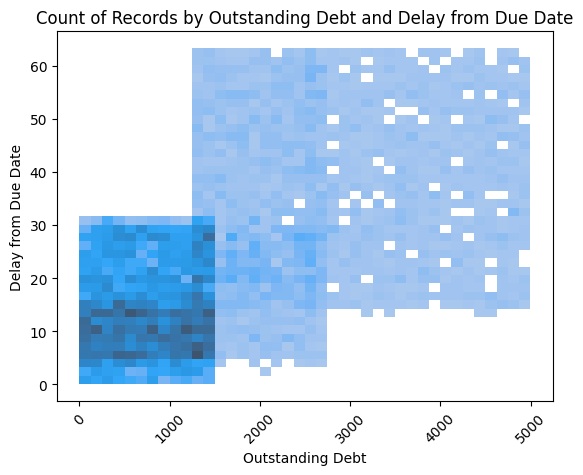

In [475]:
sb.histplot(x=Outstanding_Days.index, y=Outstanding_Days.values, palette='Set2')
plt.title('Count of Records by Outstanding Debt and Delay from Due Date')
plt.xlabel('Outstanding Debt')
plt.ylabel('Delay from Due Date')
plt.xticks(rotation=45)
plt.show()

## Credit_Utilization_Ratio

In [476]:
Utilization_Num = Ctrain.groupby('Credit_Utilization_Ratio')['Num_of_Delayed_Payment'].mean()
Utilization_Num.to_frame()

Num_of_Delayed_Payment
Credit_Utilization_Ratio                        
20.100770                                    0.0
20.244130                                   19.0
20.257073                                   16.0
20.719745                                   19.0
20.830946                                   13.0
...                                          ...
48.199824                                   12.0
48.247003                                    2.0
48.337291                                    0.0
49.522324                                    5.0
49.564519                                    9.0

[60212 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2424547457.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Utilization_Num.index, y=Utilization_Num.values, palette='Set2')


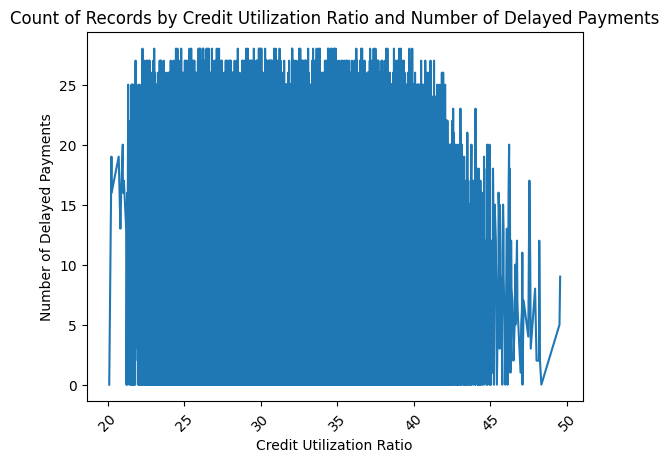

In [477]:
sb.lineplot(x=Utilization_Num.index, y=Utilization_Num.values, palette='Set2')
plt.title('Count of Records by Credit Utilization Ratio and Number of Delayed Payments')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

In [478]:
Utilization_Num2 = Ctrain.groupby(['Customer_ID', 'Num_of_Delayed_Payment'])['Credit_Utilization_Ratio'].mean().reset_index()
Utilization_Num2



Customer_ID  Num_of_Delayed_Payment  Credit_Utilization_Ratio
0      CUS_0x1000                    23.0                 40.082272
1      CUS_0x1000                    25.0                 38.149539
2      CUS_0x1000                    26.0                 30.077191
3      CUS_0x1009                    16.0                 28.451199
4      CUS_0x1009                    18.0                 33.534032
...           ...                     ...                       ...
31856   CUS_0xff6                     4.0                 41.389517
31857   CUS_0xffc                    19.0                 28.896769
31858   CUS_0xffd                     9.0                 29.506673
31859   CUS_0xffd                    11.0                 39.916655
31860   CUS_0xffd                    12.0                 29.754458

[31861 rows x 3 columns]

In [479]:
Utilization_Num2 = Ctrain.groupby(['Customer_ID'])[['Num_of_Delayed_Payment', 'Credit_Utilization_Ratio']].mean().reset_index()
Utilization_Num2



Customer_ID  Num_of_Delayed_Payment  Credit_Utilization_Ratio
0      CUS_0x1000               24.666667                 36.103001
1      CUS_0x1009               17.800000                 31.887022
2      CUS_0x100b                7.142857                 34.683420
3      CUS_0x1011                9.666667                 27.613969
4      CUS_0x1013                6.800000                 30.298596
...           ...                     ...                       ...
11259   CUS_0xfea                1.666667                 33.762666
11260   CUS_0xff4               10.166667                 32.748013
11261   CUS_0xff6                2.600000                 33.833184
11262   CUS_0xffc               19.000000                 28.896769
11263   CUS_0xffd               11.200000                 31.737341

[11264 rows x 3 columns]

In [480]:
Utilization_Num2_sorted = Utilization_Num2.sort_values('Num_of_Delayed_Payment')
Utilization_Num2_sorted

Customer_ID  Num_of_Delayed_Payment  Credit_Utilization_Ratio
3738  CUS_0x4f3e                0.000000                 31.173892
4977  CUS_0x633b                0.000000                 31.711497
1551  CUS_0x2b8c                0.000000                 35.694041
8768  CUS_0xa1b1                0.000000                 34.317412
3637  CUS_0x4de7                0.000000                 30.337989
...          ...                     ...                       ...
9418  CUS_0xac39               26.142857                 32.149182
7741  CUS_0x90a2               26.200000                 27.301401
750   CUS_0x1dbb               26.250000                 34.137494
8825  CUS_0xa282               26.250000                 29.646008
4602  CUS_0x5d87               27.000000                 29.330547

[11264 rows x 3 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1921939063.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Utilization_Num2_sorted['Credit_Utilization_Ratio'], y=Utilization_Num2_sorted['Num_of_Delayed_Payment'], palette='Set2')


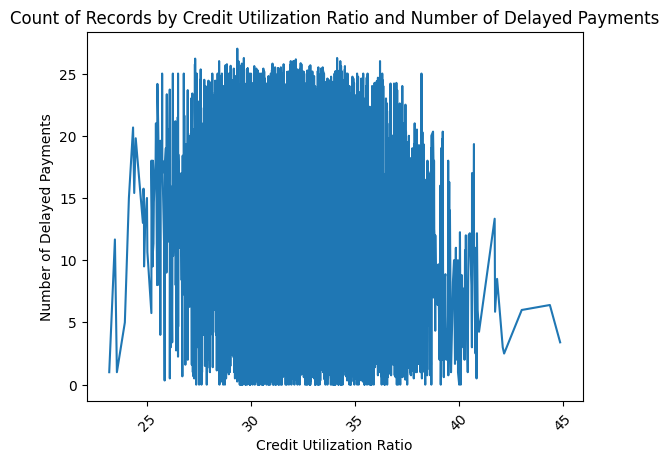

In [481]:
sb.lineplot(x=Utilization_Num2_sorted['Credit_Utilization_Ratio'], y=Utilization_Num2_sorted['Num_of_Delayed_Payment'], palette='Set2')
plt.title('Count of Records by Credit Utilization Ratio and Number of Delayed Payments')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

In [482]:
Utilization_Days = Ctrain.groupby('Credit_Utilization_Ratio')['Delay_from_due_date'].mean()
Utilization_Days.to_frame()

Delay_from_due_date
Credit_Utilization_Ratio                     
20.100770                                 0.0
20.244130                                41.0
20.257073                                16.0
20.719745                                24.0
20.830946                                21.0
...                                       ...
48.199824                                14.0
48.247003                                 6.0
48.337291                                 8.0
49.522324                                14.0
49.564519                                13.0

[60212 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2556107002.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Utilization_Days.index, y=Utilization_Days.values, palette='Set2')


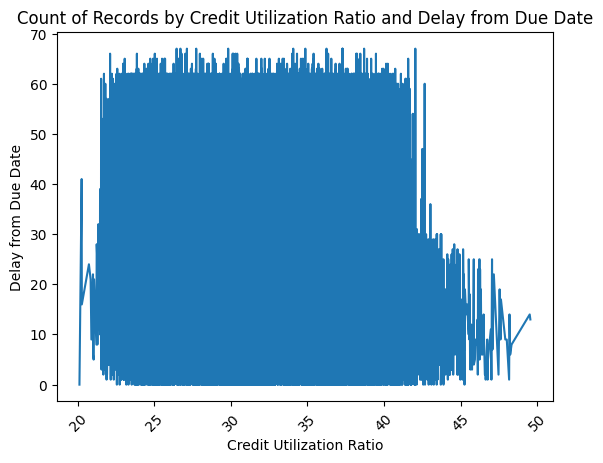

In [483]:
sb.lineplot(x=Utilization_Days.index, y=Utilization_Days.values, palette='Set2')
plt.title('Count of Records by Credit Utilization Ratio and Delay from Due Date')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Delay from Due Date')
plt.xticks(rotation=45)
plt.show()

## Credit_History_Age

In [484]:
# Convert 'credit history age by year' to numeric
Ctrain['credit history age by year'] = pd.to_numeric(Ctrain['credit history age by year'], errors='coerce')

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3465635942.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Ctrain['credit history age by year'], y=Ctrain['Num_of_Delayed_Payment'], palette='Set2')


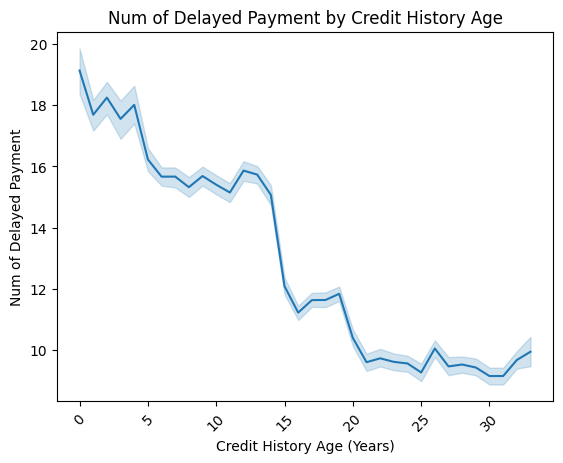

In [485]:
sb.lineplot(x=Ctrain['credit history age by year'], y=Ctrain['Num_of_Delayed_Payment'], palette='Set2')
plt.title('Num of Delayed Payment by Credit History Age')
plt.xlabel('Credit History Age (Years)')
plt.ylabel('Num of Delayed Payment')
plt.xticks(rotation=45)
plt.show()

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\4152184591.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Ctrain['credit history age by year'], y=Ctrain['Delay_from_due_date'], palette='Set2')


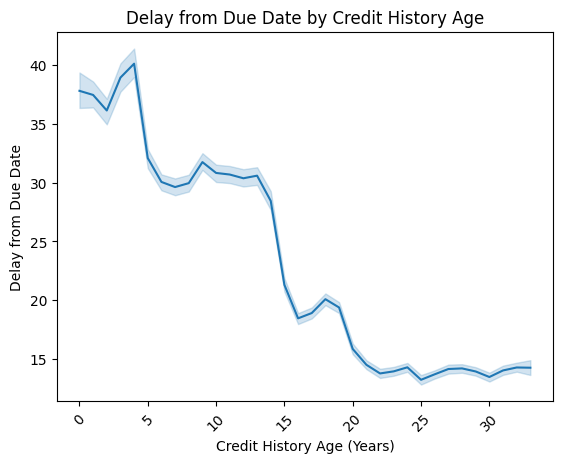

In [486]:
sb.lineplot(x=Ctrain['credit history age by year'], y=Ctrain['Delay_from_due_date'], palette='Set2')
plt.title('Delay from Due Date by Credit History Age')
plt.xlabel('Credit History Age (Years)')
plt.ylabel('Delay from Due Date')
plt.xticks(rotation=45)
plt.show()

## Payment_of_Min_Amount

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1370210572.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Ctrain['Payment_of_Min_Amount'],y=Ctrain['Num_of_Delayed_Payment'], palette='Set2')


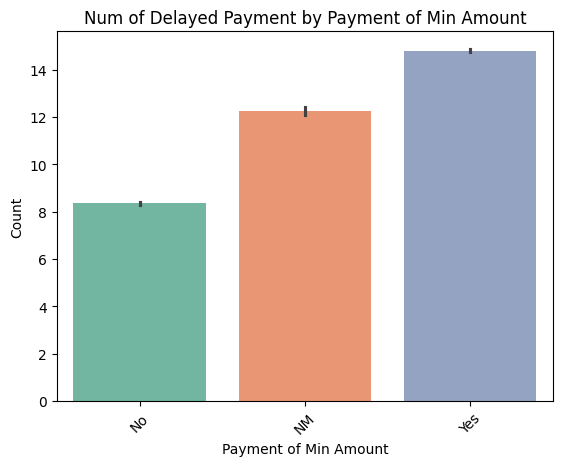

In [487]:
sb.barplot(x=Ctrain['Payment_of_Min_Amount'],y=Ctrain['Num_of_Delayed_Payment'], palette='Set2')
plt.title('Num of Delayed Payment by Payment of Min Amount')
plt.xlabel('Payment of Min Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2366286305.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Ctrain['Payment_of_Min_Amount'],y=Ctrain['Delay_from_due_date'], palette='Set2')


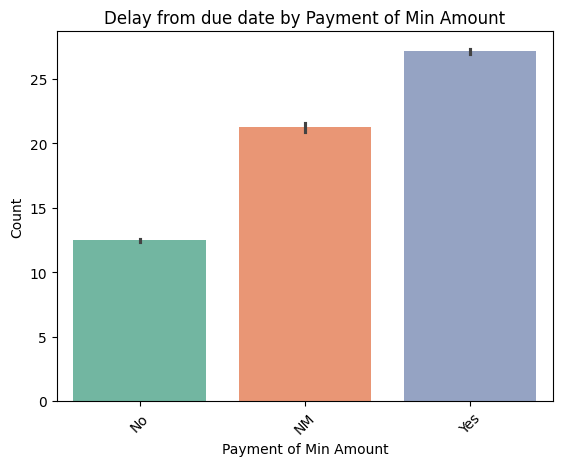

In [488]:
sb.barplot(x=Ctrain['Payment_of_Min_Amount'],y=Ctrain['Delay_from_due_date'], palette='Set2')
plt.title('Delay from due date by Payment of Min Amount')
plt.xlabel('Payment of Min Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Total_EMI_per_month

In [489]:
EMI_Num = Ctrain.groupby('Total_EMI_per_month')['Num_of_Delayed_Payment'].mean()
EMI_Num.to_frame()

Num_of_Delayed_Payment
Total_EMI_per_month                        
0.000000                           9.551424
4.462837                          18.600000
4.713184                          10.285714
4.865690                          12.750000
4.916139                          16.000000
...                                     ...
82193.000000                      21.000000
82204.000000                      11.000000
82236.000000                       8.000000
82256.000000                      15.000000
82331.000000                      21.000000

[12423 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\477291839.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x=EMI_Num.index, y=EMI_Num.values,palette='Set2')


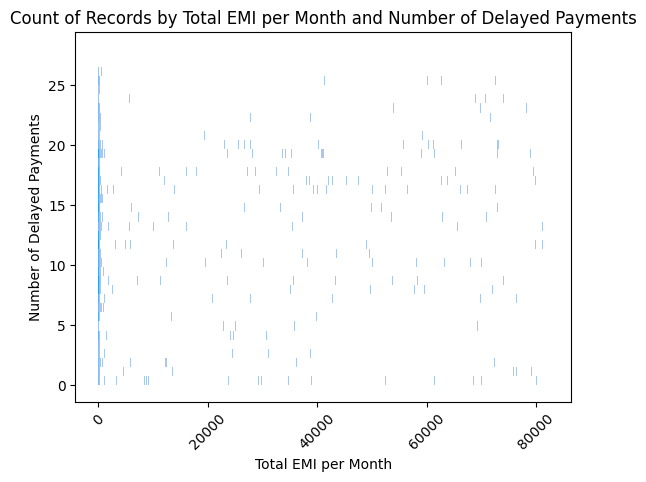

In [490]:
figsize=(12, 8)
sb.histplot(x=EMI_Num.index, y=EMI_Num.values,palette='Set2')
plt.title('Count of Records by Total EMI per Month and Number of Delayed Payments')
plt.xlabel('Total EMI per Month')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

In [491]:
EMI_Days = Ctrain.groupby('Total_EMI_per_month')['Delay_from_due_date'].mean()
EMI_Days.to_frame()

Delay_from_due_date
Total_EMI_per_month                     
0.000000                       14.224684
4.462837                       28.200000
4.713184                       19.571429
4.865690                       21.250000
4.916139                       27.000000
...                                  ...
82193.000000                   42.000000
82204.000000                    6.000000
82236.000000                    7.000000
82256.000000                   49.000000
82331.000000                   50.000000

[12423 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3232723895.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=EMI_Days.index, y=EMI_Days.values, palette='Set2')


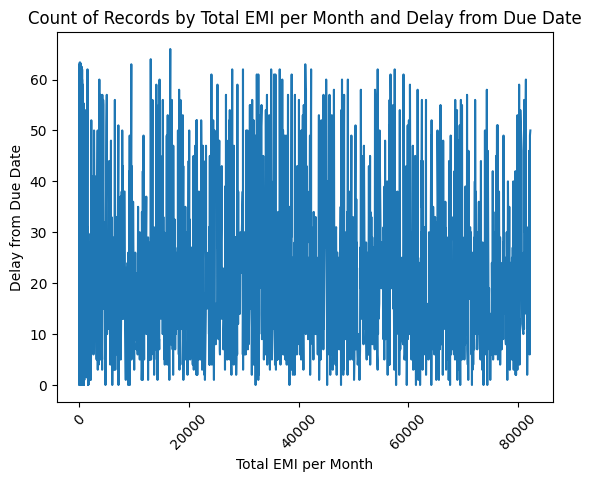

In [492]:
sb.lineplot(x=EMI_Days.index, y=EMI_Days.values, palette='Set2')
plt.title('Count of Records by Total EMI per Month and Delay from Due Date')
plt.xlabel('Total EMI per Month')
plt.ylabel('Delay from Due Date')
plt.xticks(rotation=45)
plt.show()

## Amount_invested_monthly

In [493]:
Invest_Num = Ctrain.groupby('Amount_invested_monthly')['Num_of_Delayed_Payment'].mean()
Invest_Num.to_frame()

Num_of_Delayed_Payment
Amount_invested_monthly                        
0.000000                              12.214756
10.010194                              5.000000
10.011425                             21.000000
10.071937                             25.000000
10.116614                             20.000000
...                                         ...
1860.919693                            0.000000
1903.080048                            6.000000
1941.237454                           11.000000
1944.520747                           10.000000
1977.326102                           14.000000

[54900 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2206779724.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Invest_Num.index, y=Invest_Num.values,palette='Set2')


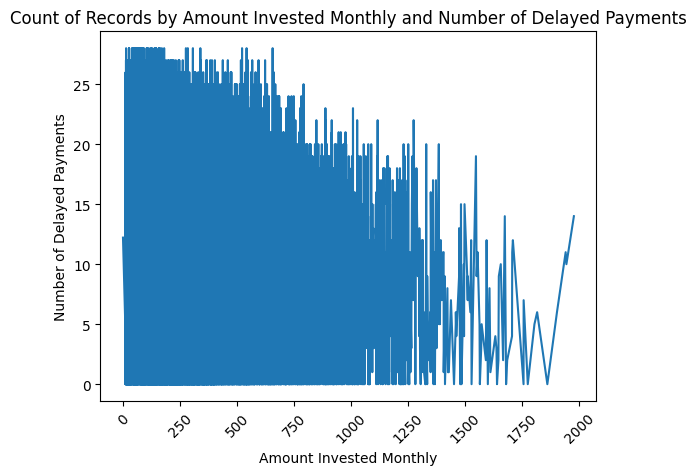

In [494]:
figsize=(12, 8)
sb.lineplot(x=Invest_Num.index, y=Invest_Num.values,palette='Set2')
plt.title('Count of Records by Amount Invested Monthly and Number of Delayed Payments')
plt.xlabel('Amount Invested Monthly')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1838420689.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x=Invest_Num.index, y=Invest_Num.values,palette='Set2')


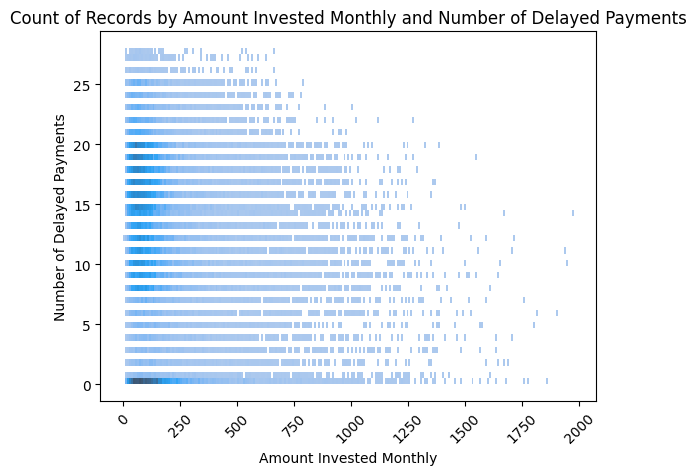

In [495]:
figsize=(12, 8)
sb.histplot(x=Invest_Num.index, y=Invest_Num.values,palette='Set2')
plt.title('Count of Records by Amount Invested Monthly and Number of Delayed Payments')
plt.xlabel('Amount Invested Monthly')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()

In [496]:
Invest_Num_Days = Ctrain.groupby('Amount_invested_monthly')['Delay_from_due_date'].mean()
Invest_Num_Days.to_frame()

Delay_from_due_date
Amount_invested_monthly                     
0.000000                           21.417655
10.010194                          14.000000
10.011425                          57.000000
10.071937                          49.000000
10.116614                          39.000000
...                                      ...
1860.919693                         2.000000
1903.080048                         8.000000
1941.237454                        31.000000
1944.520747                         7.000000
1977.326102                         7.000000

[54900 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1181142001.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Invest_Num_Days.index, y=Invest_Num_Days.values, palette='Set2')


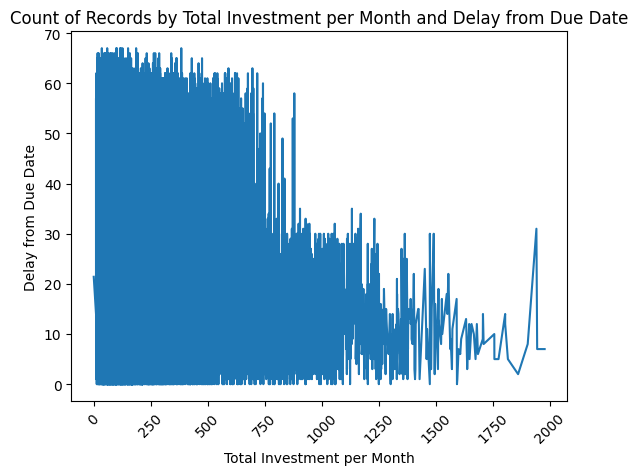

In [497]:
sb.lineplot(x=Invest_Num_Days.index, y=Invest_Num_Days.values, palette='Set2')
plt.title('Count of Records by Total Investment per Month and Delay from Due Date')
plt.xlabel('Total Investment per Month')
plt.ylabel('Delay from Due Date')
plt.xticks(rotation=45)
plt.show()

## Payment_Behaviour

In [498]:
Behavior_Num = Ctrain.groupby('Payment_Behaviour')['Num_of_Delayed_Payment'].mean()
Behavior_Num.to_frame()

Num_of_Delayed_Payment
Payment_Behaviour                                       
High_spent_Large_value_payments                11.400833
High_spent_Medium_value_payments               11.858041
High_spent_Small_value_payments                12.311943
Low_spent_Large_value_payments                 12.141867
Low_spent_Medium_value_payments                12.223455
Low_spent_Small_value_payments                 12.979974

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2237166519.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Behavior_Num.index, y=Behavior_Num.values, palette='Set2')


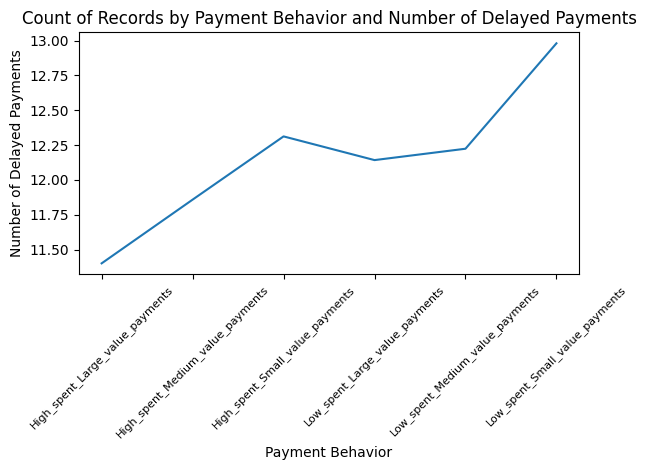

In [499]:
figsize=(12, 15)
sb.lineplot(x=Behavior_Num.index, y=Behavior_Num.values, palette='Set2')
plt.title('Count of Records by Payment Behavior and Number of Delayed Payments')
plt.xlabel('Payment Behavior')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45, fontsize=8)  # Adjust rotation and font size
plt.tight_layout()  # Ensure everything fits within the plot
plt.show()

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3086600197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Behavior_Num.index, y=Behavior_Num.values, palette='Set2')


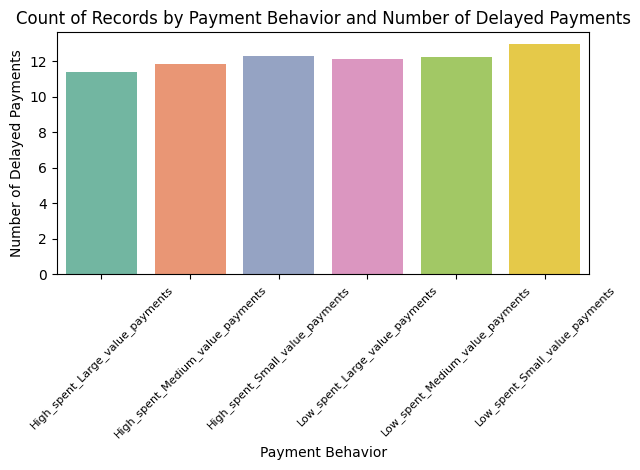

In [500]:
figsize=(12, 15)
sb.barplot(x=Behavior_Num.index, y=Behavior_Num.values, palette='Set2')
plt.title('Count of Records by Payment Behavior and Number of Delayed Payments')
plt.xlabel('Payment Behavior')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45, fontsize=8)  
plt.tight_layout() 
plt.show()

In [501]:
Behavior_Days = Ctrain.groupby('Payment_Behaviour')['Delay_from_due_date'].mean()
Behavior_Days.to_frame()

Delay_from_due_date
Payment_Behaviour                                    
High_spent_Large_value_payments             19.128208
High_spent_Medium_value_payments            20.509691
High_spent_Small_value_payments             21.295055
Low_spent_Large_value_payments              21.368382
Low_spent_Medium_value_payments             21.107068
Low_spent_Small_value_payments              23.171603

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\226914615.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Behavior_Days.index, y=Behavior_Days.values, palette='Set2')


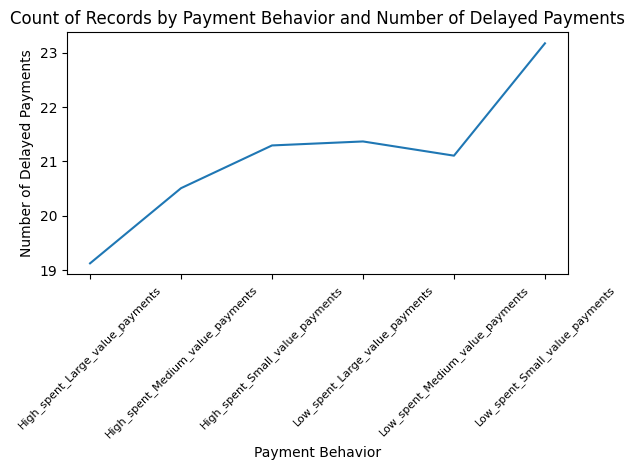

In [502]:
figsize=(12, 15)
sb.lineplot(x=Behavior_Days.index, y=Behavior_Days.values, palette='Set2')
plt.title('Count of Records by Payment Behavior and Number of Delayed Payments')
plt.xlabel('Payment Behavior')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45, fontsize=8)  
plt.tight_layout() 
plt.show()

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2702247997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Behavior_Days.index, y=Behavior_Days.values, palette='Set2')


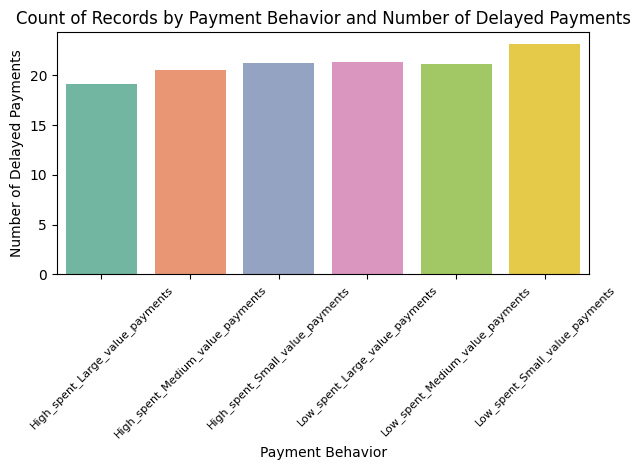

In [503]:
figsize=(12, 15)
sb.barplot(x=Behavior_Days.index, y=Behavior_Days.values, palette='Set2')
plt.title('Count of Records by Payment Behavior and Number of Delayed Payments')
plt.xlabel('Payment Behavior')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45, fontsize=8)  
plt.tight_layout() 
plt.show()

## Monthly_Balance

In [504]:
Balance_Num = Ctrain.groupby('Monthly_Balance')['Num_of_Delayed_Payment'].mean()
Balance_Num.to_frame()

Num_of_Delayed_Payment
Monthly_Balance                        
0.000000                      12.925562
0.007760                      10.000000
0.131136                      16.000000
0.419124                      15.000000
0.503582                       8.000000
...                                 ...
1555.201051                    8.000000
1558.421841                    1.000000
1566.613165                    5.000000
1567.208309                    8.000000
1576.288935                    9.000000

[59501 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1825983150.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x=Balance_Num.index, y=Balance_Num.values, palette='Set2')


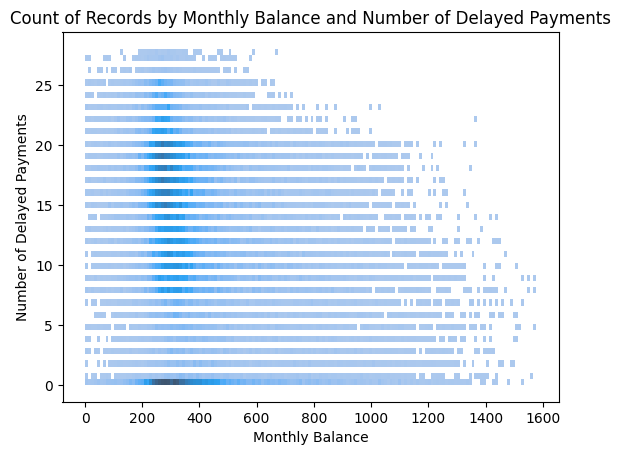

In [505]:
sb.histplot(x=Balance_Num.index, y=Balance_Num.values, palette='Set2')
plt.title('Count of Records by Monthly Balance and Number of Delayed Payments')
plt.xlabel('Monthly Balance')
plt.ylabel('Number of Delayed Payments')
plt.show()

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1832149408.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Balance_Num.index, y=Balance_Num.values, palette='Set2')


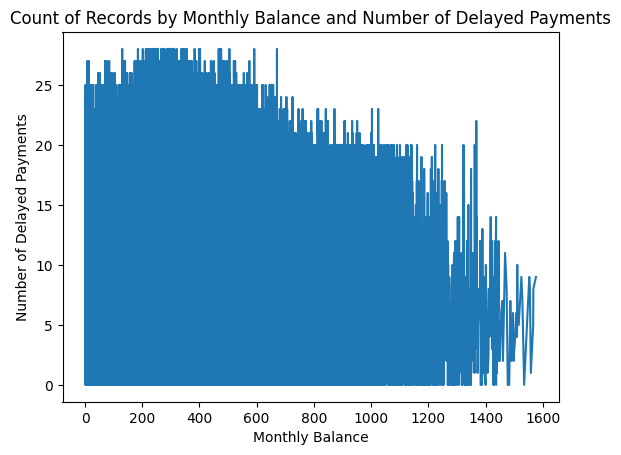

In [506]:
sb.lineplot(x=Balance_Num.index, y=Balance_Num.values, palette='Set2')
plt.title('Count of Records by Monthly Balance and Number of Delayed Payments')
plt.xlabel('Monthly Balance')
plt.ylabel('Number of Delayed Payments')
plt.show()

In [507]:
Balance_Days = Ctrain.groupby('Monthly_Balance')['Delay_from_due_date'].mean()
Balance_Days.to_frame()

Delay_from_due_date
Monthly_Balance                     
0.000000                   23.773876
0.007760                    8.000000
0.131136                   12.000000
0.419124                   23.000000
0.503582                    5.000000
...                              ...
1555.201051                 4.000000
1558.421841                 1.000000
1566.613165                14.000000
1567.208309                 4.000000
1576.288935                 2.000000

[59501 rows x 1 columns]

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\453322404.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Balance_Days.index, y=Balance_Days.values, palette='Set2')


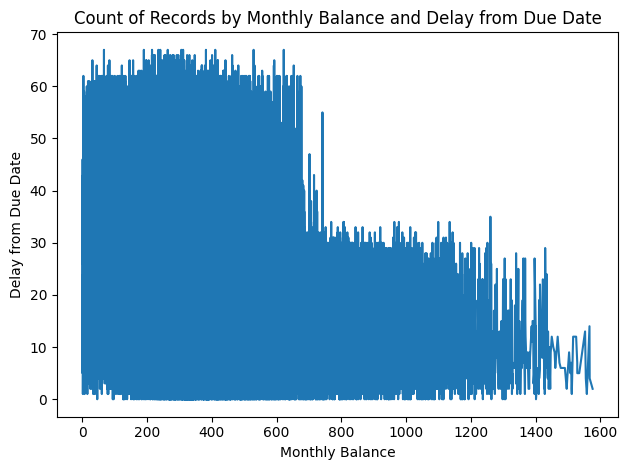

In [508]:
sb.lineplot(x=Balance_Days.index, y=Balance_Days.values, palette='Set2')
plt.title('Count of Records by Monthly Balance and Delay from Due Date')
plt.xlabel('Monthly Balance')
plt.ylabel('Delay from Due Date')
plt.tight_layout()
plt.show()


C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3632393849.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x=Balance_Days.index, y=Balance_Days.values, palette='Set2')


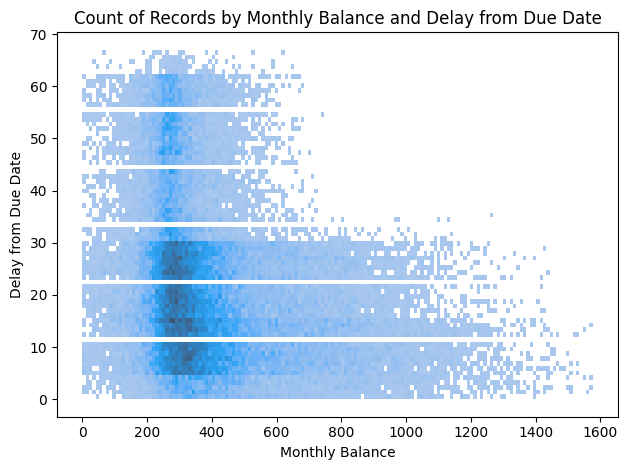

In [509]:
sb.histplot(x=Balance_Days.index, y=Balance_Days.values, palette='Set2')
plt.title('Count of Records by Monthly Balance and Delay from Due Date')
plt.xlabel('Monthly Balance')
plt.ylabel('Delay from Due Date')
plt.tight_layout()
plt.show()

# Drawing cuclusuons:

## Age

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2725348502.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(ax=axes[0], x=Age_Num_df.index, y=Age_Num_df['Num_of_Delayed_Payment'], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2725348502.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(ax=axes[1], x=due_date_age_reset['Age'], y=due_date_age_reset['Delay_from_due_date'], palette='Set2')


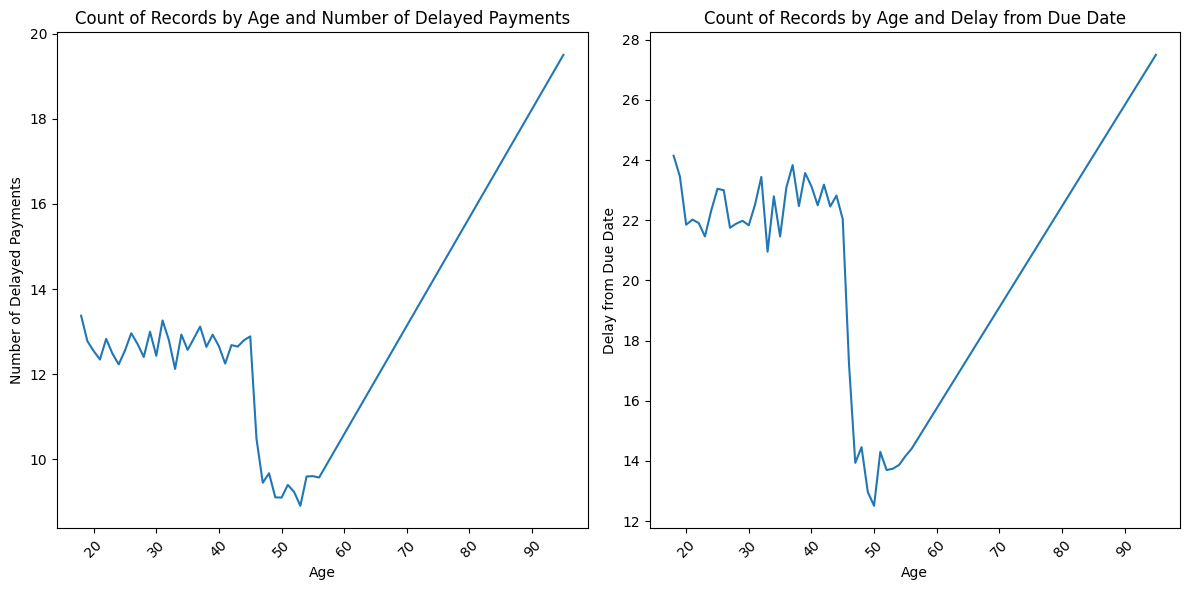

In [510]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.lineplot(ax=axes[0], x=Age_Num_df.index, y=Age_Num_df['Num_of_Delayed_Payment'], palette='Set2')
axes[0].set_title('Count of Records by Age and Number of Delayed Payments')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of Delayed Payments')
axes[0].tick_params(axis='x', rotation=45)

# Plot the second plot on the second subplot
sb.lineplot(ax=axes[1], x=due_date_age_reset['Age'], y=due_date_age_reset['Delay_from_due_date'], palette='Set2')
axes[1].set_title('Count of Records by Age and Delay from Due Date')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Delay from Due Date')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Occupation

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\4127312751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Occupation_Num.index, y=Occupation_Num.values, ax=axes[0], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\4127312751.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Occupation_delay.index, y=Occupation_delay.values, ax=axes[1], palette='Set2')


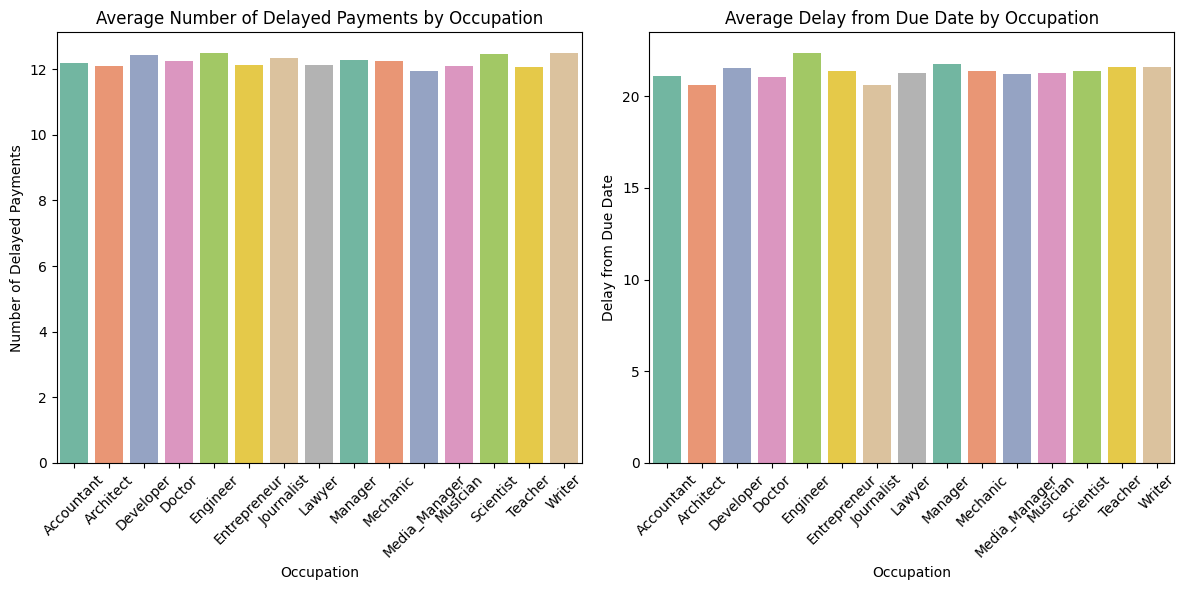

In [511]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.barplot(x=Occupation_Num.index, y=Occupation_Num.values, ax=axes[0], palette='Set2')
axes[0].set_title('Average Number of Delayed Payments by Occupation')
axes[0].set_xlabel('Occupation')
axes[0].set_ylabel('Number of Delayed Payments')
axes[0].tick_params(axis='x', rotation=45)

# Plot the second plot on the second subplot
sb.barplot(x=Occupation_delay.index, y=Occupation_delay.values, ax=axes[1], palette='Set2')
axes[1].set_title('Average Delay from Due Date by Occupation')
axes[1].set_xlabel('Occupation')
axes[1].set_ylabel('Delay from Due Date')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Num_Bank_Accounts

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\4244719389.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=NumBank_Num.index, y=NumBank_Num.values, ax=axes[0], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\4244719389.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=NumBank_Delay.index, y=NumBank_Delay.values, ax=axes[1], palette='Set2')


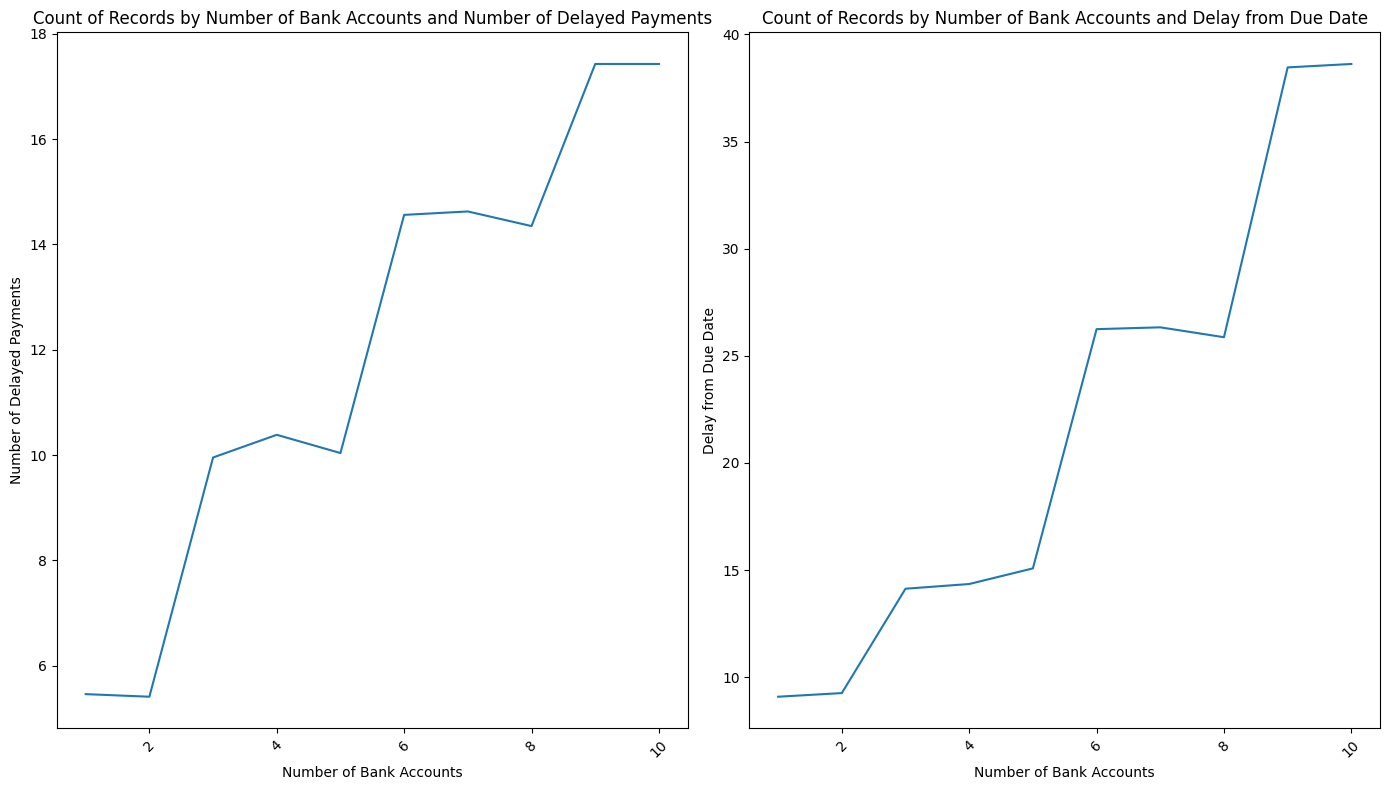

In [512]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 8))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.lineplot(x=NumBank_Num.index, y=NumBank_Num.values, ax=axes[0], palette='Set2')
axes[0].set_title('Count of Records by Number of Bank Accounts and Number of Delayed Payments')
axes[0].set_xlabel('Number of Bank Accounts')
axes[0].set_ylabel('Number of Delayed Payments')
axes[0].tick_params(axis='x', rotation=45)

# Plot the second plot on the second subplot
sb.lineplot(x=NumBank_Delay.index, y=NumBank_Delay.values, ax=axes[1], palette='Set2')
axes[1].set_title('Count of Records by Number of Bank Accounts and Delay from Due Date')
axes[1].set_xlabel('Number of Bank Accounts')
axes[1].set_ylabel('Delay from Due Date')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Num_Credit_Card

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3495022717.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=CreditNum_Num.index, y=CreditNum_Num.values, ax=axes[0], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3495022717.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=CreditNum_Days.index, y=CreditNum_Days.values, ax=axes[1], palette='Set2')


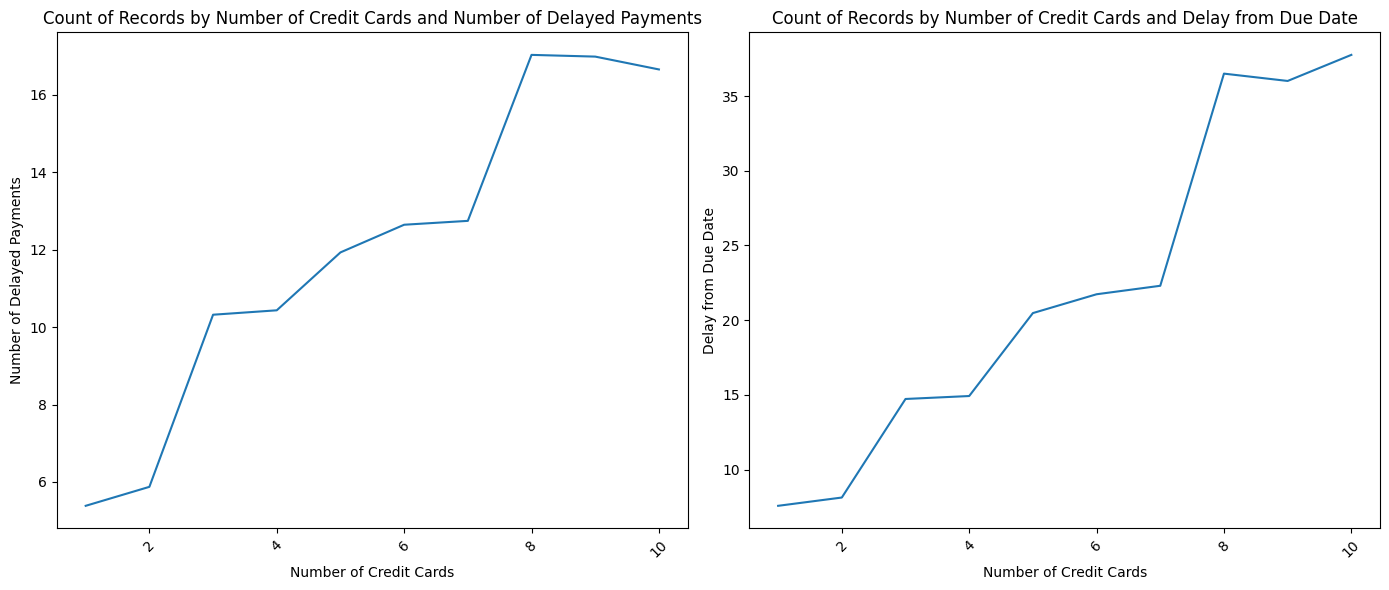

In [513]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.lineplot(x=CreditNum_Num.index, y=CreditNum_Num.values, ax=axes[0], palette='Set2')
axes[0].set_title('Count of Records by Number of Credit Cards and Number of Delayed Payments')
axes[0].set_xlabel('Number of Credit Cards')
axes[0].set_ylabel('Number of Delayed Payments')
axes[0].tick_params(axis='x', rotation=45)

# Plot the second plot on the second subplot
sb.lineplot(x=CreditNum_Days.index, y=CreditNum_Days.values, ax=axes[1], palette='Set2')
axes[1].set_title('Count of Records by Number of Credit Cards and Delay from Due Date')
axes[1].set_xlabel('Number of Credit Cards')
axes[1].set_ylabel('Delay from Due Date')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Interest_Rate 

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3216620202.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Intrest_Num.index, y=Intrest_Num.values, ax=axes[0], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3216620202.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Intrest_Days.index, y=Intrest_Days.values, ax=axes[1], palette='Set2')


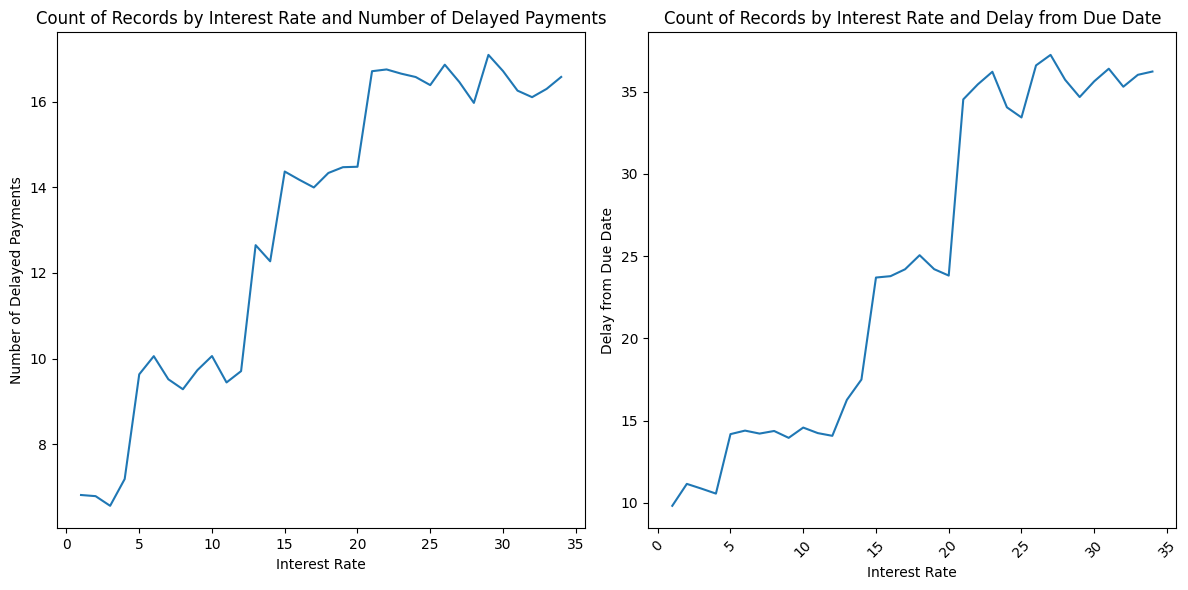

In [514]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.lineplot(x=Intrest_Num.index, y=Intrest_Num.values, ax=axes[0], palette='Set2')
axes[0].set_title('Count of Records by Interest Rate and Number of Delayed Payments')
axes[0].set_xlabel('Interest Rate')
axes[0].set_ylabel('Number of Delayed Payments')

# Plot the second plot on the second subplot
sb.lineplot(x=Intrest_Days.index, y=Intrest_Days.values, ax=axes[1], palette='Set2')
axes[1].set_title('Count of Records by Interest Rate and Delay from Due Date')
axes[1].set_xlabel('Interest Rate')
axes[1].set_ylabel('Delay from Due Date')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Num_of_Loan

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3284600355.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Loan_Num.index, y=Loan_Num.values, ax=axes[0], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3284600355.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Loan_Days.index, y=Loan_Days.values, ax=axes[1], palette='Set2')


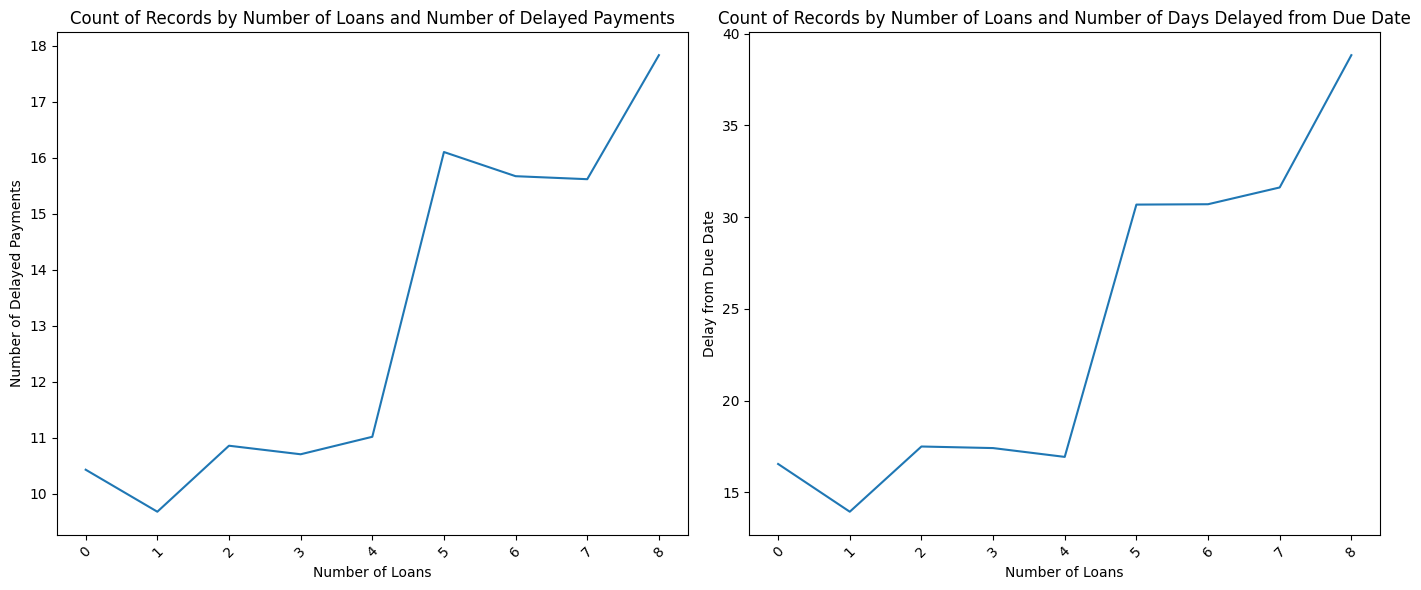

In [515]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.lineplot(x=Loan_Num.index, y=Loan_Num.values, ax=axes[0], palette='Set2')
axes[0].set_title('Count of Records by Number of Loans and Number of Delayed Payments')
axes[0].set_xlabel('Number of Loans')
axes[0].set_ylabel('Number of Delayed Payments')
axes[0].tick_params(axis='x', rotation=45)

# Plot the second plot on the second subplot
sb.lineplot(x=Loan_Days.index, y=Loan_Days.values, ax=axes[1], palette='Set2')
axes[1].set_title('Count of Records by Number of Loans and Number of Days Delayed from Due Date')
axes[1].set_xlabel('Number of Loans')
axes[1].set_ylabel('Delay from Due Date')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Num_Credit_Inquiries

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\381184226.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Inquiries_Num.index, y=Inquiries_Num.values, ax=axes[0], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\381184226.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Inquiries_Days.index, y=Inquiries_Days.values, ax=axes[1], palette='Set2')


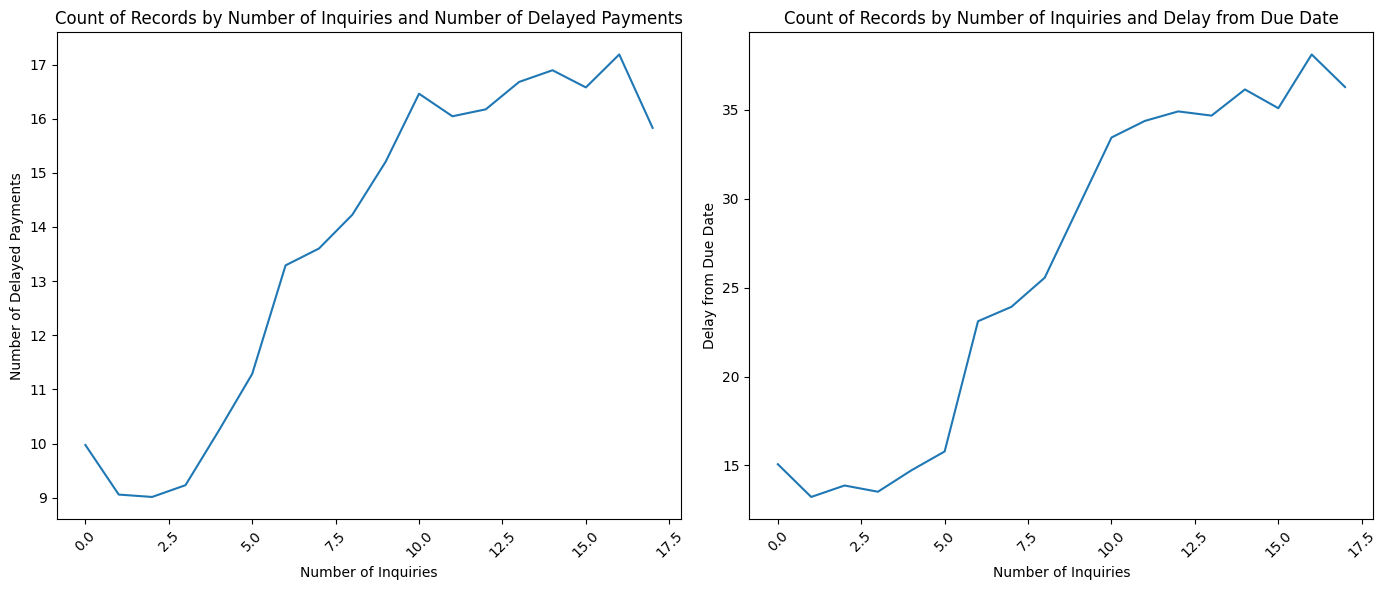

In [516]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.lineplot(x=Inquiries_Num.index, y=Inquiries_Num.values, ax=axes[0], palette='Set2')
axes[0].set_title('Count of Records by Number of Inquiries and Number of Delayed Payments')
axes[0].set_xlabel('Number of Inquiries')
axes[0].set_ylabel('Number of Delayed Payments')
axes[0].tick_params(axis='x', rotation=45)

# Plot the second plot on the second subplot
sb.lineplot(x=Inquiries_Days.index, y=Inquiries_Days.values, ax=axes[1], palette='Set2')
axes[1].set_title('Count of Records by Number of Inquiries and Delay from Due Date')
axes[1].set_xlabel('Number of Inquiries')
axes[1].set_ylabel('Delay from Due Date')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Outstanding_Debt

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2549885213.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x=Outstanding_Num.index, y=Outstanding_Num.values, ax=axes[0], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2549885213.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x=Outstanding_Days.index, y=Outstanding_Days.values, ax=axes[1], palette='Set2')


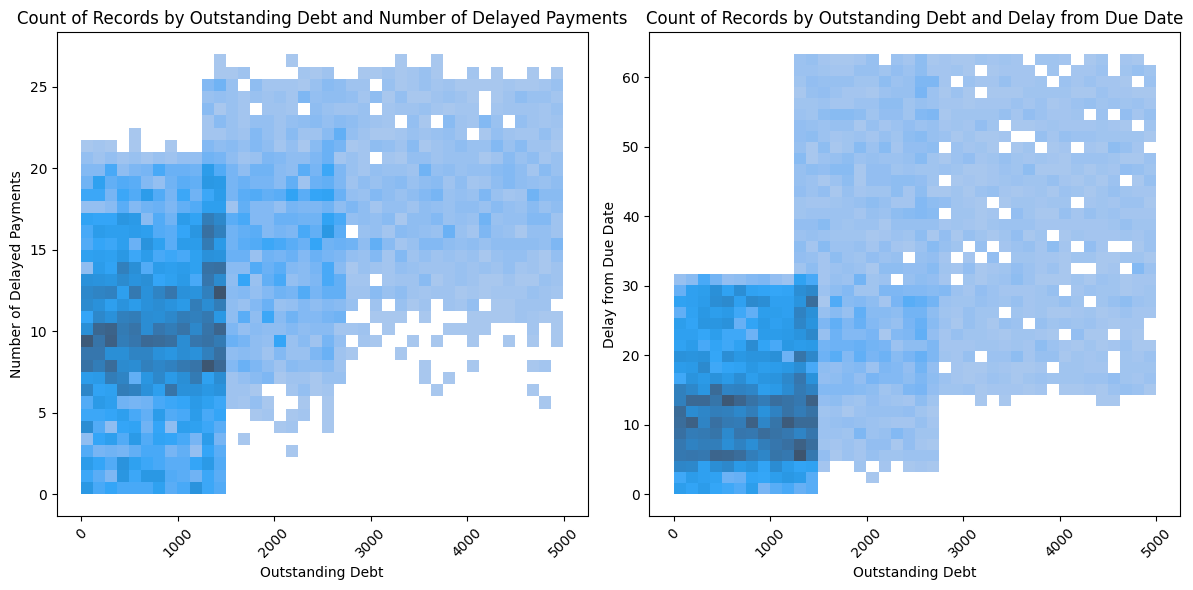

In [517]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.histplot(x=Outstanding_Num.index, y=Outstanding_Num.values, ax=axes[0], palette='Set2')
axes[0].set_title('Count of Records by Outstanding Debt and Number of Delayed Payments')
axes[0].set_xlabel('Outstanding Debt')
axes[0].set_ylabel('Number of Delayed Payments')
axes[0].tick_params(axis='x', rotation=45)

# Plot the second plot on the second subplot
sb.histplot(x=Outstanding_Days.index, y=Outstanding_Days.values, ax=axes[1], palette='Set2')
axes[1].set_title('Count of Records by Outstanding Debt and Delay from Due Date')
axes[1].set_xlabel('Outstanding Debt')
axes[1].set_ylabel('Delay from Due Date')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Credit_Utilization_Ratio

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1744051518.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x=Utilization_Num2_sorted['Credit_Utilization_Ratio'], y=Utilization_Num2_sorted['Num_of_Delayed_Payment'], ax=axes[0], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1744051518.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x=Utilization_Days.index, y=Utilization_Days.values, ax=axes[1], palette='Set2')


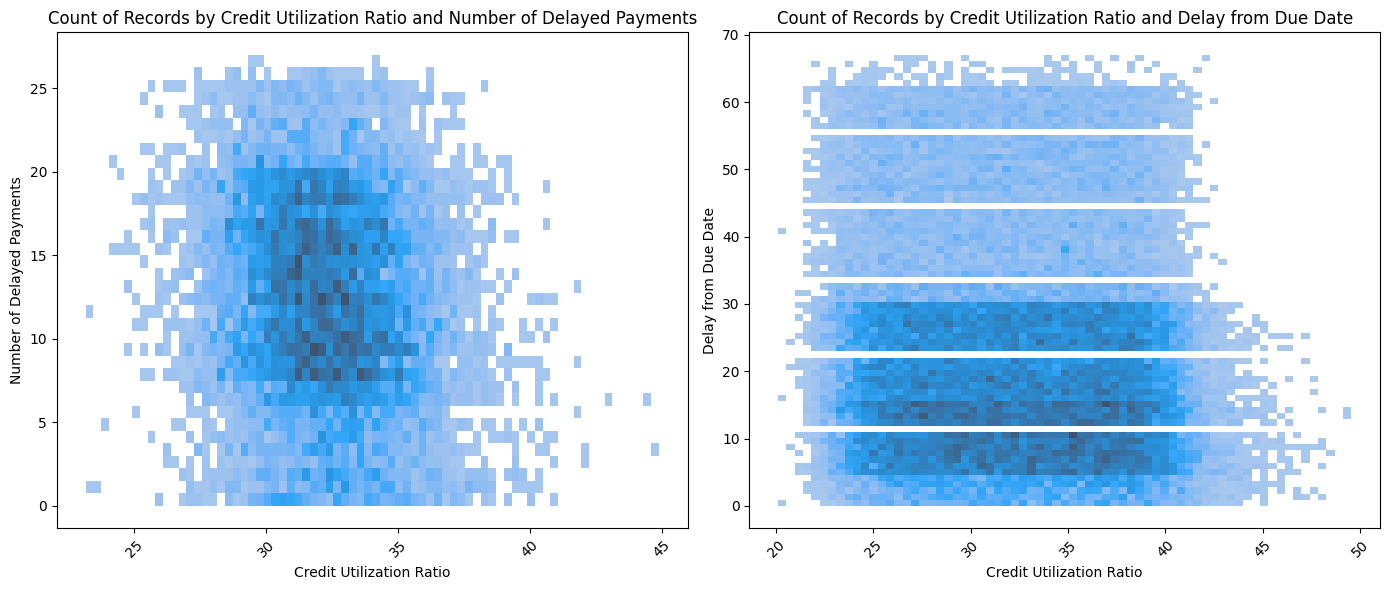

In [518]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.histplot(x=Utilization_Num2_sorted['Credit_Utilization_Ratio'], y=Utilization_Num2_sorted['Num_of_Delayed_Payment'], ax=axes[0], palette='Set2')
axes[0].set_title('Count of Records by Credit Utilization Ratio and Number of Delayed Payments')
axes[0].set_xlabel('Credit Utilization Ratio')
axes[0].set_ylabel('Number of Delayed Payments')
axes[0].tick_params(axis='x', rotation=45)

# Plot the second plot on the second subplot
sb.histplot(x=Utilization_Days.index, y=Utilization_Days.values, ax=axes[1], palette='Set2')
axes[1].set_title('Count of Records by Credit Utilization Ratio and Delay from Due Date')
axes[1].set_xlabel('Credit Utilization Ratio')
axes[1].set_ylabel('Delay from Due Date')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Credit_History_Age

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2233324235.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(ax=axes[0], x=Ctrain['credit history age by year'], y=Ctrain['Num_of_Delayed_Payment'], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\2233324235.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(ax=axes[1], x=Ctrain['credit history age by year'], y=Ctrain['Delay_from_due_date'], palette='Set2')


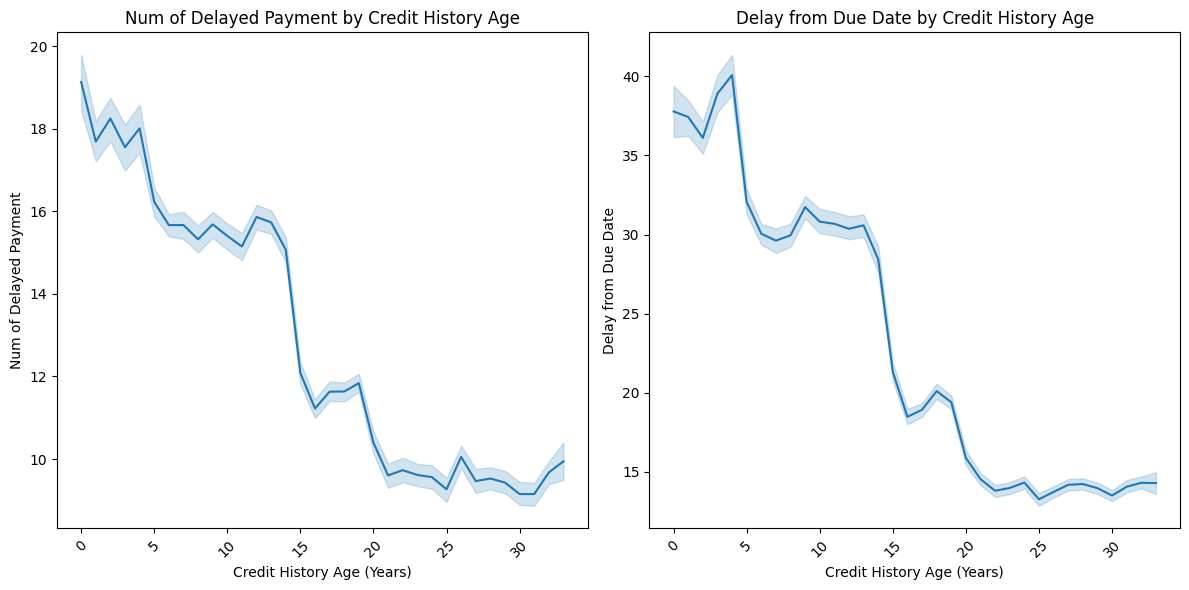

In [519]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.lineplot(ax=axes[0], x=Ctrain['credit history age by year'], y=Ctrain['Num_of_Delayed_Payment'], palette='Set2')
axes[0].set_title('Num of Delayed Payment by Credit History Age')
axes[0].set_xlabel('Credit History Age (Years)')
axes[0].set_ylabel('Num of Delayed Payment')
axes[0].tick_params(axis='x', rotation=45)

# Plot the second plot on the second subplot
sb.lineplot(ax=axes[1], x=Ctrain['credit history age by year'], y=Ctrain['Delay_from_due_date'], palette='Set2')
axes[1].set_title('Delay from Due Date by Credit History Age')
axes[1].set_xlabel('Credit History Age (Years)')
axes[1].set_ylabel('Delay from Due Date')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Payment_of_Min_Amount

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3722200383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(ax=axes[0], x=Ctrain['Payment_of_Min_Amount'], y=Ctrain['Num_of_Delayed_Payment'], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\3722200383.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(ax=axes[1], x=Ctrain['Payment_of_Min_Amount'], y=Ctrain['Delay_from_due_date'], palette='Set2')


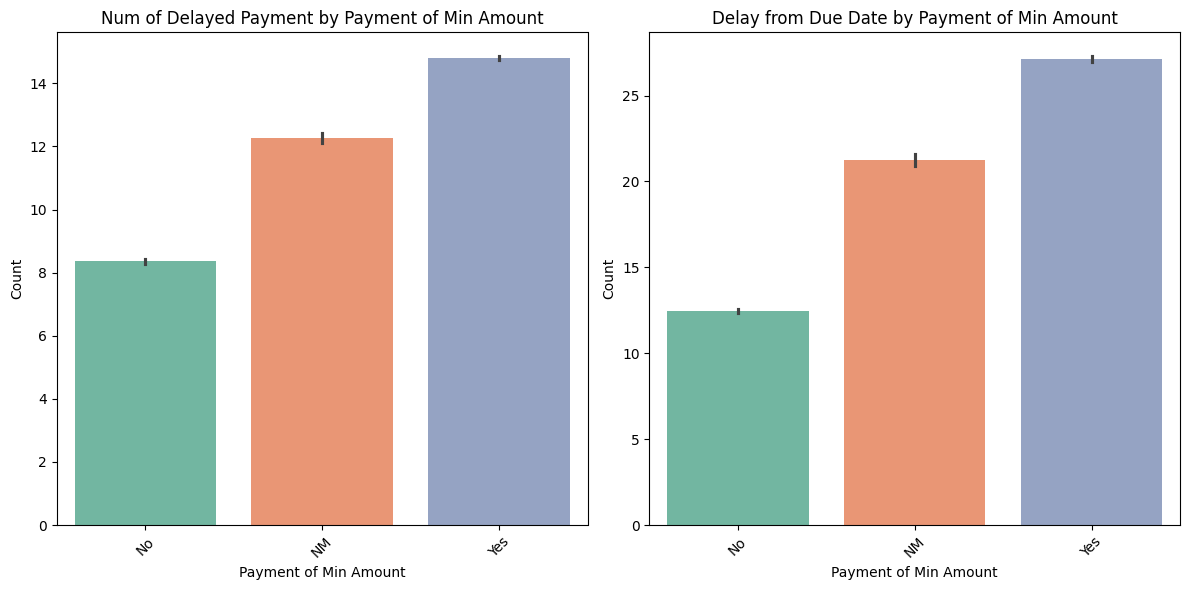

In [520]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.barplot(ax=axes[0], x=Ctrain['Payment_of_Min_Amount'], y=Ctrain['Num_of_Delayed_Payment'], palette='Set2')
axes[0].set_title('Num of Delayed Payment by Payment of Min Amount')
axes[0].set_xlabel('Payment of Min Amount')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot the second plot on the second subplot
sb.barplot(ax=axes[1], x=Ctrain['Payment_of_Min_Amount'], y=Ctrain['Delay_from_due_date'], palette='Set2')
axes[1].set_title('Delay from Due Date by Payment of Min Amount')
axes[1].set_xlabel('Payment of Min Amount')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Total_EMI_per_month

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\612076093.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(x=EMI_Num.index, y=EMI_Num.values, ax=axes[0], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\612076093.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=EMI_Days.index, y=EMI_Days.values, ax=axes[1], palette='Set2')


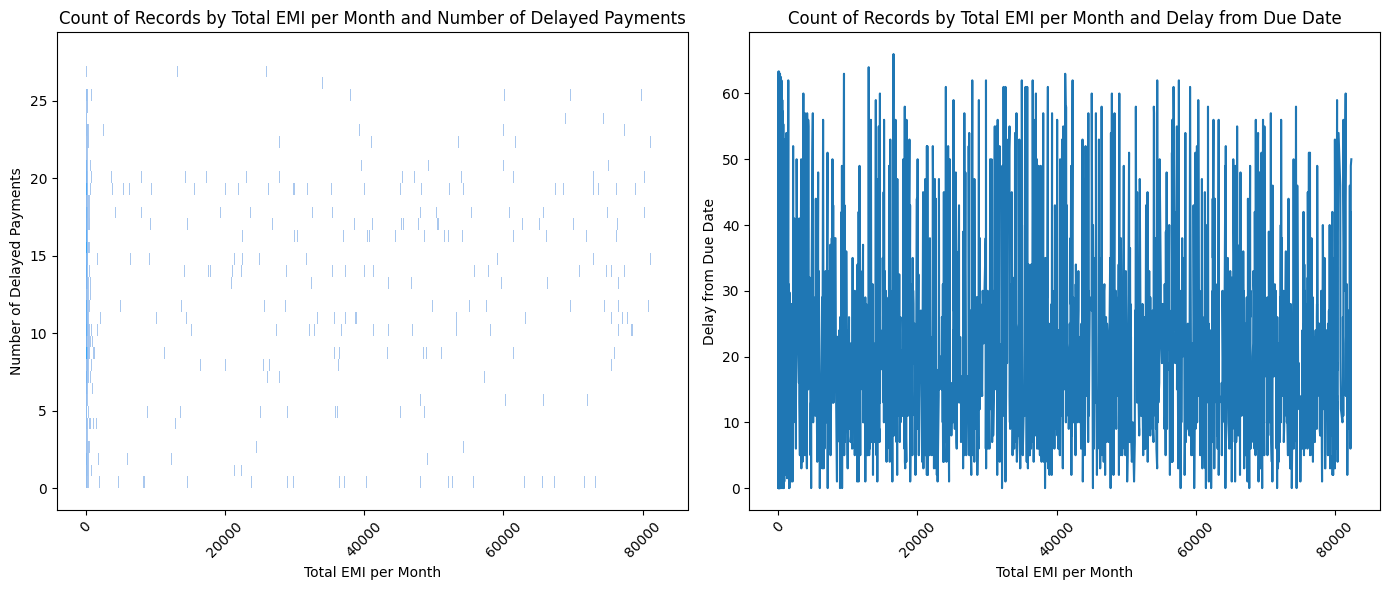

In [521]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.histplot(x=EMI_Num.index, y=EMI_Num.values, ax=axes[0], palette='Set2')
axes[0].set_title('Count of Records by Total EMI per Month and Number of Delayed Payments')
axes[0].set_xlabel('Total EMI per Month')
axes[0].set_ylabel('Number of Delayed Payments')
axes[0].tick_params(axis='x', rotation=45)

# Plot the second plot on the second subplot
sb.lineplot(x=EMI_Days.index, y=EMI_Days.values, ax=axes[1], palette='Set2')
axes[1].set_title('Count of Records by Total EMI per Month and Delay from Due Date')
axes[1].set_xlabel('Total EMI per Month')
axes[1].set_ylabel('Delay from Due Date')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Amount_invested_monthly

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\598488205.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Invest_Num.index, y=Invest_Num.values, ax=axes[0], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\598488205.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Invest_Num_Days.index, y=Invest_Num_Days.values, ax=axes[1], palette='Set2')


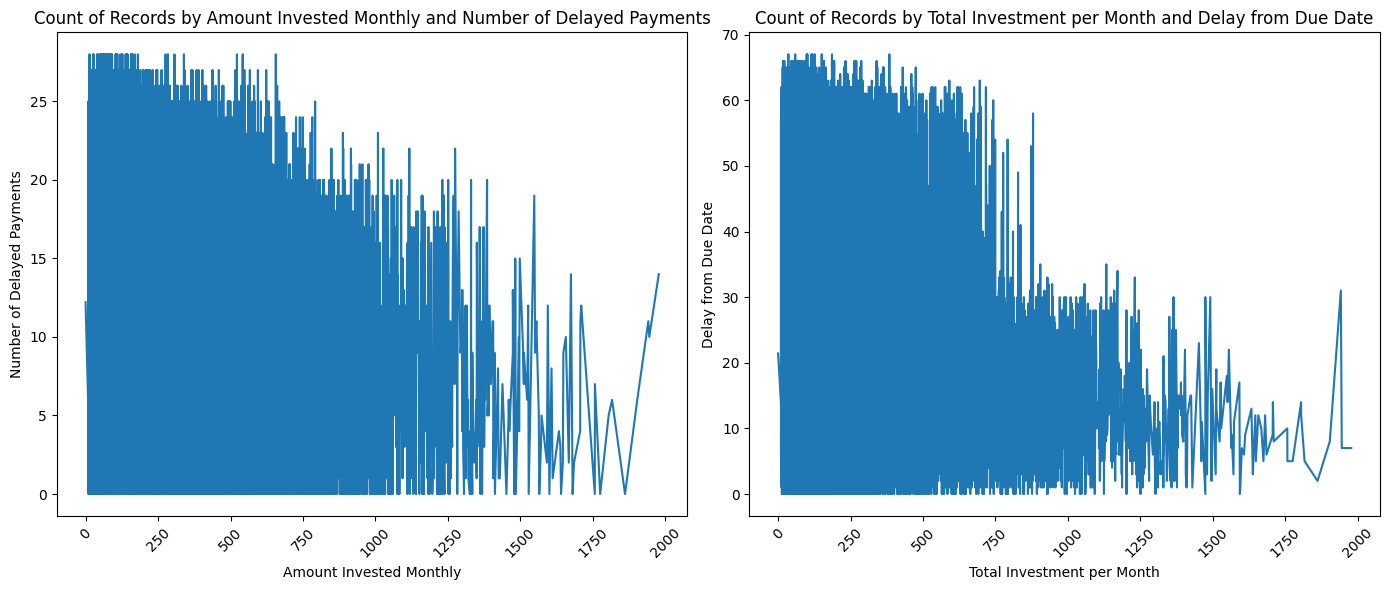

In [522]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.lineplot(x=Invest_Num.index, y=Invest_Num.values, ax=axes[0], palette='Set2')
axes[0].set_title('Count of Records by Amount Invested Monthly and Number of Delayed Payments')
axes[0].set_xlabel('Amount Invested Monthly')
axes[0].set_ylabel('Number of Delayed Payments')
axes[0].tick_params(axis='x', rotation=45)

# Plot the second plot on the second subplot
sb.lineplot(x=Invest_Num_Days.index, y=Invest_Num_Days.values, ax=axes[1], palette='Set2')
axes[1].set_title('Count of Records by Total Investment per Month and Delay from Due Date')
axes[1].set_xlabel('Total Investment per Month')
axes[1].set_ylabel('Delay from Due Date')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Payment_Behaviour

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\354346254.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Behavior_Num.index, y=Behavior_Num.values, ax=axes[0], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\354346254.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Behavior_Days.index, y=Behavior_Days.values, ax=axes[1], palette='Set2')


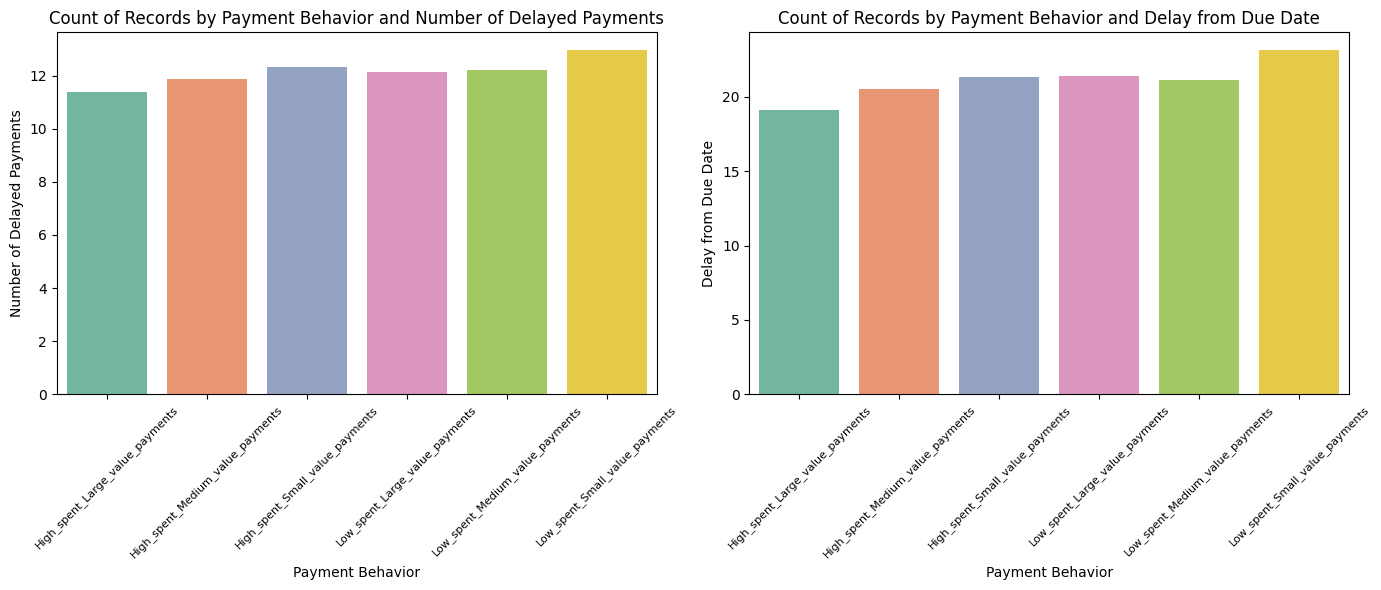

In [523]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.barplot(x=Behavior_Num.index, y=Behavior_Num.values, ax=axes[0], palette='Set2')
axes[0].set_title('Count of Records by Payment Behavior and Number of Delayed Payments')
axes[0].set_xlabel('Payment Behavior')
axes[0].set_ylabel('Number of Delayed Payments')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

# Plot the second plot on the second subplot
sb.barplot(x=Behavior_Days.index, y=Behavior_Days.values, ax=axes[1], palette='Set2')
axes[1].set_title('Count of Records by Payment Behavior and Delay from Due Date')
axes[1].set_xlabel('Payment Behavior')
axes[1].set_ylabel('Delay from Due Date')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Monthly_Balance

C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1701225423.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Balance_Num.index, y=Balance_Num.values, ax=axes[0], palette='Set2')
C:\Users\ariel\AppData\Local\Temp\ipykernel_14940\1701225423.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=Balance_Days.index, y=Balance_Days.values, ax=axes[1], palette='Set2')


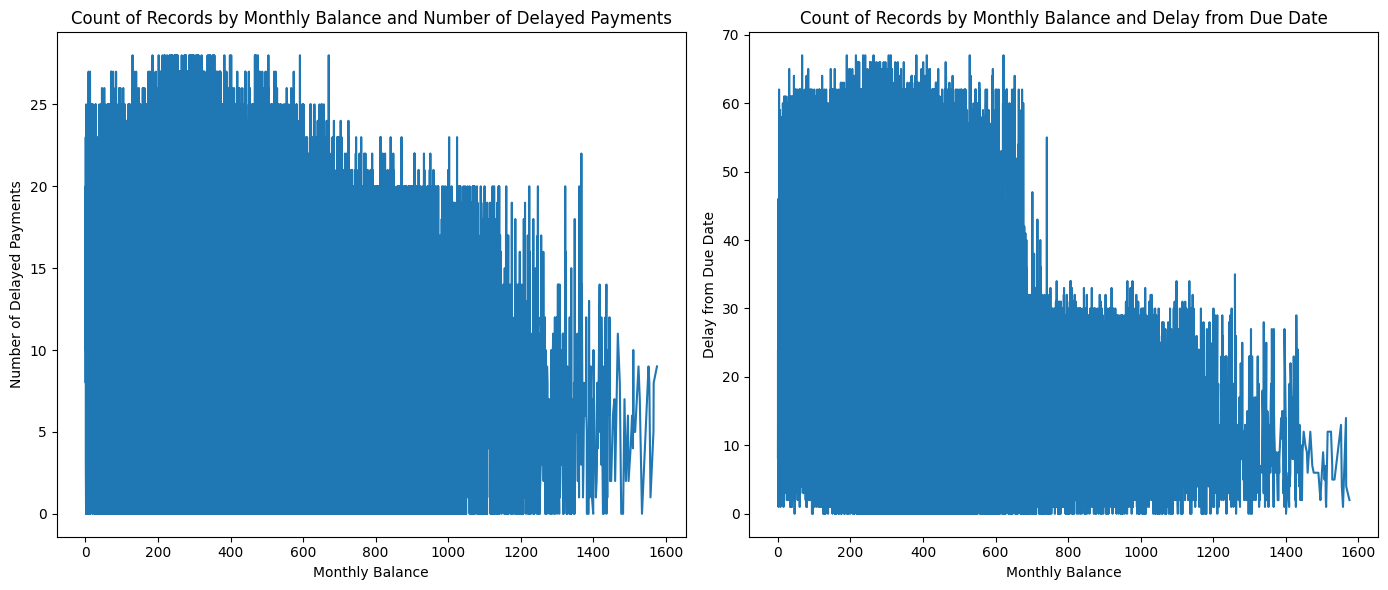

In [524]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first plot on the first subplot
sb.lineplot(x=Balance_Num.index, y=Balance_Num.values, ax=axes[0], palette='Set2')
axes[0].set_title('Count of Records by Monthly Balance and Number of Delayed Payments')
axes[0].set_xlabel('Monthly Balance')
axes[0].set_ylabel('Number of Delayed Payments')

# Plot the second plot on the second subplot
sb.lineplot(x=Balance_Days.index, y=Balance_Days.values, ax=axes[1], palette='Set2')
axes[1].set_title('Count of Records by Monthly Balance and Delay from Due Date')
axes[1].set_xlabel('Monthly Balance')
axes[1].set_ylabel('Delay from Due Date')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Calculating the score

## Age

In [525]:
def classify_age(age):
    if 18 <= age < 45:
        return 1
    elif 45 <= age < 61:
        return 2
    elif 61 <= age <= 75:
        return 3
    elif age > 75:
        return 2
    else:
        return None  # or 0, or raise an error if age is invalid
    
def classify_age_Flag(age):
    if 18 <= age < 20:
        return 'The customer is very Young'
    elif 20 <= age < 25:
        return 'The customer is Young'
    elif age > 75:
        return 'The customer is very old'
    else:
        return None  # or 0, or raise an error if age is invalid

# Example usage:
age_input = int(input("Enter your age: "))
Age_group = classify_age(age_input)
Age_Flag = classify_age_Flag(age_input)
print(f"Age group: {Age_group}")
print(f"Age Flag: {Age_Flag}")

Age group: None
Age Flag: None


## Occupation

In [526]:
def classify_occupation(occupation):
    if occupation in ['Manager', 'Lawyer', 'Media manager', 'Engeneer', 'Developer']:
        return 1
    else:
        return 2  

def classify_occupation_flag(occupation):
    if classify_occupation(occupation) == 1:
        return "High risk"
    else:
        return "Low risk"

# Example usage:
occupation_input = input("Enter your occupation: ").strip()
occupation_group = classify_occupation(occupation_input)
flag_occupation = classify_occupation_flag(occupation_input)

print(f"Occupation group: {occupation_group}")
print(f'Occupation Flag: {flag_occupation}')

Occupation group: 2
Occupation Flag: Low risk


## Num_Bank_Accounts

In [527]:

def classify_num_bank_accounts(num_bank_accounts):
	if 0 < num_bank_accounts < 2:
		return 4
	elif 2 <= num_bank_accounts < 4:
		return 3
	elif 4 <= num_bank_accounts < 6:
		return 2
	elif 6 <= num_bank_accounts < 10:
		return 1
	else:
		return None  # or raise an error if num_bank_accounts is invalid

def classify_num_bank_accounts_flag(num_bank_accounts):
	if classify_num_bank_accounts(num_bank_accounts) == 1:
		return "High risk - many bank accounts"
	else:
		return None

# Example usage:
num_bank_accounts_input = int(input("Enter the number of bank accounts: "))
num_bank_accounts_group = classify_num_bank_accounts(num_bank_accounts_input)
num_bank_accounts_flag = classify_num_bank_accounts_flag(num_bank_accounts_input)
print(f"Number of bank accounts group: {num_bank_accounts_group}")
print(f"Number of bank accounts Flag: {num_bank_accounts_flag}")


Number of bank accounts group: 3
Number of bank accounts Flag: None


## Num_Credit_Card

In [528]:
def classify_Num_Credit_Card(Num_Credit_Card):
    if 0 < Num_Credit_Card <= 2:
        return 4
    elif 2 < Num_Credit_Card <= 4:
        return 3
    elif 4 < Num_Credit_Card <= 6:
        return 2
    elif 6 < Num_Credit_Card <= 10:
        return 1
    else:
        return None  # or raise an error if Num_Credit_Card is invalid
    
def classify_Num_Credit_Card_Flag(Num_Credit_Card):
    if classify_Num_Credit_Card(Num_Credit_Card) == 1:
        return "High risk - many Credit Cards"
    else:
        return None
     
# Example usage:
Num_Credit_Card_input = int(input("Enter the number of Credit Cards: "))
Num_Credit_Card_group = classify_Num_Credit_Card(Num_Credit_Card_input)
Num_Credit_Card_flag = classify_Num_Credit_Card_Flag(Num_Credit_Card_input)
print(f"Number of Credit Cards group: {Num_Credit_Card_group}")
print(f"Number of Credit Cards Flag: {Num_Credit_Card_flag}")

Number of Credit Cards group: 4
Number of Credit Cards Flag: None


## Interest_Rate 

In [529]:
def classify_Interest_Rate(Interest_Rate):
    if 0 < Interest_Rate <= 5:
        return 4
    elif 5 < Interest_Rate <= 12:
        return 3
    elif 12 < Interest_Rate <= 20:
        return 2
    elif 20 < Interest_Rate:
        return 1
    else:
        return None  # or raise an error if Interest_Rate is invalid
    
def classify_Interest_Rate_Flag(Interest_Rate):
    if classify_Interest_Rate(Interest_Rate) == 1:
        return "High risk - high Interest Rate"
    else:
        return None
    
# Example usage:
Interest_Rate_input = float(input("Enter the Interest Rate: "))
Interest_Rate_group = classify_Interest_Rate(Interest_Rate_input)
Interest_Rate_flag = classify_Interest_Rate_Flag(Interest_Rate_input)
print(f"Interest Rate group: {Interest_Rate_group}")
print(f"Interest Rate Flag: {Interest_Rate_flag}")

Interest Rate group: 4
Interest Rate Flag: None


## Num_of_Loan

In [530]:
def classify_Num_of_Loan(Num_of_Loan):
    if 0 < Num_of_Loan <= 4:
        return 3
    elif 4 < Num_of_Loan <= 5:
        return 2
    elif 5 < Num_of_Loan:
        return 1
    else:
        return None  # or raise an error if Num_of_Loan is invalid
    
def classify_Num_of_Loan_Flag(Num_of_Loan):
    if classify_Num_of_Loan(Num_of_Loan) == 1:
        return "High risk - many Loans"
    else:
        return None

# Example usage:
Num_of_Loan_input = int(input("Enter the number of Loans: "))
Num_of_Loan_group = classify_Num_of_Loan(Num_of_Loan_input)
Num_of_Loan_flag = classify_Num_of_Loan_Flag(Num_of_Loan_input)
print(f"Number of Loans group: {Num_of_Loan_group}")
print(f"Number of Loans Flag: {Num_of_Loan_flag}")

Number of Loans group: 1
Number of Loans Flag: High risk - many Loans


## Num_Credit_Inquiries

In [531]:
def classify_Num_Credit_Inquiries(Num_Credit_Inquiries):
    if 0 < Num_Credit_Inquiries <= 5:
        return 3
    elif 5 < Num_Credit_Inquiries <= 10:
        return 2
    elif 10 < Num_Credit_Inquiries:
        return 1
    else:
        return None  # or raise an error if Num_Credit_Inquiries is invalid
    
def classify_Num_Credit_Inquiries_Flag(Num_Credit_Inquiries):
    if classify_Num_Credit_Inquiries(Num_Credit_Inquiries) == 1:
        return "High risk - many Credit Inquiries"
    else:
        return None

# Example usage:
Num_Credit_Inquiries_input = int(input("Enter the number of Credit Inquiries: "))
Num_Credit_Inquiries_group = classify_Num_Credit_Inquiries(Num_Credit_Inquiries_input)
Num_Credit_Inquiries_flag = classify_Num_Credit_Inquiries_Flag(Num_Credit_Inquiries_input)
print(f"Number of Credit Inquiries group: {Num_Credit_Inquiries_group}")
print(f"Number of Credit Inquiries Flag: {Num_Credit_Inquiries_flag}")

Number of Credit Inquiries group: 2
Number of Credit Inquiries Flag: None


## Credit_History_Age

In [532]:
def classify_history_age_by_year(credit_history_age_by_year):
    if 0 < credit_history_age_by_year <= 15:
        return 1
    elif 15 < credit_history_age_by_year <= 20:
        return 2
    elif 20 < credit_history_age_by_year:
        return 3
    else:
        return None  # or raise an error if credit_history_age_by_year is invalid

def classify_history_age_by_year_Flag(credit_history_age_by_year):
    if classify_history_age_by_year(credit_history_age_by_year) == 1:
        return "High risk - low credit history age"
    else:
        return None

# Example usage:
credit_history_age_by_year_input = float(input("Enter the credit history age by year: "))
credit_history_age_by_year_group = classify_history_age_by_year(credit_history_age_by_year_input)   
credit_history_age_by_year_flag = classify_history_age_by_year_Flag(credit_history_age_by_year_input)
print(f"Credit history age by year group: {credit_history_age_by_year_group}")
print(f"Credit history age by year Flag: {credit_history_age_by_year_flag}")

Credit history age by year group: 3
Credit history age by year Flag: None


## Amount_invested_monthly

In [533]:
def classify_Amount_invested_monthly(Amount_invested_monthly):
    if 0 < Amount_invested_monthly <= 1000:
        return 1
    elif 1000 < Amount_invested_monthly <= 1500:
        return 2
    elif 1500 < Amount_invested_monthly <= 1900:
        return 3
    elif 1900 < Amount_invested_monthly:
        return 2
    else:
        return None  # or raise an error if Amount_invested_monthly is invalid

def classify_Amount_invested_monthly_Flag(Amount_invested_monthly):
    if classify_Amount_invested_monthly(Amount_invested_monthly) == 1:
        return "High risk - low Amount of monthly investment"
    else:
        return None

# Example usage:
Amount_invested_monthly_input = float(input("Enter the Amount invested monthly: "))
Amount_invested_monthly_group = classify_Amount_invested_monthly(Amount_invested_monthly_input)
Amount_invested_monthly_flag = classify_Amount_invested_monthly_Flag(Amount_invested_monthly_input)
print(f"Amount invested monthly group: {Amount_invested_monthly_group}")
print(f"Amount invested monthly Flag: {Amount_invested_monthly_flag}")

Amount invested monthly group: 2
Amount invested monthly Flag: None


## Payment_Behaviour

In [534]:
def classify_Payment_Behaviour(Payment_Behaviour):
    if Payment_Behaviour == 'High_spent_Large_value_payments':
        return 6
    elif Payment_Behaviour == 'High_spent_Medium_value_payments':
        return 5
    elif Payment_Behaviour == 'High_spent_Small_value_payments':
        return 4
    elif Payment_Behaviour == 'Low_spent_Large_value_payments':
        return 3
    elif Payment_Behaviour == 'Low_spent_Medium_value_payments':
        return 2
    elif Payment_Behaviour == 'Low_spent_Small_value_payments':
        return 1
    else:
        return None  # or raise an error if Payment_Behaviour is invalid
    
def classify_Payment_Behaviour_Flag(Payment_Behaviour):
    if classify_Payment_Behaviour(Payment_Behaviour) == 1: 
        return "High risk - Dangerous Payment Behaviour"
    else:
        return None

# Example usage:
Payment_Behaviour_input = input("Enter the Payment Behaviour: ").strip()
Payment_Behaviour_group = classify_Payment_Behaviour(Payment_Behaviour_input)
Payment_Behaviour_flag = classify_Payment_Behaviour_Flag(Payment_Behaviour_input)
print(f"Payment Behaviour group: {Payment_Behaviour_group}")
print(f"Payment Behaviour Flag: {Payment_Behaviour_flag}")

Payment Behaviour group: 1
Payment Behaviour Flag: High risk - Dangerous Payment Behaviour


## Monthly_Balance

In [535]:
def classify_Monthly_Balance(Monthly_Balance):
    if 0< Monthly_Balance <= 800:
        return 1
    elif 800 < Monthly_Balance <= 1200:
        return 2
    elif 1200 < Monthly_Balance <= 1600:
        return 3
    else:
        return None  # or raise an error if Monthly_Balance is invalid
    
def classify_Monthly_Balance_Flag(Monthly_Balance):
    if classify_Monthly_Balance(Monthly_Balance) == 1:
        return "High risk - low Monthly Balance"
    else:
        return None

# Example usage:
Monthly_Balance_input = float(input("Enter the Monthly Balance: "))
Monthly_Balance_group = classify_Monthly_Balance(Monthly_Balance_input)
Monthly_Balance_flag = classify_Monthly_Balance_Flag(Monthly_Balance_input)
print(f"Monthly Balance group: {Monthly_Balance_group}")
print(f"Monthly Balance Flag: {Monthly_Balance_flag}")

Monthly Balance group: 1
Monthly Balance Flag: High risk - low Monthly Balance


# Combining the parts

In [536]:
Ctrain[Ctrain['Customer_ID'] == 'CUS_0xd40']

ID Customer_ID    Month           Name  Age Occupation  Annual_Income  \
0  0x1602   CUS_0xd40  January  Aaron Maashoh   23  Scientist       19114.12   
3  0x1605   CUS_0xd40    April  Aaron Maashoh   23  Scientist       19114.12   
4  0x1606   CUS_0xd40      May  Aaron Maashoh   23  Scientist       19114.12   
6  0x1608   CUS_0xd40     July  Aaron Maashoh   23  Scientist       19114.12   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                3.0              4.0            3.0          4.0   
3                3.0              4.0            3.0          4.0   
4                3.0              4.0            3.0          4.0   
6                3.0              4.0            3.0          4.0   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
6  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   

   Num_of_Delayed_Payment  Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
0                     7.0                   4.0          _            809.98   
3                     4.0                   4.0       Good            809.98   
4                     0.0                   4.0       Good            809.98   
6                     0.0                   4.0       Good            809.98   

   Credit_Utilization_Ratio     Credit_History_Age Payment_of_Min_Amount  \
0                 26.822620  22 Years and 1 Months                    No   
3                 31.377862  22 Years and 4 Months                    No   
4                 24.797347  22 Years and 5 Months                    No   
6                 22.537593  22 Years and 7 Months                    No   

   Total_EMI_per_month  Amount_invested_monthly  \
0            49.574949                80.415295   
3            49.574949               199.458074   
4            49.574949                41.420153   
6            49.574949               178.344067   

                  Payment_Behaviour  Monthly_Balance Credit_Score  \
0   High_spent_Small_value_payments       312.494089         Good   
3    Low_spent_Small_value_payments       223.451310         Good   
4  High_spent_Medium_value_payments       341.489231         Good   
6    Low_spent_Small_value_payments       244.565317         Good   

                                    sum of all loans  sum of all loans_new  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                     4   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                     4   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                     4   
6  Auto Loan, Credit-Builder Loan, Personal Loan,...                     4   

   credit history age by year  
0                          22  
3                          22  
4                          22  
6                          22

This was the basis for the credit_score calculation:

This one included the flags as well

In [537]:
def credit_score_flag(customer_id):
    # Helper to safely handle None values in scoring
    def safe_score(score):
        return score if isinstance(score, (int, float)) else 0

    # Retrieve the customer's data from the database
    customer_data = Ctrain[Ctrain['Customer_ID'] == customer_id]

    if customer_data.empty:
        return "Customer not found"

    try:
        # Extract values once to avoid repetition
        row = customer_data.iloc[0]

        # Calculate credit score components
        age_score = classify_age(row['Age'])
        occupation_score = classify_occupation(row['Occupation'])
        num_bank_accounts_score = classify_num_bank_accounts(row['Num_Bank_Accounts'])
        num_credit_card_score = classify_Num_Credit_Card(row['Num_Credit_Card'])
        interest_rate_score = classify_Interest_Rate(row['Interest_Rate'])
        num_loans_score = classify_Num_of_Loan(row['Num_of_Loan'])
        num_credit_inquiries_score = classify_Num_Credit_Inquiries(row['Num_Credit_Inquiries'])
        credit_history_age_score = classify_history_age_by_year(row['credit history age by year'])
        amount_invested_monthly_score = classify_Amount_invested_monthly(row['Amount_invested_monthly'])
        payment_behaviour_score = classify_Payment_Behaviour(row['Payment_Behaviour'])
        monthly_balance_score = classify_Monthly_Balance(row['Monthly_Balance'])

        # Calculate the overall credit score (silently replace None with 0)
        credit_score = (
            safe_score(age_score) + safe_score(occupation_score) + safe_score(num_bank_accounts_score) +
            safe_score(num_credit_card_score) + safe_score(interest_rate_score) + safe_score(num_loans_score) +
            safe_score(num_credit_inquiries_score) + safe_score(credit_history_age_score) +
            safe_score(amount_invested_monthly_score) + safe_score(payment_behaviour_score) +
            safe_score(monthly_balance_score)
        ) / 11

        # Generate flags
        flags = [
            classify_age_Flag(row['Age']),
            classify_occupation_flag(row['Occupation']),
            classify_num_bank_accounts_flag(row['Num_Bank_Accounts']),
            classify_Num_Credit_Card_Flag(row['Num_Credit_Card']),
            classify_Interest_Rate_Flag(row['Interest_Rate']),
            classify_Num_of_Loan_Flag(row['Num_of_Loan']),
            classify_Num_Credit_Inquiries_Flag(row['Num_Credit_Inquiries']),
            classify_history_age_by_year_Flag(row['credit history age by year']),
            classify_Amount_invested_monthly_Flag(row['Amount_invested_monthly']),
            classify_Payment_Behaviour_Flag(row['Payment_Behaviour']),
            classify_Monthly_Balance_Flag(row['Monthly_Balance']),
        ]

        # Create DataFrame of flags and scores
        flags_df = pd.DataFrame({
            'Flag Name': [
                'Age Flag', 'Occupation Flag', 'Num Bank Accounts Flag', 'Num Credit Card Flag',
                'Interest Rate Flag', 'Num Loans Flag', 'Num Credit Inquiries Flag',
                'Credit History Age Flag', 'Amount Invested Monthly Flag',
                'Payment Behaviour Flag', 'Monthly Balance Flag'
            ],
            'Flag Value': flags,
            'Credit Score': [
                safe_score(age_score), safe_score(occupation_score), safe_score(num_bank_accounts_score),
                safe_score(num_credit_card_score), safe_score(interest_rate_score), safe_score(num_loans_score),
                safe_score(num_credit_inquiries_score), safe_score(credit_history_age_score),
                safe_score(amount_invested_monthly_score), safe_score(payment_behaviour_score),
                safe_score(monthly_balance_score)
            ]
        })

        # Add the final row
        flags_df.loc[len(flags_df)] = ['Final Score', None, credit_score]

        return flags_df

    except KeyError as e:
        return f"Missing or invalid data for key: {e}"
    except Exception as e:
        return f"An error occurred: {e}"


# Final Product!

In [538]:
# Get a random sample of customer IDs
random_customer_ids = Ctrain['Customer_ID'].sample(n=5, random_state=42).tolist()
print(random_customer_ids)

['CUS_0x8aa2', 'CUS_0xb14f', 'CUS_0x9b5c', 'CUS_0x60ae', 'CUS_0x86fa']


In [539]:
credit_score_flag('CUS_0xb14f')

Flag Name                       Flag Value  \
0                       Age Flag                             None   
1                Occupation Flag                         Low risk   
2         Num Bank Accounts Flag   High risk - many bank accounts   
3           Num Credit Card Flag                             None   
4             Interest Rate Flag                             None   
5                 Num Loans Flag                             None   
6      Num Credit Inquiries Flag                             None   
7        Credit History Age Flag                             None   
8   Amount Invested Monthly Flag                             None   
9         Payment Behaviour Flag                             None   
10          Monthly Balance Flag  High risk - low Monthly Balance   
11                   Final Score                             None   

    Credit Score  
0       1.000000  
1       2.000000  
2       1.000000  
3       3.000000  
4       3.000000  
5       3.000000  
6       3.000000  
7       3.000000  
8       0.000000  
9       4.000000  
10      1.000000  
11      2.181818

In [540]:
credit_score_flag('CUS_0x86fa')

Flag Name  \
0                       Age Flag   
1                Occupation Flag   
2         Num Bank Accounts Flag   
3           Num Credit Card Flag   
4             Interest Rate Flag   
5                 Num Loans Flag   
6      Num Credit Inquiries Flag   
7        Credit History Age Flag   
8   Amount Invested Monthly Flag   
9         Payment Behaviour Flag   
10          Monthly Balance Flag   
11                   Final Score   

                                      Flag Value  Credit Score  
0                                           None      1.000000  
1                                       Low risk      2.000000  
2                                           None      3.000000  
3                                           None      2.000000  
4                                           None      3.000000  
5                         High risk - many Loans      1.000000  
6                                           None      0.000000  
7             High risk - low credit history age      1.000000  
8   High risk - low Amount of monthly investment      1.000000  
9                                           None      2.000000  
10               High risk - low Monthly Balance      1.000000  
11                                          None      1.545455

In [541]:
credit_score_flag('CUS_0x60ae')

Flag Name  \
0                       Age Flag   
1                Occupation Flag   
2         Num Bank Accounts Flag   
3           Num Credit Card Flag   
4             Interest Rate Flag   
5                 Num Loans Flag   
6      Num Credit Inquiries Flag   
7        Credit History Age Flag   
8   Amount Invested Monthly Flag   
9         Payment Behaviour Flag   
10          Monthly Balance Flag   
11                   Final Score   

                                      Flag Value  Credit Score  
0                                           None      1.000000  
1                                      High risk      1.000000  
2                                           None      2.000000  
3                                           None      3.000000  
4                                           None      3.000000  
5                                           None      3.000000  
6                                           None      3.000000  
7                                           None      3.000000  
8   High risk - low Amount of monthly investment      1.000000  
9                                           None      5.000000  
10               High risk - low Monthly Balance      1.000000  
11                                          None      2.363636

In [542]:
credit_score_flag('CUS_0x8aa2')

Flag Name  \
0                       Age Flag   
1                Occupation Flag   
2         Num Bank Accounts Flag   
3           Num Credit Card Flag   
4             Interest Rate Flag   
5                 Num Loans Flag   
6      Num Credit Inquiries Flag   
7        Credit History Age Flag   
8   Amount Invested Monthly Flag   
9         Payment Behaviour Flag   
10          Monthly Balance Flag   
11                   Final Score   

                                      Flag Value  Credit Score  
0                                           None           1.0  
1                                       Low risk           2.0  
2                 High risk - many bank accounts           1.0  
3                  High risk - many Credit Cards           1.0  
4                                           None           4.0  
5                                           None           0.0  
6                                           None           3.0  
7                                           None           3.0  
8   High risk - low Amount of monthly investment           1.0  
9                                           None           5.0  
10               High risk - low Monthly Balance           1.0  
11                                          None           2.0

In [543]:
credit_score_flag('CUS_0xb14f')

Flag Name                       Flag Value  \
0                       Age Flag                             None   
1                Occupation Flag                         Low risk   
2         Num Bank Accounts Flag   High risk - many bank accounts   
3           Num Credit Card Flag                             None   
4             Interest Rate Flag                             None   
5                 Num Loans Flag                             None   
6      Num Credit Inquiries Flag                             None   
7        Credit History Age Flag                             None   
8   Amount Invested Monthly Flag                             None   
9         Payment Behaviour Flag                             None   
10          Monthly Balance Flag  High risk - low Monthly Balance   
11                   Final Score                             None   

    Credit Score  
0       1.000000  
1       2.000000  
2       1.000000  
3       3.000000  
4       3.000000  
5       3.000000  
6       3.000000  
7       3.000000  
8       0.000000  
9       4.000000  
10      1.000000  
11      2.181818

In [544]:
credit_score_flag('CUS_0x9b5c')

Flag Name  \
0                       Age Flag   
1                Occupation Flag   
2         Num Bank Accounts Flag   
3           Num Credit Card Flag   
4             Interest Rate Flag   
5                 Num Loans Flag   
6      Num Credit Inquiries Flag   
7        Credit History Age Flag   
8   Amount Invested Monthly Flag   
9         Payment Behaviour Flag   
10          Monthly Balance Flag   
11                   Final Score   

                                      Flag Value  Credit Score  
0                          The customer is Young      1.000000  
1                                       Low risk      2.000000  
2                                           None      4.000000  
3                                           None      3.000000  
4                                           None      4.000000  
5                                           None      3.000000  
6                                           None      0.000000  
7                                           None      3.000000  
8   High risk - low Amount of monthly investment      1.000000  
9                                           None      5.000000  
10               High risk - low Monthly Balance      1.000000  
11                                          None      2.454545

In [545]:
credit_score_flag('CUS_0xd40')

Flag Name  \
0                       Age Flag   
1                Occupation Flag   
2         Num Bank Accounts Flag   
3           Num Credit Card Flag   
4             Interest Rate Flag   
5                 Num Loans Flag   
6      Num Credit Inquiries Flag   
7        Credit History Age Flag   
8   Amount Invested Monthly Flag   
9         Payment Behaviour Flag   
10          Monthly Balance Flag   
11                   Final Score   

                                      Flag Value  Credit Score  
0                          The customer is Young      1.000000  
1                                       Low risk      2.000000  
2                                           None      3.000000  
3                                           None      3.000000  
4                                           None      4.000000  
5                                           None      3.000000  
6                                           None      3.000000  
7                                           None      3.000000  
8   High risk - low Amount of monthly investment      1.000000  
9                                           None      4.000000  
10               High risk - low Monthly Balance      1.000000  
11                                          None      2.545455

In [546]:
credit_score_flag('CUS_0x942c')

Flag Name  \
0                       Age Flag   
1                Occupation Flag   
2         Num Bank Accounts Flag   
3           Num Credit Card Flag   
4             Interest Rate Flag   
5                 Num Loans Flag   
6      Num Credit Inquiries Flag   
7        Credit History Age Flag   
8   Amount Invested Monthly Flag   
9         Payment Behaviour Flag   
10          Monthly Balance Flag   
11                   Final Score   

                                      Flag Value  Credit Score  
0                          The customer is Young           1.0  
1                                       Low risk           2.0  
2                                           None           2.0  
3                                           None           2.0  
4                                           None           3.0  
5                                           None           3.0  
6                                           None           3.0  
7                                           None           3.0  
8   High risk - low Amount of monthly investment           1.0  
9        High risk - Dangerous Payment Behaviour           1.0  
10               High risk - low Monthly Balance           1.0  
11                                          None           2.0